In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(
    { "figure.figsize": (8, 6) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'


In [3]:
data=pd.read_csv('/content/drive/MyDrive/assignment dataset (mmu)adverts.csv')

In [4]:
data.head(3)

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                   NaN  73970       SUV   
1             XF              USED                2011.0   7000    Saloon   
2           Yeti              USED                2017.0  14000       SUV   

   crossover_car_and_van              fuel_type  
0                  False  Petrol Plug-in Hybrid  
1                  False                 Diesel  
2                  False                 Petrol

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [6]:
data.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

In [7]:
data.describe(include='O')

reg_code standard_colour standard_make standard_model  \
count    370148          396627        402005         402005   
unique       72              22           110           1168   
top          17           Black           BMW           Golf   
freq      36738           86287         37376          11583   

       vehicle_condition  body_type fuel_type  
count             402005     401168    401404  
unique                 2         16         9  
top                 USED  Hatchback    Petrol  
freq              370756     167315    216929

In [8]:
data.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [9]:
data.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [10]:
for column in data.columns:
  value_counts=data[column].value_counts()
  print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for public_reference:
202006039777689    1
202010275485050    1
202010275483687    1
202010275481519    1
202010275477294    1
                  ..
202005149317977    1
202005129292154    1
202004178973284    1
202004018825851    1
201512149444029    1
Name: public_reference, Length: 402005, dtype: int64

Value counts for mileage:
0.0        16207
10.0       12873
5.0         2434
60000.0     1609
50000.0     1580
           ...  
53660.0        1
72993.0        1
74437.0        1
66881.0        1
53460.0        1
Name: mileage, Length: 80634, dtype: int64

Value counts for reg_code:
17        36738
67        32230
66        25227
69        23825
18        21613
          ...  
723xuu        1
FW            1
m             1
85            1
p             1
Name: reg_code, Length: 72, dtype: int64

Value counts for standard_colour:
Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           45

In [11]:
data['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

**Handling Missing values**

In [12]:
d1=data.copy()

In [13]:
d1.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [14]:
d1['year_of_registration'].isna().sum()

33311

In [15]:
q1=d1.loc[(data['reg_code'].notna())]
numerical_subdata = q1[q1['reg_code'].str.isnumeric()]
numerical_subdata
numerical_subdata['reg_code']=numerical_subdata['reg_code'].astype('int64')

In [16]:
numerical_subdata.head()

public_reference   mileage  reg_code standard_colour standard_make  \
1   202007020778260  108230.0        61            Blue        Jaguar   
2   202007020778474    7800.0        17            Grey         SKODA   
3   202007080986776   45000.0        16           Brown      Vauxhall   
4   202007161321269   64000.0        64            Grey    Land Rover   
5   202009304412074   16000.0        17            Blue          Audi   

      standard_model vehicle_condition  year_of_registration  price  \
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   
5                 S5              USED                2017.0  29000   

     body_type  crossover_car_and_van fuel_type  
1       Saloon                  False    Diesel  
2          SUV                  False    Petrol  
3    Hatchback                  False    Diesel  
4          SUV                  False    Diesel  
5  Convertible                  False    Petrol

In [17]:
numerical_subdata.info()
numerical_subdata['reg_code'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367233 entries, 1 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       367233 non-null  int64  
 1   mileage                367124 non-null  float64
 2   reg_code               367233 non-null  int64  
 3   standard_colour        363138 non-null  object 
 4   standard_make          367233 non-null  object 
 5   standard_model         367233 non-null  object 
 6   vehicle_condition      367233 non-null  object 
 7   year_of_registration   365542 non-null  float64
 8   price                  367233 non-null  int64  
 9   body_type              366579 non-null  object 
 10  crossover_car_and_van  367233 non-null  bool   
 11  fuel_type              366836 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 34.0+ MB


array([61, 17, 16, 64, 13,  8, 19, 60, 69, 66, 12, 18, 65,  9, 10, 14,  3,
       67, 63, 15, 68, 56, 20, 70, 62, 11,  5, 59, 58,  2, 57,  6, 52, 53,
        4,  7, 55, 51, 54, 94, 85, 95, 38, 37])

In [18]:
numerical_subdata.loc[numerical_subdata['year_of_registration'].isna()].head()# 54,     83,    865,    968,   1256,   1578,   2168,   2243, 2356,   2444,398974, 399000, 399222, 399236, 399325, 400336, 400725, 401314,401323, 401357]

public_reference  mileage  reg_code standard_colour standard_make  \
54     202007030806426  30000.0        18             Red      Vauxhall   
83     202008222801747  42847.0        61             Red         Honda   
865    202010084741550  43130.0        66           White    Land Rover   
968    202010305607535  63369.0        17            Blue         SKODA   
1256   202010225294466  18715.0        68           White         Volvo   

         standard_model vehicle_condition  year_of_registration  price  \
54             Insignia              USED                   NaN  11990   
83                 Jazz              USED                   NaN   5695   
865   Range Rover Sport              USED                   NaN  35990   
968     Rapid Spaceback              USED                   NaN   7490   
1256                V40              USED                   NaN  16950   

      body_type  crossover_car_and_van fuel_type  
54    Hatchback                  False    Petrol  
83    Hatchback                  False    Petrol  
865         SUV                  False    Diesel  
968   Hatchback                  False    Diesel  
1256        NaN                  False    Petrol

In [19]:
def fill_registration(space):
    if pd.isna(space['year_of_registration']):
        if space['reg_code'] > 50:
            return 1950 + space['reg_code']
        else:
            return 2000 + space['reg_code']
    else:
        return space['year_of_registration']

numerical_subdata['year_of_registration'] = numerical_subdata.apply(fill_registration, axis=1)

In [20]:
numerical_subdata.loc[[54,     83,    865,    968,   1256,   1578,   2168,   2243, 2356,   2444,398974, 399000, 399222, 399236, 399325, 400336, 400725, 401314,401323, 401357]].head()

public_reference  mileage  reg_code standard_colour standard_make  \
54     202007030806426  30000.0        18             Red      Vauxhall   
83     202008222801747  42847.0        61             Red         Honda   
865    202010084741550  43130.0        66           White    Land Rover   
968    202010305607535  63369.0        17            Blue         SKODA   
1256   202010225294466  18715.0        68           White         Volvo   

         standard_model vehicle_condition  year_of_registration  price  \
54             Insignia              USED                2018.0  11990   
83                 Jazz              USED                2011.0   5695   
865   Range Rover Sport              USED                2016.0  35990   
968     Rapid Spaceback              USED                2017.0   7490   
1256                V40              USED                2018.0  16950   

      body_type  crossover_car_and_van fuel_type  
54    Hatchback                  False    Petrol  
83    Hatchback                  False    Petrol  
865         SUV                  False    Diesel  
968   Hatchback                  False    Diesel  
1256        NaN                  False    Petrol

In [21]:
numerical_subdata['year_of_registration'].isna().sum()

0

In [22]:
d1.loc[[54,     83,    865,    968,   1256,   1578,   2168,   2243, 2356]]

public_reference  mileage reg_code standard_colour standard_make  \
54     202007030806426  30000.0       18             Red      Vauxhall   
83     202008222801747  42847.0       61             Red         Honda   
865    202010084741550  43130.0       66           White    Land Rover   
968    202010305607535  63369.0       17            Blue         SKODA   
1256   202010225294466  18715.0       68           White         Volvo   
1578   202010175102430  10926.0       68            Blue           BMW   
2168   202009183885679  10000.0       68           White           Kia   
2243   202010094816021  29691.0       17           White          Audi   
2356   202010315648624    499.0       70          Silver    Volkswagen   

         standard_model vehicle_condition  year_of_registration  price  \
54             Insignia              USED                   NaN  11990   
83                 Jazz              USED                   NaN   5695   
865   Range Rover Sport              USED                   NaN  35990   
968     Rapid Spaceback              USED                   NaN   7490   
1256                V40              USED                   NaN  16950   
1578           1 Series              USED                   NaN  22290   
2168           Sportage              USED                   NaN  21500   
2243                 A4              USED                   NaN  14398   
2356             Arteon              USED                   NaN  34999   

      body_type  crossover_car_and_van fuel_type  
54    Hatchback                  False    Petrol  
83    Hatchback                  False    Petrol  
865         SUV                  False    Diesel  
968   Hatchback                  False    Diesel  
1256        NaN                  False    Petrol  
1578  Hatchback                  False    Diesel  
2168        SUV                  False    Diesel  
2243     Saloon                  False    Diesel  
2356     Estate                  False    Petrol

In [23]:
d1.loc[numerical_subdata.index,'year_of_registration']=numerical_subdata['year_of_registration'] # updated the original data after manipulating subset

In [24]:
d1['year_of_registration'].isna().sum()

31620

In [25]:
d1.loc[[54,     83,    865,    968,   1256,   1578,   2168,   2243, 2356,   2444,398974, 399000, 399222, 399236, 399325, 400336, 400725, 401314,401323, 401357]].head()

public_reference  mileage reg_code standard_colour standard_make  \
54     202007030806426  30000.0       18             Red      Vauxhall   
83     202008222801747  42847.0       61             Red         Honda   
865    202010084741550  43130.0       66           White    Land Rover   
968    202010305607535  63369.0       17            Blue         SKODA   
1256   202010225294466  18715.0       68           White         Volvo   

         standard_model vehicle_condition  year_of_registration  price  \
54             Insignia              USED                2018.0  11990   
83                 Jazz              USED                2011.0   5695   
865   Range Rover Sport              USED                2016.0  35990   
968     Rapid Spaceback              USED                2017.0   7490   
1256                V40              USED                2018.0  16950   

      body_type  crossover_car_and_van fuel_type  
54    Hatchback                  False    Petrol  
83    Hatchback                  False    Petrol  
865         SUV                  False    Diesel  
968   Hatchback                  False    Diesel  
1256        NaN                  False    Petrol

In [26]:
d1.query('reg_code.isna() and vehicle_condition=="NEW" and year_of_registration.isna()').head() # since these are brand new cars and there mileage is negligible  the 'year_of_registration' can
                                                        # be considered as 2020 ( the dataset is of 2020)

public_reference  mileage reg_code standard_colour standard_make  \
0    202006039777689      0.0      NaN            Grey         Volvo   
17   201911043995897      5.0      NaN             NaN        Nissan   
19   202008272998331      0.0      NaN           White    Volkswagen   
37   202001306737473      0.0      NaN           White          Fiat   
44   202003178531910      0.0      NaN             NaN         Honda   

   standard_model vehicle_condition  year_of_registration  price  body_type  \
0            XC90               NEW                   NaN  73970        SUV   
17        X-Trail               NEW                   NaN  27595        SUV   
19        T-Cross               NEW                   NaN  25000        SUV   
37          Panda               NEW                   NaN  13999  Hatchback   
44          Civic               NEW                   NaN  19495  Hatchback   

    crossover_car_and_van              fuel_type  
0                   False  Petrol Plug-in Hybrid  
17                  False                 Diesel  
19                  False                 Petrol  
37                  False                 Petrol  
44                  False                 Petrol

In [27]:
d1.query('reg_code.isna() and vehicle_condition=="USED"') # to be filled by detailed check and analysis of different reg_code

public_reference   mileage reg_code standard_colour  standard_make  \
630      202010275479166   54000.0      NaN           White         Toyota   
682      202006019703585  103450.0      NaN          Bronze            BMW   
1131     202009274274693   74000.0      NaN          Silver  Mercedes-Benz   
1194     202010114878094   13000.0      NaN           White        Ferrari   
1335     202004018824812   76000.0      NaN           White   Aston Martin   
...                  ...       ...      ...             ...            ...   
397788   202009214000713  119400.0      NaN           White         Toyota   
397947   202010265437718  147898.0      NaN            Blue         Toyota   
398865   202010074728813   74500.0      NaN          Silver         Toyota   
399728   202008262969804   12812.0      NaN          Silver    Rolls-Royce   
400536   202010094805399   40523.0      NaN             Red        Peugeot   

       standard_model vehicle_condition  year_of_registration   price  \
630            Prius+              USED                2019.0   10900   
682          3 Series              USED                2006.0    6000   
1131         SL Class              USED                2004.0   15950   
1194              599              USED                2017.0   79949   
1335              DB4              USED                2018.0  495000   
...               ...               ...                   ...     ...   
397788          Prius              USED                2017.0    8995   
397947          Prado              USED                2005.0    3250   
398865         Sienta              USED                2020.0    4250   
399728         Wraith              USED                   NaN  159950   
400536            108              USED                   NaN    5999   

          body_type  crossover_car_and_van      fuel_type  
630             MPV                  False  Petrol Hybrid  
682     Convertible                  False         Petrol  
1131    Convertible                  False         Petrol  
1194          Coupe                  False         Petrol  
1335         Saloon                  False         Petrol  
...             ...                    ...            ...  
397788    Hatchback                  False  Petrol Hybrid  
397947       Estate                  False         Diesel  
398865          MPV                  False         Petrol  
399728        Coupe                  False         Petrol  
400536    Hatchback                  False         Petrol  

[608 rows x 12 columns]

In [28]:
d1.query('reg_code.isna() and vehicle_condition=="NEW" ').sort_values('mileage', ascending=False)

public_reference  mileage reg_code standard_colour standard_make  \
49016    202006300686135    100.0      NaN             NaN          Audi   
190320   202006210373894    100.0      NaN            Grey    Land Rover   
337458   202010255414704    100.0      NaN          Silver           Kia   
48353    202007040870876    100.0      NaN           White        Toyota   
335868   202002117190962    100.0      NaN          Silver        Nissan   
...                  ...      ...      ...             ...           ...   
178871   202009013167297      0.0      NaN            Blue         Volvo   
178852   202008192687893      0.0      NaN            Blue         Honda   
178828   202007311926455      0.0      NaN           White         Mazda   
178807   202006250494155      0.0      NaN     Multicolour          Fiat   
202698   202007101067814      0.0      NaN             NaN    Land Rover   

       standard_model vehicle_condition  year_of_registration  price  \
49016              A3               NEW                   NaN  29814   
190320   Defender 110               NEW                   NaN  57445   
337458          XCeed               NEW                   NaN  20910   
48353           Prius               NEW                   NaN  31613   
335868        Qashqai               NEW                   NaN  22300   
...               ...               ...                   ...    ...   
178871            V90               NEW                   NaN  45775   
178852           Jazz               NEW                   NaN  24100   
178828         Mazda2               NEW                   NaN  16740   
178807           500X               NEW                   NaN  18790   
202698   Defender 110               NEW                   NaN  64170   

        body_type  crossover_car_and_van              fuel_type  
49016   Hatchback                  False                 Diesel  
190320        SUV                  False                 Diesel  
337458        SUV                  False                 Petrol  
48353   Hatchback                  False  Petrol Plug-in Hybrid  
335868        SUV                  False                 Petrol  
...           ...                    ...                    ...  
178871     Estate                  False                 Diesel  
178852  Hatchback                  False          Petrol Hybrid  
178828  Hatchback                  False                 Petrol  
178807        SUV                  False                 Petrol  
202698        SUV                  False                 Diesel  

[31249 rows x 12 columns]

In [29]:
d1.loc[(d1['reg_code'].isna())&(d1['vehicle_condition']=='NEW'),'year_of_registration'].fillna(value=2020.0)

0         2020.0
17        2020.0
19        2020.0
37        2020.0
44        2020.0
           ...  
401860    2020.0
401890    2020.0
401902    2020.0
401905    2020.0
401971    2020.0
Name: year_of_registration, Length: 31249, dtype: float64

In [30]:
d1.loc[(d1['reg_code'].isna())&(d1['vehicle_condition']=='NEW'),'year_of_registration']=2020.0 #replaced the values of NaN with 2020

In [31]:
d1.loc[(d1['reg_code'].isna())&(d1['vehicle_condition']=='NEW'),'year_of_registration']

0         2020.0
17        2020.0
19        2020.0
37        2020.0
44        2020.0
           ...  
401860    2020.0
401890    2020.0
401902    2020.0
401905    2020.0
401971    2020.0
Name: year_of_registration, Length: 31249, dtype: float64

In [32]:
d1['year_of_registration'].isna().sum()

371

In [33]:
d1.loc[d1['year_of_registration'].isna()]

public_reference  mileage reg_code standard_colour standard_make  \
1510     202010054642656  13406.0      NaN           White    Land Rover   
2631     202010235350805   1000.0      NaN            Blue      Maserati   
4766     202003238706011      NaN      NaN            Grey        Subaru   
6998     202010225284269    160.0      NaN            Grey       McLaren   
7517     202009234093511  11413.0      NaN             NaN          MINI   
...                  ...      ...      ...             ...           ...   
396442   202009183881773   1298.0        P            Blue       Ferrari   
396985   202001256559400  29000.0      NaN           Black   Lamborghini   
398645   202010305617352  22312.0        D          Silver   Lamborghini   
399728   202008262969804  12812.0      NaN          Silver   Rolls-Royce   
400536   202010094805399  40523.0      NaN             Red       Peugeot   

            standard_model vehicle_condition  year_of_registration   price  \
1510    Range Rover Evoque              USED                   NaN   26000   
2631               Levante              USED                   NaN   63995   
4766               Outback              USED                   NaN   35995   
6998                 Senna              USED                   NaN  699950   
7517           Convertible              USED                   NaN   14400   
...                    ...               ...                   ...     ...   
396442           488 Pista              USED                   NaN  349975   
396985            Gallardo              USED                   NaN   77990   
398645              Diablo              USED                   NaN  139750   
399728              Wraith              USED                   NaN  159950   
400536                 108              USED                   NaN    5999   

          body_type  crossover_car_and_van fuel_type  
1510          Coupe                  False    Diesel  
2631            SUV                  False    Petrol  
4766         Estate                  False    Petrol  
6998          Coupe                  False    Petrol  
7517    Convertible                  False    Diesel  
...             ...                    ...       ...  
396442        Coupe                  False    Petrol  
396985        Coupe                  False    Petrol  
398645        Coupe                  False    Petrol  
399728        Coupe                  False    Petrol  
400536    Hatchback                  False    Petrol  

[371 rows x 12 columns]

In [34]:
d1.loc[(d1['year_of_registration'].isna())&(d1['reg_code'].isna())&(d1['vehicle_condition']=='USED')]#,'standard_make']

public_reference  mileage reg_code standard_colour standard_make  \
1510     202010054642656  13406.0      NaN           White    Land Rover   
2631     202010235350805   1000.0      NaN            Blue      Maserati   
4766     202003238706011      NaN      NaN            Grey        Subaru   
6998     202010225284269    160.0      NaN            Grey       McLaren   
7517     202009234093511  11413.0      NaN             NaN          MINI   
...                  ...      ...      ...             ...           ...   
392499   202010064681927  83555.0      NaN           Black    Land Rover   
392730   202009093528195  38796.0      NaN            Grey         Rover   
396985   202001256559400  29000.0      NaN           Black   Lamborghini   
399728   202008262969804  12812.0      NaN          Silver   Rolls-Royce   
400536   202010094805399  40523.0      NaN             Red       Peugeot   

            standard_model vehicle_condition  year_of_registration   price  \
1510    Range Rover Evoque              USED                   NaN   26000   
2631               Levante              USED                   NaN   63995   
4766               Outback              USED                   NaN   35995   
6998                 Senna              USED                   NaN  699950   
7517           Convertible              USED                   NaN   14400   
...                    ...               ...                   ...     ...   
392499   Range Rover Sport              USED                   NaN   30995   
392730                 110              USED                   NaN    3150   
396985            Gallardo              USED                   NaN   77990   
399728              Wraith              USED                   NaN  159950   
400536                 108              USED                   NaN    5999   

          body_type  crossover_car_and_van fuel_type  
1510          Coupe                  False    Diesel  
2631            SUV                  False    Petrol  
4766         Estate                  False    Petrol  
6998          Coupe                  False    Petrol  
7517    Convertible                  False    Diesel  
...             ...                    ...       ...  
392499          SUV                  False    Diesel  
392730       Saloon                  False    Petrol  
396985        Coupe                  False    Petrol  
399728        Coupe                  False    Petrol  
400536    Hatchback                  False    Petrol  

[321 rows x 12 columns]

In [35]:
drop1=d1.loc[(d1['year_of_registration'].isna())&(d1['reg_code'].isna())&(d1['mileage'].isna())]

In [36]:
d1['mileage'].isna().sum()

127

In [37]:
d1=d1.drop(drop1.index)

In [38]:
d1['mileage'].isna().sum()

115

In [39]:
empty_3=d1.loc[(d1['year_of_registration'].isna())&(d1['reg_code'].isna())&(d1['vehicle_condition']=='USED')]
mode_models = d1.groupby('standard_make')['standard_model'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

print(mode_models)

# assigning values to this set of data will increase line of code unless it is executed using formula
# if mode of entire 'year of registration' is assigned then the cars with early years will also have the wrong date coz of mode of entire 'year_of_registration'
# so it is better to drop the data

standard_make
AC                Cobra
AK                Cobra
Abarth              595
Aixam               700
Alfa Romeo    Giulietta
                ...    
Volkswagen         Golf
Volvo              XC60
Westfield          1600
Wolseley          6/110
Zenos               E10
Name: standard_model, Length: 110, dtype: object


In [40]:
empty_3

public_reference  mileage reg_code standard_colour standard_make  \
1510     202010054642656  13406.0      NaN           White    Land Rover   
2631     202010235350805   1000.0      NaN            Blue      Maserati   
6998     202010225284269    160.0      NaN            Grey       McLaren   
7517     202009234093511  11413.0      NaN             NaN          MINI   
10644    202010245372084   8933.0      NaN             Red           Kia   
...                  ...      ...      ...             ...           ...   
392499   202010064681927  83555.0      NaN           Black    Land Rover   
392730   202009093528195  38796.0      NaN            Grey         Rover   
396985   202001256559400  29000.0      NaN           Black   Lamborghini   
399728   202008262969804  12812.0      NaN          Silver   Rolls-Royce   
400536   202010094805399  40523.0      NaN             Red       Peugeot   

            standard_model vehicle_condition  year_of_registration   price  \
1510    Range Rover Evoque              USED                   NaN   26000   
2631               Levante              USED                   NaN   63995   
6998                 Senna              USED                   NaN  699950   
7517           Convertible              USED                   NaN   14400   
10644               Stonic              USED                   NaN   12999   
...                    ...               ...                   ...     ...   
392499   Range Rover Sport              USED                   NaN   30995   
392730                 110              USED                   NaN    3150   
396985            Gallardo              USED                   NaN   77990   
399728              Wraith              USED                   NaN  159950   
400536                 108              USED                   NaN    5999   

          body_type  crossover_car_and_van fuel_type  
1510          Coupe                  False    Diesel  
2631            SUV                  False    Petrol  
6998          Coupe                  False    Petrol  
7517    Convertible                  False    Diesel  
10644           SUV                  False    Petrol  
...             ...                    ...       ...  
392499          SUV                  False    Diesel  
392730       Saloon                  False    Petrol  
396985        Coupe                  False    Petrol  
399728        Coupe                  False    Petrol  
400536    Hatchback                  False    Petrol  

[309 rows x 12 columns]

In [41]:
d1=d1.drop(empty_3.index)

In [42]:
d1.loc[(d1['year_of_registration'].isna())&(d1['reg_code'].isna())&(d1['vehicle_condition']=='USED')]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [43]:
#d1.to_excel("C:\\Users\\MD.ZIA\\Desktop\\assignments\\updated_data.xlsx")

In [44]:
#d1.to_csv("C:\\Users\\MD.ZIA\\Desktop\\assignments\\updated_data.csv")

In [45]:
d1.loc[(d1['year_of_registration'].isna())&(d1['vehicle_condition']=="USED")].head()

public_reference  mileage reg_code standard_colour standard_make  \
10044   202003098187902  73330.0        B            Gold        Jaguar   
16619   202010165086036  34000.0        P          Orange    Volkswagen   
28307   202003218665171  55400.0        E           White       Renault   
31566   202007040862151  26200.0        R             NaN       Ferrari   
50188   202009304378374  24500.0        R            Blue         Mazda   

      standard_model vehicle_condition  year_of_registration   price  \
10044        Mark II              USED                   NaN   24990   
16619      Campervan              USED                   NaN   12500   
28307            GTA              USED                   NaN   12495   
31566            308              USED                   NaN  124830   
50188         Mazda3              USED                   NaN   13495   

       body_type  crossover_car_and_van fuel_type  
10044     Saloon                  False    Petrol  
16619     Camper                  False    Petrol  
28307      Coupe                  False    Petrol  
31566      Coupe                  False    Petrol  
50188  Hatchback                  False    Petrol

In [46]:
d1.loc[(d1['year_of_registration'].isna())&(d1['vehicle_condition']=="USED")&(d1['reg_code'].notna())].head()

public_reference  mileage reg_code standard_colour standard_make  \
10044   202003098187902  73330.0        B            Gold        Jaguar   
16619   202010165086036  34000.0        P          Orange    Volkswagen   
28307   202003218665171  55400.0        E           White       Renault   
31566   202007040862151  26200.0        R             NaN       Ferrari   
50188   202009304378374  24500.0        R            Blue         Mazda   

      standard_model vehicle_condition  year_of_registration   price  \
10044        Mark II              USED                   NaN   24990   
16619      Campervan              USED                   NaN   12500   
28307            GTA              USED                   NaN   12495   
31566            308              USED                   NaN  124830   
50188         Mazda3              USED                   NaN   13495   

       body_type  crossover_car_and_van fuel_type  
10044     Saloon                  False    Petrol  
16619     Camper                  False    Petrol  
28307      Coupe                  False    Petrol  
31566      Coupe                  False    Petrol  
50188  Hatchback                  False    Petrol

In [47]:
d1['reg_code'].str.contains('[A-Z]').sum()

2910

In [48]:
d1.loc[(d1['year_of_registration'].isna())&(d1['vehicle_condition']=="USED")&(d1['reg_code'].str.contains('[A-Z]'))].head()

public_reference  mileage reg_code standard_colour standard_make  \
10044   202003098187902  73330.0        B            Gold        Jaguar   
16619   202010165086036  34000.0        P          Orange    Volkswagen   
28307   202003218665171  55400.0        E           White       Renault   
31566   202007040862151  26200.0        R             NaN       Ferrari   
50188   202009304378374  24500.0        R            Blue         Mazda   

      standard_model vehicle_condition  year_of_registration   price  \
10044        Mark II              USED                   NaN   24990   
16619      Campervan              USED                   NaN   12500   
28307            GTA              USED                   NaN   12495   
31566            308              USED                   NaN  124830   
50188         Mazda3              USED                   NaN   13495   

       body_type  crossover_car_and_van fuel_type  
10044     Saloon                  False    Petrol  
16619     Camper                  False    Petrol  
28307      Coupe                  False    Petrol  
31566      Coupe                  False    Petrol  
50188  Hatchback                  False    Petrol

In [49]:
d1.loc[(d1['year_of_registration'].isna())&(d1['vehicle_condition']=="USED")&(d1['reg_code'].str.contains('[1-100]'))]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [50]:
d1.query('mileage.between(200000,300000) and vehicle_condition=="USED"  ').sort_values('mileage',ascending=False)['year_of_registration'].mode()

0    2006.0
Name: year_of_registration, dtype: float64

In [51]:
d1.query('mileage.between(100000,200000) and vehicle_condition=="USED"  ').sort_values('mileage',ascending=False)['year_of_registration'].mode()

0    2010.0
Name: year_of_registration, dtype: float64

In [52]:
d1.query(' vehicle_condition=="NEW"  ').sort_values('mileage',ascending=False)#['year_of_registration'].mode() # theres no such car which is NEW in condition and mileage is >100

public_reference  mileage reg_code standard_colour standard_make  \
49016    202006300686135    100.0      NaN             NaN          Audi   
190320   202006210373894    100.0      NaN            Grey    Land Rover   
337458   202010255414704    100.0      NaN          Silver           Kia   
48353    202007040870876    100.0      NaN           White        Toyota   
335868   202002117190962    100.0      NaN          Silver        Nissan   
...                  ...      ...      ...             ...           ...   
178871   202009013167297      0.0      NaN            Blue         Volvo   
178852   202008192687893      0.0      NaN            Blue         Honda   
178828   202007311926455      0.0      NaN           White         Mazda   
178807   202006250494155      0.0      NaN     Multicolour          Fiat   
202698   202007101067814      0.0      NaN             NaN    Land Rover   

       standard_model vehicle_condition  year_of_registration  price  \
49016              A3               NEW                2020.0  29814   
190320   Defender 110               NEW                2020.0  57445   
337458          XCeed               NEW                2020.0  20910   
48353           Prius               NEW                2020.0  31613   
335868        Qashqai               NEW                2020.0  22300   
...               ...               ...                   ...    ...   
178871            V90               NEW                2020.0  45775   
178852           Jazz               NEW                2020.0  24100   
178828         Mazda2               NEW                2020.0  16740   
178807           500X               NEW                2020.0  18790   
202698   Defender 110               NEW                2020.0  64170   

        body_type  crossover_car_and_van              fuel_type  
49016   Hatchback                  False                 Diesel  
190320        SUV                  False                 Diesel  
337458        SUV                  False                 Petrol  
48353   Hatchback                  False  Petrol Plug-in Hybrid  
335868        SUV                  False                 Petrol  
...           ...                    ...                    ...  
178871     Estate                  False                 Diesel  
178852  Hatchback                  False          Petrol Hybrid  
178828  Hatchback                  False                 Petrol  
178807        SUV                  False                 Petrol  
202698        SUV                  False                 Diesel  

[31249 rows x 12 columns]

In [53]:
d1.query('mileage.between(50000,100000) and vehicle_condition=="USED"')['year_of_registration'].mode()# and year_of_registration.isna() )

0    2014.0
Name: year_of_registration, dtype: float64

In [54]:
d1.query('mileage.between(10000,50000) and vehicle_condition=="USED"')['year_of_registration'].mode()

0    2017.0
Name: year_of_registration, dtype: float64

In [55]:
d1.query('reg_code=="K"')['year_of_registration'].mode()

0    1992.0
Name: year_of_registration, dtype: float64

In [56]:
d1.query('reg_code=="J"and body_type.isna()')

public_reference  mileage reg_code standard_colour standard_make  \
19711    202004309118036  86049.0        J             Red        Toyota   
388440   202008293085388  45000.0        J             NaN       Triumph   

       standard_model vehicle_condition  year_of_registration  price  \
19711             MR2              USED                1992.0   4400   
388440           2500              USED                1971.0   8495   

       body_type  crossover_car_and_van fuel_type  
19711        NaN                  False    Petrol  
388440       NaN                  False       NaN

In [57]:
d1.loc[[19711,388440],'body_type']=['Coupe','Saloon']
d1.loc[388440,'fuel_type']='Petrol'

In [58]:

d1.loc[(d1['reg_code']=="J")&(d1['year_of_registration'].isna()),'year_of_registration']=1992.0

In [59]:
d1.query('reg_code=="E"and year_of_registration.isna()')

public_reference  mileage reg_code standard_colour  standard_make  \
28307    202003218665171  55400.0        E           White        Renault   
78714    201912165366581  79800.0        E           Green   Aston Martin   
95640    202010215267071  55389.0        E            Grey  Mercedes-Benz   
140782   201605214173141   7000.0        E             Red        Ferrari   
188497   202010255403231  35000.0        E           Black        Porsche   

       standard_model vehicle_condition  year_of_registration   price  \
28307             GTA              USED                   NaN   12495   
78714             DB6              USED                   NaN  635000   
95640         E Class              USED                   NaN   25990   
140782     Testarossa              USED                   NaN  169950   
188497          Macan              USED                   NaN   38995   

          body_type  crossover_car_and_van fuel_type  
28307         Coupe                  False    Petrol  
78714   Convertible                  False    Petrol  
95640         Coupe                  False    Diesel  
140782        Coupe                  False    Petrol  
188497          SUV                  False    Diesel

In [60]:
d1.loc[(d1['reg_code']=="E")&(d1['year_of_registration'].isna()),'year_of_registration']=[1988.0,1967.0,1987.0,1988.0,1988.0]
d1.loc[[28307, 78714, 95640, 140782, 188497],'year_of_registration']

28307     1988.0
78714     1967.0
95640     1987.0
140782    1988.0
188497    1988.0
Name: year_of_registration, dtype: float64

In [61]:
d1.query('reg_code=="D"and year_of_registration.isna()')

public_reference  mileage reg_code standard_colour standard_make  \
288265   201908080939232  36500.0        D             NaN  Aston Martin   
339049   202010175118726  70986.0        D             Red        Jaguar   
398645   202010305617352  22312.0        D          Silver   Lamborghini   

       standard_model vehicle_condition  year_of_registration   price  \
288265            DB6              USED                   NaN  365000   
339049        Mark II              USED                   NaN   23990   
398645         Diablo              USED                   NaN  139750   

       body_type  crossover_car_and_van fuel_type  
288265    Saloon                  False    Petrol  
339049    Saloon                  False    Petrol  
398645     Coupe                  False    Petrol

In [62]:
d1.loc[(d1['reg_code']=="D")&(d1['year_of_registration'].isna()),'year_of_registration']=[1966.0,1966.0,1987.0]

In [63]:
d1.query('reg_code=="S" and year_of_registration.isna()')

public_reference   mileage reg_code standard_colour standard_make  \
150395   202010235347957   75370.0        S           White          Audi   
198995   202010285544711  106178.0        S            Blue        Nissan   

       standard_model vehicle_condition  year_of_registration  price  \
150395             80              USED                   NaN   3699   
198995         Almera              USED                   NaN    675   

        body_type  crossover_car_and_van fuel_type  
150395        NaN                  False    Petrol  
198995  Hatchback                  False    Petrol

In [64]:
d1.loc[(d1['reg_code']=="S")&(d1['year_of_registration'].isna()),'year_of_registration']=[1978.0,1998.0]
d1.loc[150395,'body_type']='Saloon'

In [65]:
d1.query('reg_code=="Y" and year_of_registration.isna()')

public_reference  mileage reg_code standard_colour standard_make  \
121351   201906199165858  40000.0        Y           Black       Porsche   
351673   202008293091830      NaN        Y             Red    Land Rover   

       standard_model vehicle_condition  year_of_registration  price  \
121351            911              USED                   NaN  39990   
351673   Defender 110              USED                   NaN  12250   

       body_type  crossover_car_and_van fuel_type  
121351     Coupe                  False    Petrol  
351673    Pickup                  False    Diesel

In [66]:
d1.loc[(d1['reg_code']=="Y")&(d1['year_of_registration'].isna()),'year_of_registration']=1983

In [67]:
d1.query('reg_code=="H" and year_of_registration.isna()')

public_reference  mileage reg_code standard_colour standard_make  \
149562   202008283044857  58000.0        H           Brown        Jaguar   
277790   202006160168644   2650.0        H           White          Fiat   
350609   201804125465255  34200.0        H             Red       Ferrari   

       standard_model vehicle_condition  year_of_registration   price  \
149562             XJ              USED                   NaN    9995   
277790            500              USED                   NaN   49950   
350609        Daytona              USED                   NaN  549950   

       body_type  crossover_car_and_van fuel_type  
149562    Saloon                  False    Petrol  
277790       NaN                  False    Petrol  
350609       NaN                  False    Petrol

In [68]:
d1.query('reg_code=="H"')

public_reference   mileage reg_code standard_colour  standard_make  \
1374     202008112363658  132522.0        H            Blue        Porsche   
3399     201809040153397     461.0        H           Green   Aston Martin   
4007     202010275480204  171000.0        H          Yellow     Land Rover   
4418     201812083102360   85000.0        H           Black  Mercedes-Benz   
5747     202006270601566   37000.0        H           White        Porsche   
...                  ...       ...      ...             ...            ...   
375829   202009214013965  103002.0        H             Red     Land Rover   
376395   202007231588697  111000.0        H             Red          Mazda   
382625   202010124920837   76000.0        H            Blue         Nissan   
388201   202009284323275   90450.0        H             Red        Porsche   
390297   202010215272232  104200.0        H           Black            BMW   

       standard_model vehicle_condition  year_of_registration   price  \
1374              911              USED                1990.0   34950   
3399              DB6              USED                1970.0  950000   
4007      Defender 90              USED                1991.0    8950   
4418              560              USED                1990.0   19989   
5747              944              USED                1991.0   29990   
...               ...               ...                   ...     ...   
375829    Defender 90              USED                1990.0   11000   
376395           RX-7              USED                1990.0    6995   
382625         Figaro              USED                2008.0    6500   
388201            911              USED                1990.0   49950   
390297       3 Series              USED                1991.0   11495   

          body_type  crossover_car_and_van fuel_type  
1374    Convertible                  False    Petrol  
3399    Convertible                  False    Petrol  
4007         Pickup                   True    Diesel  
4418         Saloon                  False    Petrol  
5747          Coupe                  False    Petrol  
...             ...                    ...       ...  
375829          SUV                   True    Diesel  
376395  Convertible                  False    Petrol  
382625  Convertible                  False    Petrol  
388201        Coupe                  False    Petrol  
390297       Saloon                  False    Petrol  

[115 rows x 12 columns]

In [69]:
d1.loc[(d1['reg_code']=="H")&(d1['year_of_registration'].isna()),'year_of_registration']=[1990,1970,1970]

In [70]:
d1.query('reg_code=="M" and year_of_registration.isna()')

public_reference   mileage reg_code standard_colour standard_make  \
143825   201808299946562   36954.0        M           Green  Aston Martin   
199761   201905117849929   14900.0        M             Red       Ferrari   
259136   202010235355514  106000.0        M             NaN       Bentley   
301367   202010245384152   79000.0        M             Red        Jaguar   
331435   202010235339385   31500.0        M           Green        Morgan   

       standard_model vehicle_condition  year_of_registration   price  \
143825             V8              USED                   NaN  185000   
199761            365              USED                   NaN  349950   
259136       T Series              USED                   NaN   17500   
301367            XJS              USED                   NaN   12995   
331435      Plus Four              USED                   NaN   25995   

          body_type  crossover_car_and_van fuel_type  
143825        Coupe                  False    Petrol  
199761        Coupe                  False    Petrol  
259136       Saloon                  False    Petrol  
301367          NaN                  False    Petrol  
331435  Convertible                  False    Petrol

In [71]:
d1.loc[(d1['reg_code']=="M")&(d1['year_of_registration'].isna()),'year_of_registration']=[1974,1973,1974,1995,1973]

In [72]:
d1.query('reg_code=="G"and year_of_registration.isna() ')

public_reference  mileage reg_code standard_colour standard_make  \
267071   202006220384634  30915.0        G            Blue    Land Rover   
298732   201907150103328      NaN        G          Purple      Vauxhall   

       standard_model vehicle_condition  year_of_registration  price  \
267071      Series II              USED                   NaN  30000   
298732          Astra              USED                   NaN   4999   

          body_type  crossover_car_and_van fuel_type  
267071       Estate                  False    Petrol  
298732  Convertible                  False    Petrol

In [73]:
d1.loc[(d1['reg_code']=="G")&(d1['year_of_registration'].isna()),'year_of_registration']=[1969,1990]

In [74]:
d1.query('reg_code=="N"and year_of_registration.isna() ')

public_reference   mileage reg_code standard_colour  standard_make  \
168865   201808299946567   16610.0        N           Green   Aston Martin   
180512   202007211525053  102000.0        N          Silver        Porsche   
183144   202003238705200  112000.0        N           Black  Mercedes-Benz   

       standard_model vehicle_condition  year_of_registration   price  \
168865             V8              USED                   NaN  225000   
180512            911              USED                   NaN   42995   
183144        E Class              USED                   NaN    8145   

          body_type  crossover_car_and_van fuel_type  
168865        Coupe                  False    Petrol  
180512        Coupe                  False    Petrol  
183144  Convertible                  False    Petrol

In [75]:
d1.loc[(d1['reg_code']=="N")&(d1['year_of_registration'].isna()),'year_of_registration']=[1975,1975,1995]

In [76]:
d1.query('reg_code=="A"and year_of_registration.isna() ')

public_reference  mileage reg_code standard_colour  standard_make  \
318433   202008192660449  90000.0        A           Green  Mercedes-Benz   

       standard_model vehicle_condition  year_of_registration  price  \
318433            380              USED                   NaN  25950   

          body_type  crossover_car_and_van fuel_type  
318433  Convertible                  False    Petrol

In [77]:
d1.query('reg_code=="A"')['year_of_registration'].mode()

0    1984.0
Name: year_of_registration, dtype: float64

In [78]:
d1.loc[(d1['reg_code']=="A")&(d1['year_of_registration'].isna()),'year_of_registration']=1984

In [79]:
d1.query('reg_code=="F"and year_of_registration.isna() ')

public_reference  mileage reg_code standard_colour standard_make  \
172544   202007121159263  13101.0        F            Grey          Fiat   
193874   202010195187422  61277.0        F             Red       Porsche   
276795   202006300690337  90000.0        F             Red            MG   

       standard_model vehicle_condition  year_of_registration   price  \
172544            500              USED                   NaN   12995   
193874            911              USED                   NaN  150000   
276795            MGC              USED                   NaN   21990   

          body_type  crossover_car_and_van fuel_type  
172544       Saloon                  False    Petrol  
193874          NaN                  False    Petrol  
276795  Convertible                  False    Petrol

In [80]:
d1.loc[(d1['reg_code']=="F")&(d1['year_of_registration'].isna()),'year_of_registration']=1968

In [81]:
d1.query('reg_code=="R"and year_of_registration.isna() ')

public_reference   mileage reg_code standard_colour standard_make  \
31566    202007040862151   26200.0        R             NaN       Ferrari   
50188    202009304378374   24500.0        R            Blue         Mazda   
128144   202010195164532  219000.0        R           Black        Toyota   
261055   202010235359252   33000.0        R            Grey       Porsche   
261404   202010235370841   44000.0        R          Yellow            MG   

             standard_model vehicle_condition  year_of_registration   price  \
31566                   308              USED                   NaN  124830   
50188                Mazda3              USED                   NaN   13495   
128144  Land Cruiser Amazon              USED                   NaN   12995   
261055                  911              USED                   NaN   52995   
261404               MGB GT              USED                   NaN    6500   

        body_type  crossover_car_and_van fuel_type  
31566       Coupe                  False    Petrol  
50188   Hatchback                  False    Petrol  
128144        SUV                  False    Diesel  
261055      Coupe                  False    Petrol  
261404      Coupe                  False    Petrol

In [82]:
d1.loc[(d1['reg_code']=="R")&(d1['year_of_registration'].isna()),'year_of_registration']=[1977,1998,1998,1977,1977]

In [83]:
d1.query('reg_code=="C"and year_of_registration.isna() ')

public_reference  mileage reg_code standard_colour standard_make  \
105172   201905077698508  43098.0        C             Red       Bentley   

       standard_model vehicle_condition  year_of_registration   price  \
105172    Flying Spur              USED                   NaN  150000   

       body_type  crossover_car_and_van fuel_type  
105172    Saloon                  False    Petrol

In [84]:
d1.loc[(d1['reg_code']=="C")&(d1['year_of_registration'].isna()),'year_of_registration']=1965

In [85]:
d1.query('reg_code=="CA"and year_of_registration.isna() ')

public_reference  mileage reg_code standard_colour standard_make  \
80899   202010014455127   2000.0       CA           Green      Caterham   

      standard_model vehicle_condition  year_of_registration  price  \
80899          Seven              USED                   NaN  21995   

         body_type  crossover_car_and_van fuel_type  
80899  Convertible                  False    Petrol

In [86]:
d1.loc[(d1['reg_code']=="CA")&(d1['year_of_registration'].isna()),'year_of_registration']=1974

In [87]:
d1.query('reg_code=="k"and year_of_registration.isna() ')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [88]:
d1.query('reg_code=="723xuu" and year_of_registration.isna()')

public_reference  mileage reg_code standard_colour standard_make  \
166035   202010195172029   4050.0   723xuu       Turquoise     Chevrolet   

       standard_model vehicle_condition  year_of_registration  price  \
166035       Corvette              USED                   NaN  89990   

       body_type  crossover_car_and_van fuel_type  
166035       NaN                  False    Petrol

In [89]:
d1=d1.drop(166035)

In [90]:
d1.query('reg_code=="B"and year_of_registration.isna() ')

public_reference  mileage reg_code standard_colour standard_make  \
10044   202003098187902  73330.0        B            Gold        Jaguar   
85202   202009234126186  99123.0        B           Green    Land Rover   

      standard_model vehicle_condition  year_of_registration  price body_type  \
10044        Mark II              USED                   NaN  24990    Saloon   
85202     Series III              USED                   NaN  12000    Pickup   

       crossover_car_and_van fuel_type  
10044                  False    Petrol  
85202                   True    Petrol

In [91]:
d1.loc[(d1['reg_code']=="B")&(d1['year_of_registration'].isna()),'year_of_registration']=1985

In [92]:
d1.query('reg_code=="L" and year_of_registration.isna()')

public_reference  mileage reg_code standard_colour standard_make  \
50961    202010215260465  49000.0        L            Blue     Chevrolet   
121673   202010315654601  76066.0        L             Red           BMW   
246904   202009173835149  52000.0        L             NaN       Ferrari   

       standard_model vehicle_condition  year_of_registration   price  \
50961             SSR              USED                   NaN   21500   
121673       3 Series              USED                   NaN    8990   
246904           Dino              USED                   NaN  349975   

          body_type  crossover_car_and_van fuel_type  
50961        Pickup                  False   Bi Fuel  
121673  Convertible                  False    Petrol  
246904        Coupe                  False    Petrol

In [93]:
d1.loc[(d1['reg_code']=="L")&(d1['year_of_registration'].isna()),'year_of_registration']=[1973,1994,1973]

In [94]:
d1.query('reg_code=="V"and year_of_registration.isna()  ')

public_reference   mileage reg_code standard_colour standard_make  \
200702   202010275476622   99000.0        V            Blue    Volkswagen   
290267   201808299946645    9000.0        V           Black  Aston Martin   
306140   202006109989443  198014.0        V           Green    Land Rover   
326544   202008011974003   48156.0        V           Black       Bentley   

       standard_model vehicle_condition  year_of_registration   price  \
200702     California              USED                   NaN   27500   
290267             V8              USED                   NaN  485000   
306140      Discovery              USED                   NaN    2500   
326544    Continental              USED                   NaN   57000   

          body_type  crossover_car_and_van fuel_type  
200702       Camper                   True    Diesel  
290267        Coupe                  False    Petrol  
306140          SUV                  False    Diesel  
326544  Convertible                  False   Bi Fuel

In [95]:
d1.loc[(d1['reg_code']=="V")&(d1['year_of_registration'].isna()),'year_of_registration']=[2000,1980,2000,2000]

In [96]:
d1.loc[(d1['reg_code']=="P")&(d1['year_of_registration'].isna()),'year_of_registration']=1997

In [97]:
d1.loc[(d1['reg_code']=="T")&(d1['year_of_registration'].isna()),'year_of_registration']=1978

In [98]:
d1.loc[(d1['year_of_registration'].isna())&(d1['reg_code'].str.contains('[A-Z]'))]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [99]:
d1.query('mileage.between(5000,10000) and vehicle_condition=="USED"')['year_of_registration'].mode()

0    2019.0
Name: year_of_registration, dtype: float64

In [100]:
d1.query('mileage<5000 and vehicle_condition=="USED"')['year_of_registration'].mode()

0    2020.0
Name: year_of_registration, dtype: float64

In [101]:
d1.isna().sum()

public_reference             0
mileage                    115
reg_code                 31536
standard_colour           5352
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                  774
crossover_car_and_van        0
fuel_type                  592
dtype: int64

In [102]:
d1.loc[d1['mileage'].isna()]

public_reference  mileage reg_code standard_colour  standard_make  \
9178     202010084771255      NaN       20            Blue            BMW   
11188    202009284304657      NaN       09             Red        Citroen   
17166    202009264233189      NaN       15          Silver           Audi   
19702    202001316783627      NaN       70           Black           Fiat   
26974    202008142480695      NaN       60            Blue  Mercedes-Benz   
...                  ...      ...      ...             ...            ...   
391833   202010074725979      NaN       67            Grey           Audi   
395579   202010165062239      NaN       63            Blue            Kia   
396360   202008052110771      NaN       12           Black        Citroen   
396367   202008112372413      NaN       06          Silver     Volkswagen   
396662   202003098178194      NaN       70           Green           Fiat   

       standard_model vehicle_condition  year_of_registration  price  \
9178         3 Series              USED                2020.0  36990   
11188              C1              USED                2009.0   2699   
17166    A5 Cabriolet              USED                2015.0  13495   
19702             500              USED                2020.0  11795   
26974         E Class              USED                2010.0   7950   
...               ...               ...                   ...    ...   
391833             A7              USED                2017.0  28590   
395579          Venga              USED                2013.0   5995   
396360             C4              USED                2012.0   5999   
396367           Polo              USED                2006.0   1399   
396662          Panda              USED                2020.0  12950   

          body_type  crossover_car_and_van      fuel_type  
9178         Saloon                  False  Diesel Hybrid  
11188     Hatchback                  False         Petrol  
17166   Convertible                  False         Petrol  
19702     Hatchback                  False         Petrol  
26974         Coupe                  False         Diesel  
...             ...                    ...            ...  
391833    Hatchback                  False         Diesel  
395579    Hatchback                  False         Diesel  
396360    Hatchback                  False         Petrol  
396367    Hatchback                  False         Petrol  
396662    Hatchback                  False         Petrol  

[115 rows x 12 columns]

In [103]:
d1.loc[d1['year_of_registration']>2020]

public_reference  mileage reg_code standard_colour  standard_make  \
9940     202010225293464  32001.0       94          Orange        Renault   
28559    202010215252376  58686.0       85           Black        Hyundai   
167430   202010225293472  55643.0       95            Grey        Citroen   
231213   202010225293467  61370.0       94           Black       Vauxhall   
265390   201912315687909  23157.0       38           Black  Mercedes-Benz   
329449   202010225293425  39312.0       95          Silver        Renault   
357325   202010215252378  31487.0       37           White         Suzuki   

       standard_model vehicle_condition  year_of_registration  price  \
9940           Captur              USED                2044.0   7400   
28559             i30              USED                2035.0   6900   
167430            DS4              USED                2045.0   6800   
231213          Mokka              USED                2044.0   7450   
265390        E Class              USED                2038.0  26550   
329449         Captur              USED                2045.0   8000   
357325         Baleno              USED                2037.0   6950   

        body_type  crossover_car_and_van fuel_type  
9940          SUV                  False    Petrol  
28559         NaN                  False    Diesel  
167430  Hatchback                  False    Diesel  
231213        NaN                  False    Diesel  
265390        NaN                  False    Diesel  
329449        SUV                  False    Petrol  
357325        NaN                  False    Petrol

In [104]:
d1.loc[[9940, 28559, 167430, 231213, 265390, 329449, 357325],'year_of_registration']=[2018,2015,2015,2014,2018,2017,2017]

In [105]:
mean_mileage_by_year = d1.groupby('year_of_registration')['mileage'].mean()
mean_mileage_by_year

year_of_registration
999.0      77283.000000
1006.0     58000.000000
1007.0     23666.666667
1008.0    104000.000000
1009.0     26500.000000
              ...      
2016.0     39378.159317
2017.0     28826.785773
2018.0     19431.487557
2019.0      9635.597368
2020.0      1365.984228
Name: mileage, Length: 84, dtype: float64

In [106]:
d1['mileage'] = d1.apply(lambda row: mean_mileage_by_year[row['year_of_registration']] if pd.isna(row['mileage']) else row['mileage'], axis=1)

In [107]:
d1.loc[[9178,17166],'mileage']

9178      1365.984228
17166    46835.824688
Name: mileage, dtype: float64

In [108]:
d1.isna().sum()

public_reference             0
mileage                      0
reg_code                 31536
standard_colour           5352
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                  774
crossover_car_and_van        0
fuel_type                  592
dtype: int64

In [109]:
mode_colors = d1.groupby('standard_make')['standard_colour'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

print(mode_colors)


standard_make
AK              Grey
Abarth          Grey
Aixam           Grey
Alfa Romeo       Red
Alpine          Blue
               ...  
Volkswagen     Black
Volvo           Grey
Westfield      Black
Wolseley      Maroon
Zenos           Blue
Name: standard_colour, Length: 109, dtype: object


In [110]:
d1['standard_colour'] = d1.apply(lambda row: mode_colors[row['standard_make']] if pd.isna(row['standard_colour']) else row['standard_colour'], axis=1)

In [111]:
d1.query('standard_make=="Volvo" and standard_colour.isna() ')#Grey#6639, 9027,11881,16663,19138,391565,400802

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [112]:
d1.loc[[6639, 9027,11881,16663,19138,391565,400802],'standard_colour']

6639      Grey
9027      Grey
11881     Grey
16663     Grey
19138     Grey
391565    Grey
400802    Grey
Name: standard_colour, dtype: object

In [113]:
d1.query('standard_make=="Alfa Romeo" and standard_colour.isna() ')# 1121,8301,34213,103564,221233,242616

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [114]:
d1.loc[[1121,8301,34213,103564,221233,242616],'standard_colour']

1121      Red
8301      Red
34213     Red
103564    Red
221233    Red
242616    Red
Name: standard_colour, dtype: object

In [115]:
d1.loc[d1['standard_colour'].isna(),'standard_colour']='Black'

In [116]:
d1['mileage'].isna().sum()

0

In [117]:
d1.isna().sum()

public_reference             0
mileage                      0
reg_code                 31536
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                  774
crossover_car_and_van        0
fuel_type                  592
dtype: int64

In [118]:
d1['body_type'].value_counts()

Hatchback          167237
SUV                115804
Saloon              36628
Estate              24683
Coupe               23214
Convertible         16013
MPV                 16010
Pickup                617
Combi Van             214
Limousine             158
Minibus               149
Camper                 77
Panel Van              60
Window Van             40
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64

In [119]:
d1.query('standard_model=="GLC Class" and body_type.isna()')# suv#[53368, 55087, 67668, 134304, 154828]

public_reference  mileage reg_code standard_colour  standard_make  \
53368    202007060918569   2746.0       20           Black  Mercedes-Benz   
55087    202007060918746   3554.0       20           Black  Mercedes-Benz   
67668    202007070939358   4554.0       20           Black  Mercedes-Benz   
134304   202010315634992   6147.0       69           White  Mercedes-Benz   
154828   202009023225144  12495.0       69           White  Mercedes-Benz   
169524   202011015661575     14.0       70            Grey  Mercedes-Benz   
399677   202007111130539   5001.0       20           Black  Mercedes-Benz   

       standard_model vehicle_condition  year_of_registration  price  \
53368       GLC Class              USED                2020.0  40290   
55087       GLC Class              USED                2020.0  38890   
67668       GLC Class              USED                2020.0  38890   
134304      GLC Class              USED                2019.0  33791   
154828      GLC Class              USED                2020.0  34490   
169524      GLC Class              USED                2020.0  41990   
399677      GLC Class              USED                2020.0  36870   

       body_type  crossover_car_and_van fuel_type  
53368        NaN                  False    Diesel  
55087        NaN                  False    Diesel  
67668        NaN                  False    Diesel  
134304       NaN                  False    Diesel  
154828       NaN                  False    Diesel  
169524       NaN                  False       NaN  
399677       NaN                  False    Diesel

In [120]:
d1.query('standard_model=="4 Series" and body_type.isna()')# coupe#1643,7960,  12253,  17687,  18018,  18316,  20640,  22379,24804,  25720,374633, 380992, 381513, 382465, 383844, 389648, 389915, 392221,396089, 396287

public_reference  mileage reg_code standard_colour standard_make  \
1643     202010305596351  24920.0       17            Blue           BMW   
7960     202010215246667  20132.0       67           White           BMW   
17687    202010315647764  28060.0       18            Blue           BMW   
18018    202010305625769  34973.0       17           Black           BMW   
18316    202010225286852  23912.0       67           White           BMW   
...                  ...      ...      ...             ...           ...   
389648   202010305623180  28812.0       17            Grey           BMW   
389915   202010175102718  39688.0       67            Grey           BMW   
392221   202010195166879  30347.0       65            Grey           BMW   
396089   202008283031345  29876.0       17           White           BMW   
396287   202010285545348  47969.0       17           White           BMW   

       standard_model vehicle_condition  year_of_registration  price  \
1643         4 Series              USED                2017.0  21980   
7960         4 Series              USED                2017.0  20000   
17687        4 Series              USED                2018.0  20000   
18018        4 Series              USED                2017.0  18785   
18316        4 Series              USED                2017.0  19500   
...               ...               ...                   ...    ...   
389648       4 Series              USED                2017.0  18498   
389915       4 Series              USED                2017.0  18894   
392221       4 Series              USED                2015.0  17495   
396089       4 Series              USED                2017.0  20489   
396287       4 Series              USED                2017.0  15998   

       body_type  crossover_car_and_van fuel_type  
1643         NaN                  False    Diesel  
7960         NaN                  False    Diesel  
17687        NaN                  False    Petrol  
18018        NaN                  False    Diesel  
18316        NaN                  False    Diesel  
...          ...                    ...       ...  
389648       NaN                  False    Diesel  
389915       NaN                  False    Diesel  
392221       NaN                  False    Diesel  
396089       NaN                  False    Diesel  
396287       NaN                  False    Diesel  

[99 rows x 12 columns]

In [121]:
mode_make = d1.groupby('standard_model')['body_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_make)

standard_model
1 Series    Hatchback
10             Saloon
100         Hatchback
1000           Estate
1007        Hatchback
              ...    
iQ          Hatchback
ix20              MPV
ix35              SUV
quattro         Coupe
up!         Hatchback
Name: body_type, Length: 1161, dtype: object


In [122]:
d1['body_type'] = d1.apply(lambda row: mode_make[row['standard_model']] if pd.isna(row['body_type']) else row['body_type'], axis=1)

In [123]:
d1.loc[[1643,7960,  17687,  18018,  18316,  20640,  22379,24804,  25720,374633, 380992, 381513, 382465, 383844, 389648, 389915, 392221,396089, 396287],'body_type'].head()

1643     Coupe
7960     Coupe
17687    Coupe
18018    Coupe
18316    Coupe
Name: body_type, dtype: object

In [124]:
d1.loc[(d1['standard_model']=='Caddy')&(d1['body_type'].isna()),'body_type']='MPV'
d1.loc[(d1['standard_model']=='Avon')&(d1['body_type'].isna()),'body_type']='Coupe'

In [125]:
unknown_bodytype=d1.loc[(d1['body_type'].isna())]

In [126]:

d1.drop(unknown_bodytype.index, inplace=True)


In [127]:
d1['body_type'].isna().sum()

0

In [128]:
d1['fuel_type'].isna().sum()

584

In [129]:
mode_fuel = d1.groupby('standard_model')['fuel_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_fuel)

standard_model
1 Series    Diesel
10          Petrol
100         Petrol
1000        Petrol
1007        Petrol
             ...  
iQ          Petrol
ix20        Petrol
ix35        Diesel
quattro     Petrol
up!         Petrol
Name: fuel_type, Length: 1142, dtype: object


In [130]:
d1.query('standard_model=="A Class" and fuel_type.isna()').head()# diesel n pertrol # [4027, 81599, 114321, 139907, 250088, 276414, 357385, 384634, 393951, 400341]

public_reference  mileage reg_code standard_colour  standard_make  \
4027     202010295581781     10.0      NaN           Black  Mercedes-Benz   
81599    202010034545061   4888.0       20           Black  Mercedes-Benz   
114321   202010295581788     10.0      NaN           Black  Mercedes-Benz   
139907   202009113594259   3000.0       70            Grey  Mercedes-Benz   
250088   202010285542224     10.0      NaN             Red  Mercedes-Benz   

       standard_model vehicle_condition  year_of_registration  price  \
4027          A Class               NEW                2020.0  36584   
81599         A Class              USED                2020.0  30000   
114321        A Class               NEW                2020.0  35144   
139907        A Class              USED                2020.0  34500   
250088        A Class               NEW                2020.0  32356   

        body_type  crossover_car_and_van fuel_type  
4027    Hatchback                  False       NaN  
81599   Hatchback                  False       NaN  
114321  Hatchback                  False       NaN  
139907     Saloon                  False       NaN  
250088     Saloon                  False       NaN

In [131]:
d1['fuel_type'] = d1.apply(lambda row: mode_fuel[row['standard_model']] if pd.isna(row['fuel_type']) else row['fuel_type'], axis=1)

In [132]:
fuel_nan=d1.loc[(d1['fuel_type'].isna())] # fuel type which remaind empty

In [133]:
d1.loc[(d1['fuel_type'].isna()),'fuel_type']="Petrol"

In [134]:
d1.isna().sum()

public_reference             0
mileage                      0
reg_code                 31532
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [135]:
d1.loc[d1['year_of_registration'].isna()]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [136]:
d1.loc[d1['year_of_registration'].isna()]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [137]:
d1.reset_index(drop=True)

public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0      NaN            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
401659   202010315652942    5179.0       69            Grey       Peugeot   
401660   202010315657341  110000.0       59             Red       Peugeot   
401661   202010315659271   52760.0       62           White        Nissan   
401662   202011015662436   10250.0       65             Red        Abarth   
401663   201512149444029   14000.0       14          Silver          Audi   

           standard_model vehicle_condition  year_of_registration  price  \
0                    XC90               NEW                2020.0  73970   
1                      XF              USED                2011.0   7000   
2                    Yeti              USED                2017.0  14000   
3                   Mokka              USED                2016.0   7995   
4       Range Rover Sport              USED                2015.0  26995   
...                   ...               ...                   ...    ...   
401659                208              USED                2019.0  10595   
401660                107              USED                2009.0   2000   
401661            Qashqai              USED                2012.0   7250   
401662                595              USED                2015.0  11490   
401663           A4 Avant              USED                2014.0  20520   

        body_type  crossover_car_and_van              fuel_type  
0             SUV                  False  Petrol Plug-in Hybrid  
1          Saloon                  False                 Diesel  
2             SUV                  False                 Petrol  
3       Hatchback                  False                 Diesel  
4             SUV                  False                 Diesel  
...           ...                    ...                    ...  
401659  Hatchback                  False                 Petrol  
401660  Hatchback                  False                 Petrol  
401661        SUV                  False                 Petrol  
401662  Hatchback                  False                 Petrol  
401663     Estate                  False                 Diesel  

[401664 rows x 12 columns]

In [138]:
mil_0=d1.loc[(d1['mileage']==0)&(d1['vehicle_condition']=='USED')&(d1['year_of_registration']!=2020)]
mil_0.head()

public_reference  mileage reg_code standard_colour standard_make  \
1656    202011015669636      0.0       13          Silver      Vauxhall   
2754    202008283030532      0.0       63           Black          Audi   
8650    202010295556496      0.0       69           Black          Fiat   
8677    201704033991344      0.0        D             Red       Porsche   
11740   202007141210626      0.0       69            Blue      Vauxhall   

      standard_model vehicle_condition  year_of_registration  price  \
1656        Insignia              USED                2013.0   2975   
2754              A1              USED                2013.0   8000   
8650            500X              USED                2019.0  13500   
8677             911              USED                1987.0  89995   
11740    Crossland X              USED                2019.0  17995   

         body_type  crossover_car_and_van fuel_type  
1656     Hatchback                  False    Diesel  
2754     Hatchback                  False    Diesel  
8650           SUV                  False    Petrol  
8677   Convertible                  False    Petrol  
11740          SUV                  False    Petrol

In [139]:
mean_mileage_by_year = d1.groupby('year_of_registration')['mileage'].mean()
mean_mileage_by_year

year_of_registration
999.0      77283.000000
1006.0     58000.000000
1007.0     23666.666667
1008.0    104000.000000
1009.0     26500.000000
              ...      
2016.0     39378.159317
2017.0     28826.785773
2018.0     19431.487557
2019.0      9635.597368
2020.0      1365.984228
Name: mileage, Length: 84, dtype: float64

In [140]:
mil_0['mileage'] = mil_0.apply(lambda row: mean_mileage_by_year[row['year_of_registration']] if (row['mileage'])==0 else row['mileage'], axis=1) # changing mileage==0 to mean values withrespect totheir year of registration

In [141]:
mil_0.head()

public_reference       mileage reg_code standard_colour standard_make  \
1656    202011015669636  62463.049316       13          Silver      Vauxhall   
2754    202008283030532  62463.049316       63           Black          Audi   
8650    202010295556496   9635.597368       69           Black          Fiat   
8677    201704033991344  84334.116279        D             Red       Porsche   
11740   202007141210626   9635.597368       69            Blue      Vauxhall   

      standard_model vehicle_condition  year_of_registration  price  \
1656        Insignia              USED                2013.0   2975   
2754              A1              USED                2013.0   8000   
8650            500X              USED                2019.0  13500   
8677             911              USED                1987.0  89995   
11740    Crossland X              USED                2019.0  17995   

         body_type  crossover_car_and_van fuel_type  
1656     Hatchback                  False    Diesel  
2754     Hatchback                  False    Diesel  
8650           SUV                  False    Petrol  
8677   Convertible                  False    Petrol  
11740          SUV                  False    Petrol

In [142]:
d1.loc[mil_0.index,'mileage']=mil_0['mileage']

In [143]:
d1.loc[[400724,364435,351922,295767]]

public_reference       mileage reg_code standard_colour standard_make  \
400724   202008242879192  47635.454545        L          Silver       Porsche   
364435   202008122373926  54802.310458       64           Black    Volkswagen   
351922   202010315636593  19431.487557       18            Blue    Land Rover   
295767   202010295586430  46835.824688       15          Purple       Citroen   

            standard_model vehicle_condition  year_of_registration   price  \
400724                 911              USED                1973.0  175000   
364435                Golf              USED                2014.0    9800   
351922  Range Rover Evoque              USED                2018.0   31534   
295767                 DS3              USED                2015.0    7495   

        body_type  crossover_car_and_van fuel_type  
400724      Coupe                  False    Petrol  
364435  Hatchback                  False    Petrol  
351922        SUV                  False    Diesel  
295767  Hatchback                  False    Petrol

In [144]:
d1.loc[(d1['mileage']==0)&(d1['vehicle_condition']=='USED')&(d1['year_of_registration']!=2020)]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [145]:
car_less=d1.loc[d1['year_of_registration']<1886]
car_less # because first car was invented in jan 1886

public_reference   mileage reg_code standard_colour  standard_make  \
59010    202006270588110   14000.0       07            Blue         Toyota   
69516    202010155035879   96659.0       65           Black           Audi   
84501    202009163810376   37771.0       63           Black          Smart   
114737   202008102305925   30000.0       59             Red         Toyota   
120858   202010064654489   27200.0       66           Black           MINI   
190556   202010205206488   58470.0       10           Black           Fiat   
199830   202009013167637   23000.0       59          Silver           MINI   
199987   202010225311657  104000.0       08          Silver            BMW   
201616   202010134937656    8600.0       68          Silver            BMW   
201626   202010155037484   69346.0       64             Red          Mazda   
201773   202008042076716   19000.0       57          Silver  Mercedes-Benz   
213059   202009304380359   54569.0       08          Silver            BMW   
274622   202010024511934    6353.0       17            Blue            BMW   
334679   202010094789497  107934.0       13            Blue           Audi   
339167   202006270588115   38000.0       57           White           MINI   
374798   202008042076722   58000.0       55          Silver         Toyota   
387633   202010195174849   39624.0       65             Red           MINI   

       standard_model vehicle_condition  year_of_registration  price  \
59010           Prius              USED                1007.0   7000   
69516        A4 Avant              USED                1515.0  10385   
84501          fortwo              USED                1063.0   4785   
114737           AYGO              USED                1009.0   4695   
120858        Clubman              USED                1016.0  18990   
190556      Punto Evo              USED                1010.0   3785   
199830          Hatch              USED                1009.0   5995   
199987       1 Series              USED                1008.0   4395   
201616             M2              USED                1018.0  41990   
201626         Mazda3              USED                 999.0   8795   
201773        C Class              USED                1007.0   7295   
213059             Z4              USED                 999.0   7999   
274622       2 Series              USED                1017.0  18990   
334679             A3              USED                 999.0   8895   
339167          Hatch              USED                1007.0   4795   
374798           RAV4              USED                1006.0   5994   
387633        Clubman              USED                1015.0  15290   

          body_type  crossover_car_and_van      fuel_type  
59010     Hatchback                  False  Petrol Hybrid  
69516        Estate                  False         Diesel  
84501         Coupe                  False         Petrol  
114737    Hatchback                  False         Petrol  
120858       Estate                  False         Diesel  
190556    Hatchback                  False         Petrol  
199830    Hatchback                  False         Petrol  
199987  Convertible                  False         Petrol  
201616        Coupe                  False         Petrol  
201626       Saloon                  False         Petrol  
201773       Saloon                  False         Petrol  
213059  Convertible                  False         Petrol  
274622  Convertible                  False         Petrol  
334679    Hatchback                  False         Diesel  
339167    Hatchback                  False         Petrol  
374798          SUV                  False         Petrol  
387633       Estate                  False         Petrol

In [146]:
car_less['reg_code'].unique()

array(['07', '65', '63', '59', '66', '10', '08', '68', '64', '57', '17',
       '13', '55'], dtype=object)

In [147]:
car_map={'07':2007, '65':2015, '63':2013, '59':2009, '66':2016, '10':2010, '08':2008, '68':2018, '64':2014, '57':2007, '17':2017, '13':2013, '55':2005}
car_less['year_of_registration']=car_less['year_of_registration'].map(car_map)

In [148]:
car_less

public_reference   mileage reg_code standard_colour  standard_make  \
59010    202006270588110   14000.0       07            Blue         Toyota   
69516    202010155035879   96659.0       65           Black           Audi   
84501    202009163810376   37771.0       63           Black          Smart   
114737   202008102305925   30000.0       59             Red         Toyota   
120858   202010064654489   27200.0       66           Black           MINI   
190556   202010205206488   58470.0       10           Black           Fiat   
199830   202009013167637   23000.0       59          Silver           MINI   
199987   202010225311657  104000.0       08          Silver            BMW   
201616   202010134937656    8600.0       68          Silver            BMW   
201626   202010155037484   69346.0       64             Red          Mazda   
201773   202008042076716   19000.0       57          Silver  Mercedes-Benz   
213059   202009304380359   54569.0       08          Silver            BMW   
274622   202010024511934    6353.0       17            Blue            BMW   
334679   202010094789497  107934.0       13            Blue           Audi   
339167   202006270588115   38000.0       57           White           MINI   
374798   202008042076722   58000.0       55          Silver         Toyota   
387633   202010195174849   39624.0       65             Red           MINI   

       standard_model vehicle_condition  year_of_registration  price  \
59010           Prius              USED                   NaN   7000   
69516        A4 Avant              USED                   NaN  10385   
84501          fortwo              USED                   NaN   4785   
114737           AYGO              USED                   NaN   4695   
120858        Clubman              USED                   NaN  18990   
190556      Punto Evo              USED                   NaN   3785   
199830          Hatch              USED                   NaN   5995   
199987       1 Series              USED                   NaN   4395   
201616             M2              USED                   NaN  41990   
201626         Mazda3              USED                   NaN   8795   
201773        C Class              USED                   NaN   7295   
213059             Z4              USED                   NaN   7999   
274622       2 Series              USED                   NaN  18990   
334679             A3              USED                   NaN   8895   
339167          Hatch              USED                   NaN   4795   
374798           RAV4              USED                   NaN   5994   
387633        Clubman              USED                   NaN  15290   

          body_type  crossover_car_and_van      fuel_type  
59010     Hatchback                  False  Petrol Hybrid  
69516        Estate                  False         Diesel  
84501         Coupe                  False         Petrol  
114737    Hatchback                  False         Petrol  
120858       Estate                  False         Diesel  
190556    Hatchback                  False         Petrol  
199830    Hatchback                  False         Petrol  
199987  Convertible                  False         Petrol  
201616        Coupe                  False         Petrol  
201626       Saloon                  False         Petrol  
201773       Saloon                  False         Petrol  
213059  Convertible                  False         Petrol  
274622  Convertible                  False         Petrol  
334679    Hatchback                  False         Diesel  
339167    Hatchback                  False         Petrol  
374798          SUV                  False         Petrol  
387633       Estate                  False         Petrol

In [149]:
car_less.loc[[ 59010,  69516,  84501, 114737, 120858, 190556, 199830, 199987, 201616, 201626, 201773, 213059, 274622, 334679, 339167, 374798,387633],'year_of_registration']=[2007,2015,2013,2009,2016,2010,2009,2008,2018,2014,2007,2008,2017,2013,2007,2005,2015]

In [150]:
car_less

public_reference   mileage reg_code standard_colour  standard_make  \
59010    202006270588110   14000.0       07            Blue         Toyota   
69516    202010155035879   96659.0       65           Black           Audi   
84501    202009163810376   37771.0       63           Black          Smart   
114737   202008102305925   30000.0       59             Red         Toyota   
120858   202010064654489   27200.0       66           Black           MINI   
190556   202010205206488   58470.0       10           Black           Fiat   
199830   202009013167637   23000.0       59          Silver           MINI   
199987   202010225311657  104000.0       08          Silver            BMW   
201616   202010134937656    8600.0       68          Silver            BMW   
201626   202010155037484   69346.0       64             Red          Mazda   
201773   202008042076716   19000.0       57          Silver  Mercedes-Benz   
213059   202009304380359   54569.0       08          Silver            BMW   
274622   202010024511934    6353.0       17            Blue            BMW   
334679   202010094789497  107934.0       13            Blue           Audi   
339167   202006270588115   38000.0       57           White           MINI   
374798   202008042076722   58000.0       55          Silver         Toyota   
387633   202010195174849   39624.0       65             Red           MINI   

       standard_model vehicle_condition  year_of_registration  price  \
59010           Prius              USED                2007.0   7000   
69516        A4 Avant              USED                2015.0  10385   
84501          fortwo              USED                2013.0   4785   
114737           AYGO              USED                2009.0   4695   
120858        Clubman              USED                2016.0  18990   
190556      Punto Evo              USED                2010.0   3785   
199830          Hatch              USED                2009.0   5995   
199987       1 Series              USED                2008.0   4395   
201616             M2              USED                2018.0  41990   
201626         Mazda3              USED                2014.0   8795   
201773        C Class              USED                2007.0   7295   
213059             Z4              USED                2008.0   7999   
274622       2 Series              USED                2017.0  18990   
334679             A3              USED                2013.0   8895   
339167          Hatch              USED                2007.0   4795   
374798           RAV4              USED                2005.0   5994   
387633        Clubman              USED                2015.0  15290   

          body_type  crossover_car_and_van      fuel_type  
59010     Hatchback                  False  Petrol Hybrid  
69516        Estate                  False         Diesel  
84501         Coupe                  False         Petrol  
114737    Hatchback                  False         Petrol  
120858       Estate                  False         Diesel  
190556    Hatchback                  False         Petrol  
199830    Hatchback                  False         Petrol  
199987  Convertible                  False         Petrol  
201616        Coupe                  False         Petrol  
201626       Saloon                  False         Petrol  
201773       Saloon                  False         Petrol  
213059  Convertible                  False         Petrol  
274622  Convertible                  False         Petrol  
334679    Hatchback                  False         Diesel  
339167    Hatchback                  False         Petrol  
374798          SUV                  False         Petrol  
387633       Estate                  False         Petrol

In [151]:
d1.loc[car_less.index,'year_of_registration']=car_less['year_of_registration']

In [152]:
d1.loc[[ 59010,  69516,  84501, 114737, 120858]]

public_reference  mileage reg_code standard_colour standard_make  \
59010    202006270588110  14000.0       07            Blue        Toyota   
69516    202010155035879  96659.0       65           Black          Audi   
84501    202009163810376  37771.0       63           Black         Smart   
114737   202008102305925  30000.0       59             Red        Toyota   
120858   202010064654489  27200.0       66           Black          MINI   

       standard_model vehicle_condition  year_of_registration  price  \
59010           Prius              USED                2007.0   7000   
69516        A4 Avant              USED                2015.0  10385   
84501          fortwo              USED                2013.0   4785   
114737           AYGO              USED                2009.0   4695   
120858        Clubman              USED                2016.0  18990   

        body_type  crossover_car_and_van      fuel_type  
59010   Hatchback                  False  Petrol Hybrid  
69516      Estate                  False         Diesel  
84501       Coupe                  False         Petrol  
114737  Hatchback                  False         Petrol  
120858     Estate                  False         Diesel

In [153]:
d1.isna().sum()

public_reference             0
mileage                      0
reg_code                 31532
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

**Data Cleaning**

 1 Dropping non reluctant data

It can be observed that columns such as 'Public_reference', 'Crossover_car_van','reg_code' has no significant effect on data and hance can be dropped

In [154]:
d1.drop(columns=['public_reference','crossover_car_and_van','reg_code'],inplace=True)#

In [155]:
d1.reset_index(drop=True, inplace=True)

2 Correcting errors and inconsistence in the data

In [156]:
d1[['mileage','year_of_registration']].astype('int64')

mileage  year_of_registration
0             0                  2020
1        108230                  2011
2          7800                  2017
3         45000                  2016
4         64000                  2015
...         ...                   ...
401659     5179                  2019
401660   110000                  2009
401661    52760                  2012
401662    10250                  2015
401663    14000                  2014

[401664 rows x 2 columns]

In [157]:
d1.dtypes

mileage                 float64
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration    float64
price                     int64
body_type                object
fuel_type                object
dtype: object

*** EXPLORATORY DATA-ANALYSIS (EDA)**

  **1.Univariate Analysis**

In [160]:
Numerical_features=[feature for feature in d1.columns if d1[feature].dtype!='object']
categorical_features=[feature for feature in d1.columns if d1[feature].dtype=='object']
print(Numerical_features)


['mileage', 'year_of_registration', 'price']


In [161]:
sample_d1=d1.groupby('year_of_registration').sample(frac=0.10,random_state=40)#['year_of_registration'].value_counts(normalize=True)
sample_d1.head()
d2=sample_d1.copy()
d2.head()

mileage standard_colour  standard_make standard_model  \
218902    2000.0           White     Volkswagen        Karmann   
15565    45162.0          Silver        Daimler             SP   
155289   68000.0            Grey         Jaguar        Mark II   
111400  108000.0           Green  Mercedes-Benz         230 SL   
147414   63000.0           Green         Austin         Cooper   

       vehicle_condition  year_of_registration  price    body_type fuel_type  
218902              USED                1961.0  20000  Convertible    Petrol  
15565               USED                1962.0  49995  Convertible    Petrol  
155289              USED                1963.0  30000       Saloon    Petrol  
111400              USED                1964.0  75995  Convertible    Petrol  
147414              USED                1965.0  49948    Hatchback    Petrol

In [163]:
sample_numerical=[feature for feature in sample_d1.columns if sample_d1[feature].dtype!='object']
sample_categorical=[feature for feature in sample_d1.columns if sample_d1[feature].dtype=='object']
sample_numerical

['mileage', 'year_of_registration', 'price']

In [164]:

sqrt_transformed_data = np.sqrt(sample_d1[sample_numerical])
log_transformed_data = np.log10(sample_d1[sample_numerical])
log_transformed_data.head()


mileage  year_of_registration     price
218902  3.301030              3.292478  4.301030
15565   4.654773              3.292699  4.698927
155289  4.832509              3.292920  4.477121
111400  5.033424              3.293141  4.880785
147414  4.799341              3.293363  4.698518

**Handling Outliers**

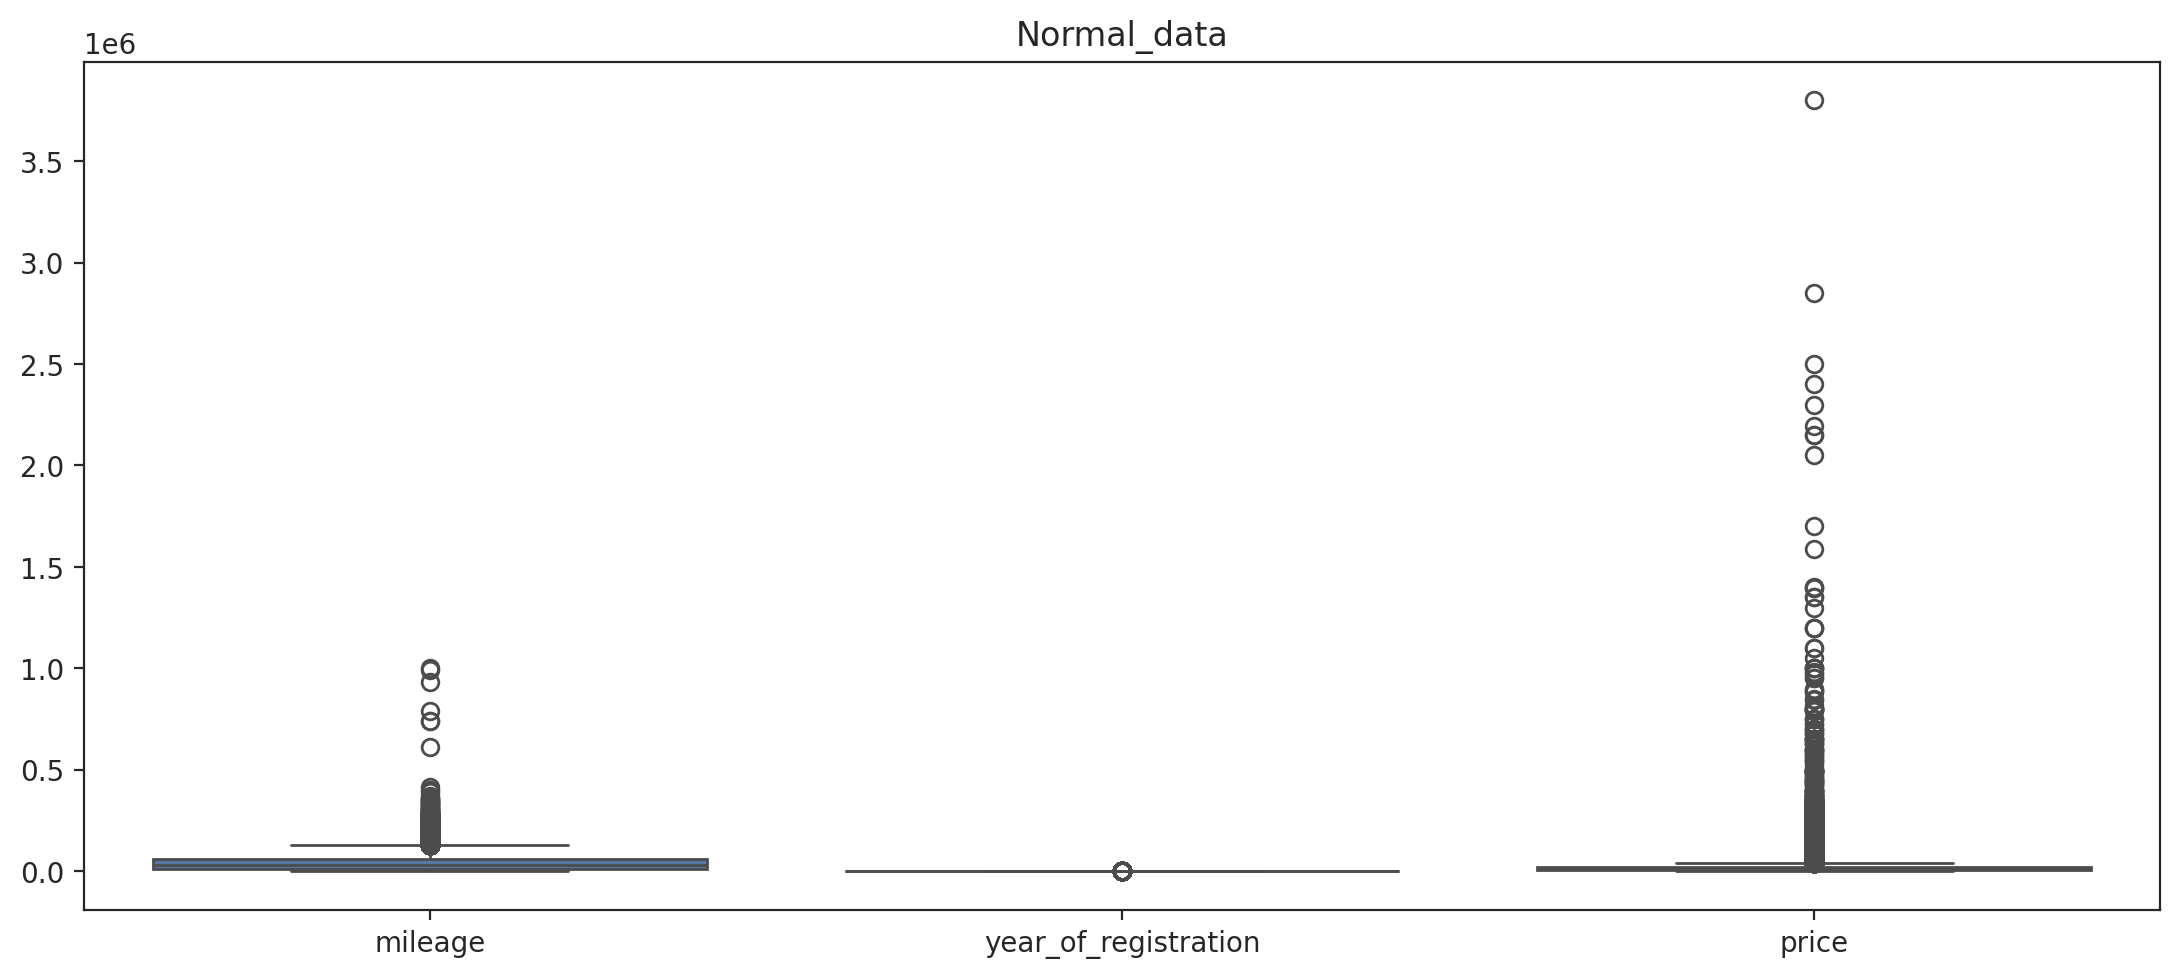

In [165]:
plt.figure(figsize=(11,5))
sns.boxplot(data=d1[['mileage', 'year_of_registration','price']]) # need to handle outliers either by droping them or by treating them
plt.title('Normal_data')
plt.tight_layout()



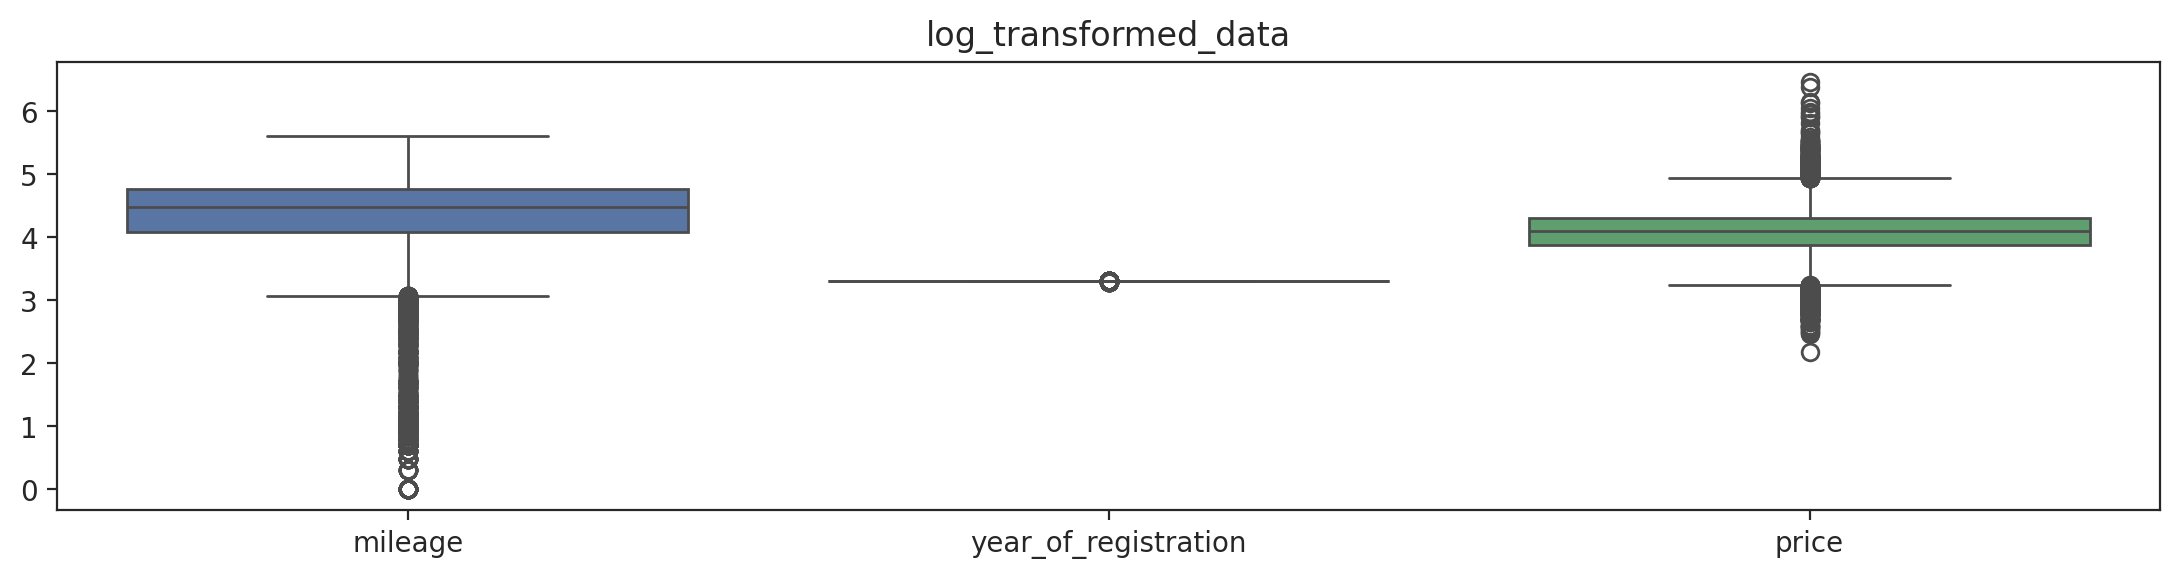

In [166]:
plt.figure(figsize=(11,3))
sns.boxplot(data=log_transformed_data)
plt.title('log_transformed_data')
plt.tight_layout()

In [167]:
d1.query('price>3000000') # this outlier is authentic car value removing it may change the effect

mileage standard_colour standard_make standard_model  \
197896    300.0             Red       Ferrari      LaFerrari   

       vehicle_condition  year_of_registration    price body_type fuel_type  
197896              USED                2017.0  3799995     Coupe    Petrol

In [168]:
d1.query('standard_make=="Ferrari"').sort_values('price',ascending=False)#['price']#

mileage standard_colour standard_make standard_model  \
197896    300.0             Red       Ferrari      LaFerrari   
72618     475.0          Yellow       Ferrari      LaFerrari   
377743   2247.0             Red       Ferrari      LaFerrari   
323487   1382.0             Red       Ferrari      LaFerrari   
145706   6170.0             Red       Ferrari      LaFerrari   
...         ...             ...           ...            ...   
214467  51000.0            Blue       Ferrari            456   
309901  47000.0            Blue       Ferrari           Dino   
277084  56500.0             Red       Ferrari        Mondial   
152082  76550.0           Black       Ferrari        Mondial   
354082  21000.0            Grey       Ferrari           456M   

       vehicle_condition  year_of_registration    price body_type  \
197896              USED                2017.0  3799995     Coupe   
72618               USED                2015.0  2299950     Coupe   
377743              USED                2014.0  2195000     Coupe   
323487              USED                2015.0  2150000     Coupe   
145706              USED                2013.0  2150000     Coupe   
...                  ...                   ...      ...       ...   
214467              USED                1997.0    39000     Coupe   
309901              USED                1993.0    38980     Coupe   
277084              USED                1985.0    32995     Coupe   
152082              USED                1982.0    31000     Coupe   
354082              USED                2000.0    29995     Coupe   

                    fuel_type  
197896                 Petrol  
72618                  Petrol  
377743  Petrol Plug-in Hybrid  
323487                 Petrol  
145706  Petrol Plug-in Hybrid  
...                       ...  
214467                 Petrol  
309901                 Petrol  
277084                 Petrol  
152082                 Petrol  
354082                 Petrol  

[824 rows x 9 columns]

<Axes: >

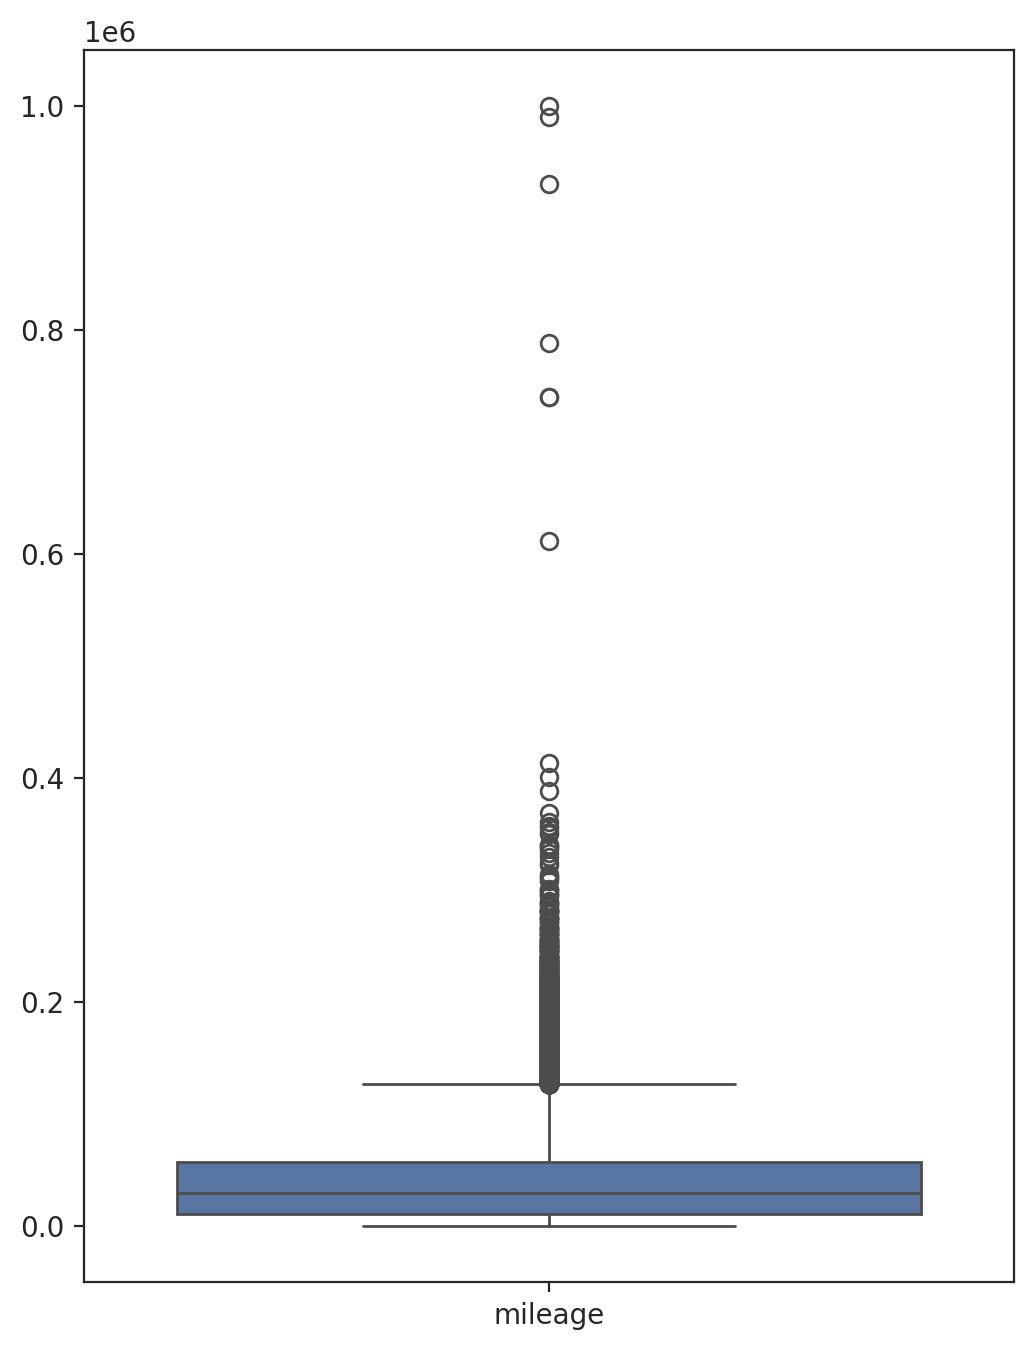

In [169]:
plt.figure(figsize=(6,8))
sns.boxplot(data=d1[['mileage']])

In [170]:
mileage_out=d1.query('mileage>500000').sort_values(by='mileage',ascending=False) # in ordder to handle outlier either we can replace them by mean or we can drop them
mileage_out

mileage standard_colour  standard_make standard_model  \
43933   999999.0           White       Vauxhall          Astra   
63516   990000.0             Red       Vauxhall         Zafira   
84973   930000.0            Blue            BMW       1 Series   
131408  788072.0            Blue           MINI     Countryman   
115185  740000.0            Blue          Volvo           XC90   
240383  740000.0           White  Mercedes-Benz        E Class   
332886  611121.0           White           Fiat            500   

       vehicle_condition  year_of_registration  price    body_type fuel_type  
43933               USED                2013.0   9999    Hatchback    Diesel  
63516               USED                2007.0   1200          MPV    Diesel  
84973               USED                2006.0   2500    Hatchback    Petrol  
131408              USED                2018.0  22875          SUV    Petrol  
115185              USED                2014.0  14795          SUV    Diesel  
240383              USED                2011.0  10500  Convertible    Diesel  
332886              USED                2013.0   4500    Hatchback    Petrol

In [171]:
d1=d1.drop(mileage_out.index)

<Axes: >

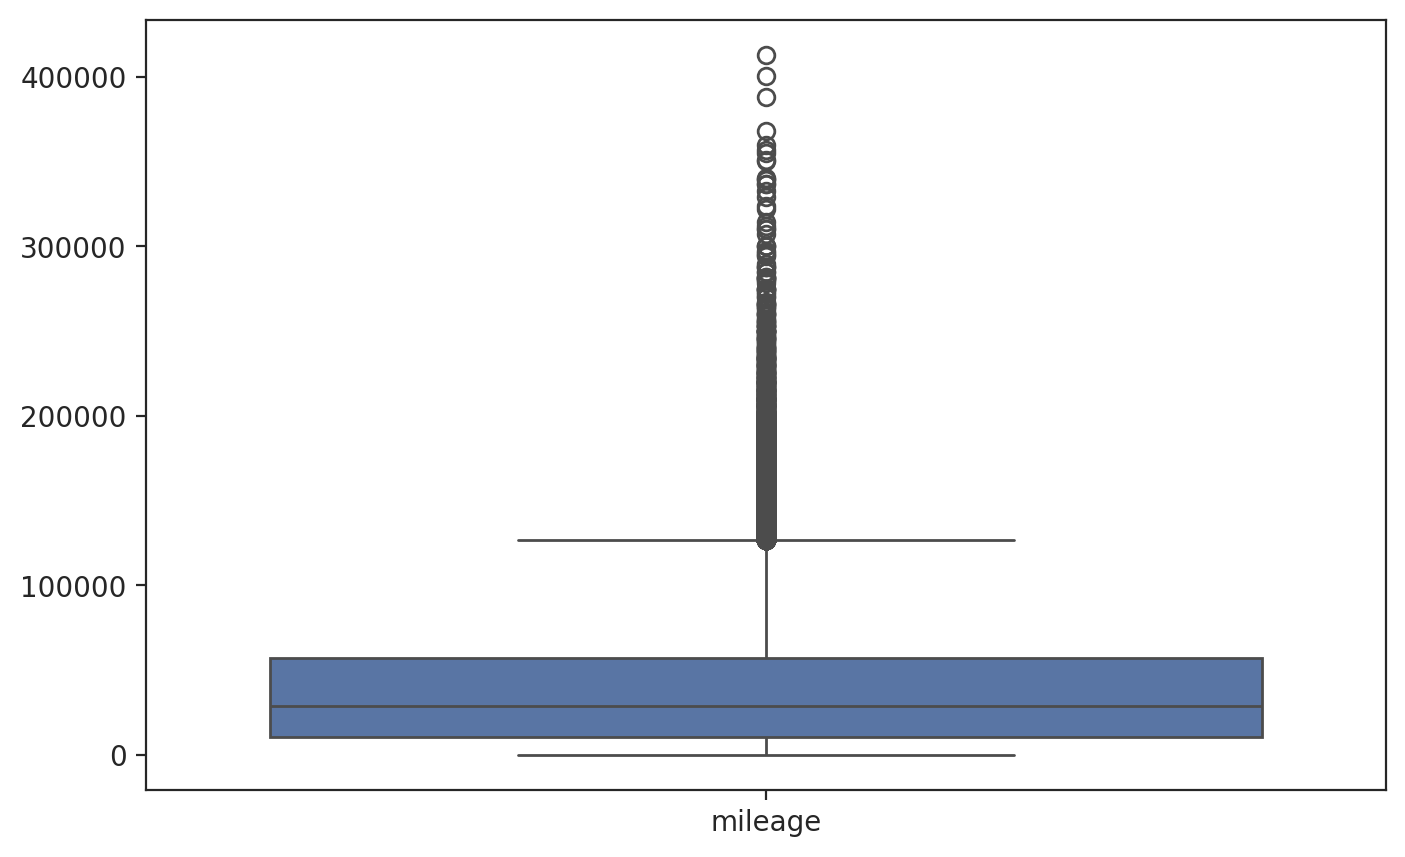

In [172]:
plt.figure(figsize=(8,5))
sns.boxplot(data=d1[['mileage']])

<Axes: >

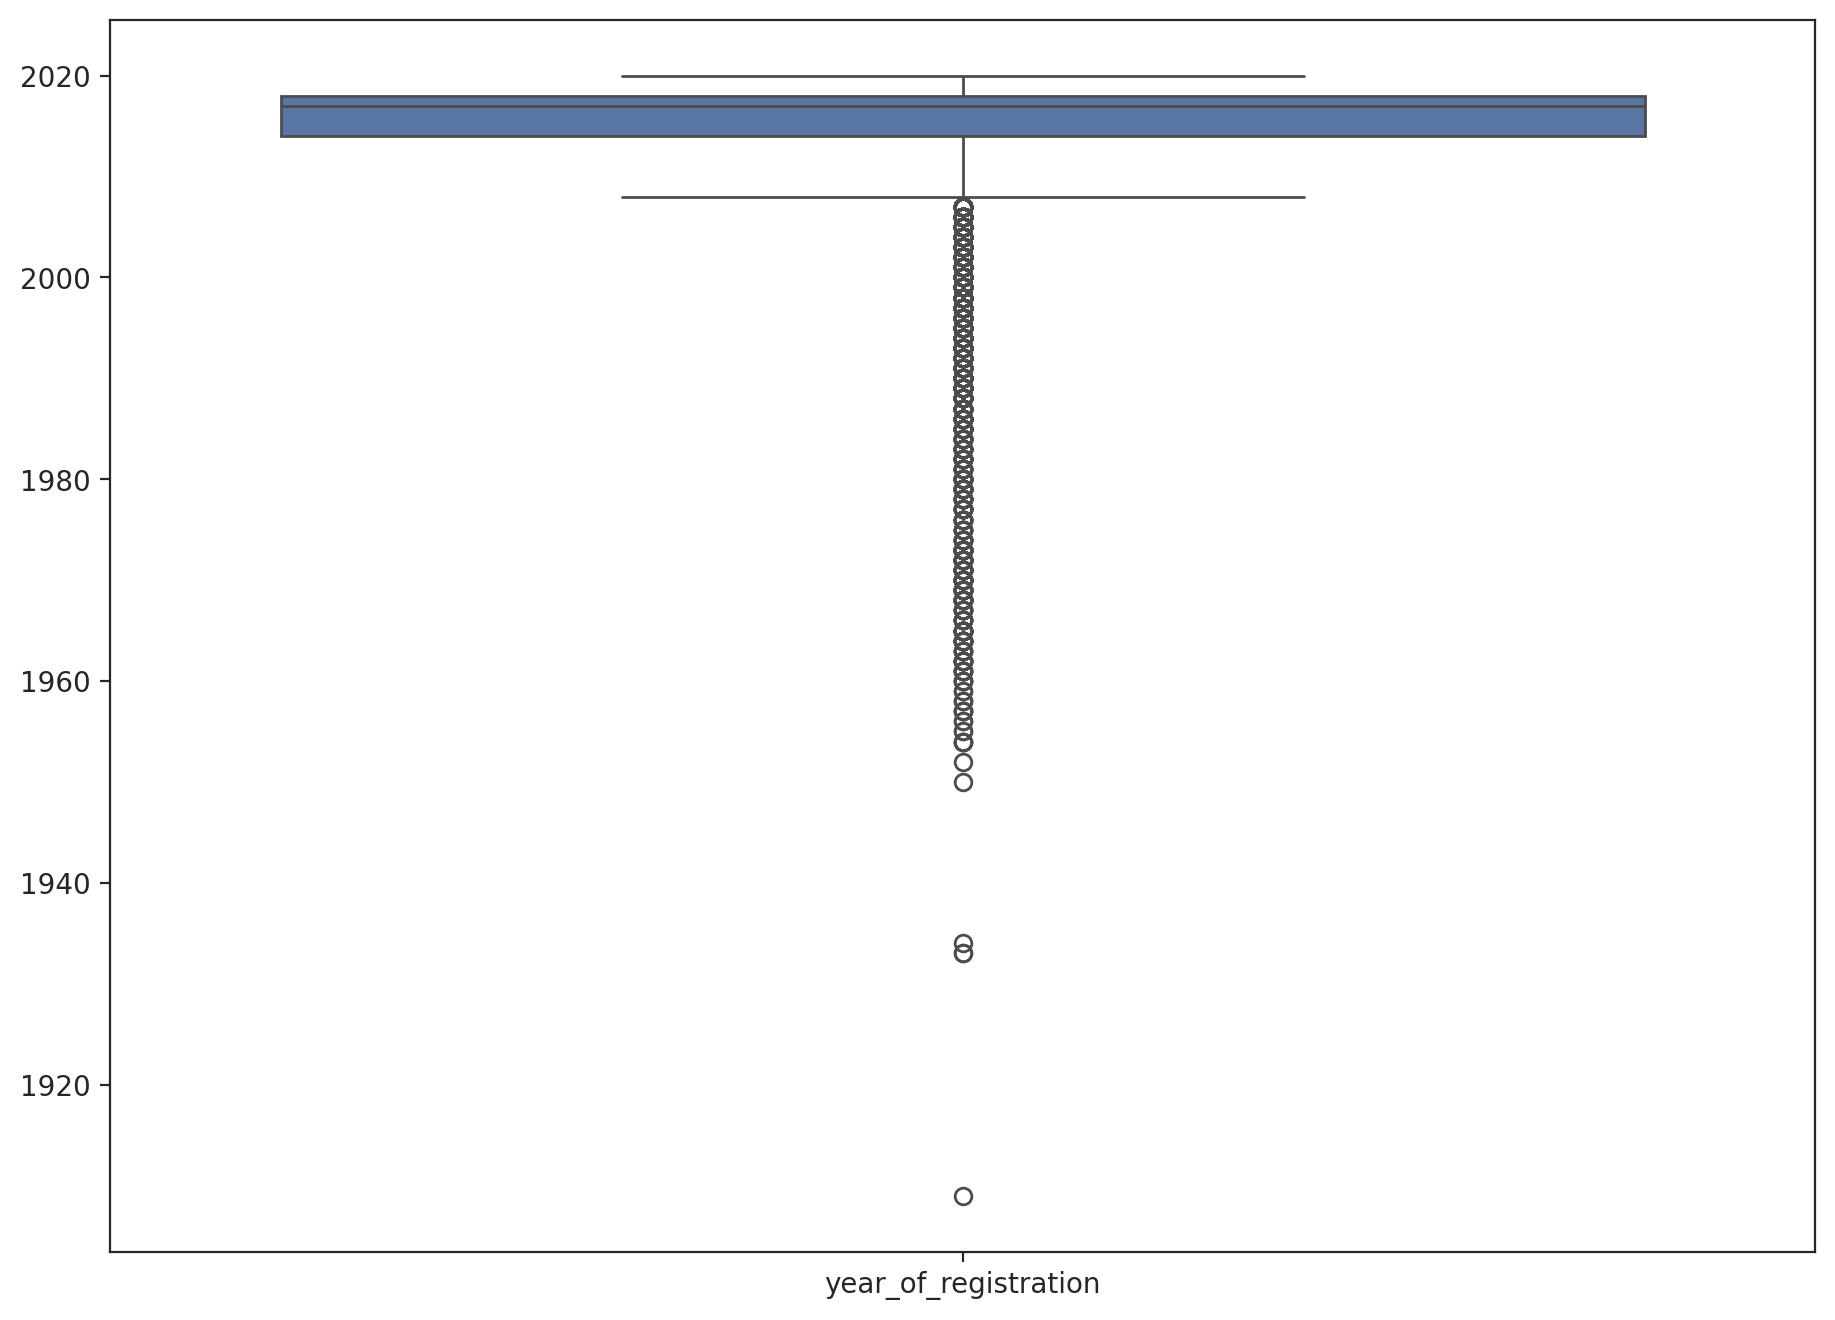

In [173]:
plt.figure(figsize=(11,8))
sns.boxplot(data=d1[['year_of_registration']])

In [174]:
yor_out=d1.query('year_of_registration<1940') # they can be dropped
yor_out

mileage standard_colour standard_make standard_model  \
28900   26000.0           Black        Austin          Seven   
147887  31172.0           Black       Hyundai            i10   
150731  12345.0           Black        Austin         Twelve   
156439  48000.0           Black        Morris             10   

       vehicle_condition  year_of_registration  price  body_type fuel_type  
28900               USED                1933.0   9995     Saloon    Petrol  
147887              USED                1909.0   3950  Hatchback    Petrol  
150731              USED                1933.0  11990     Saloon    Petrol  
156439              USED                1934.0   5995     Saloon    Petrol

In [175]:
d1=d1.drop(yor_out.index)

<Axes: >

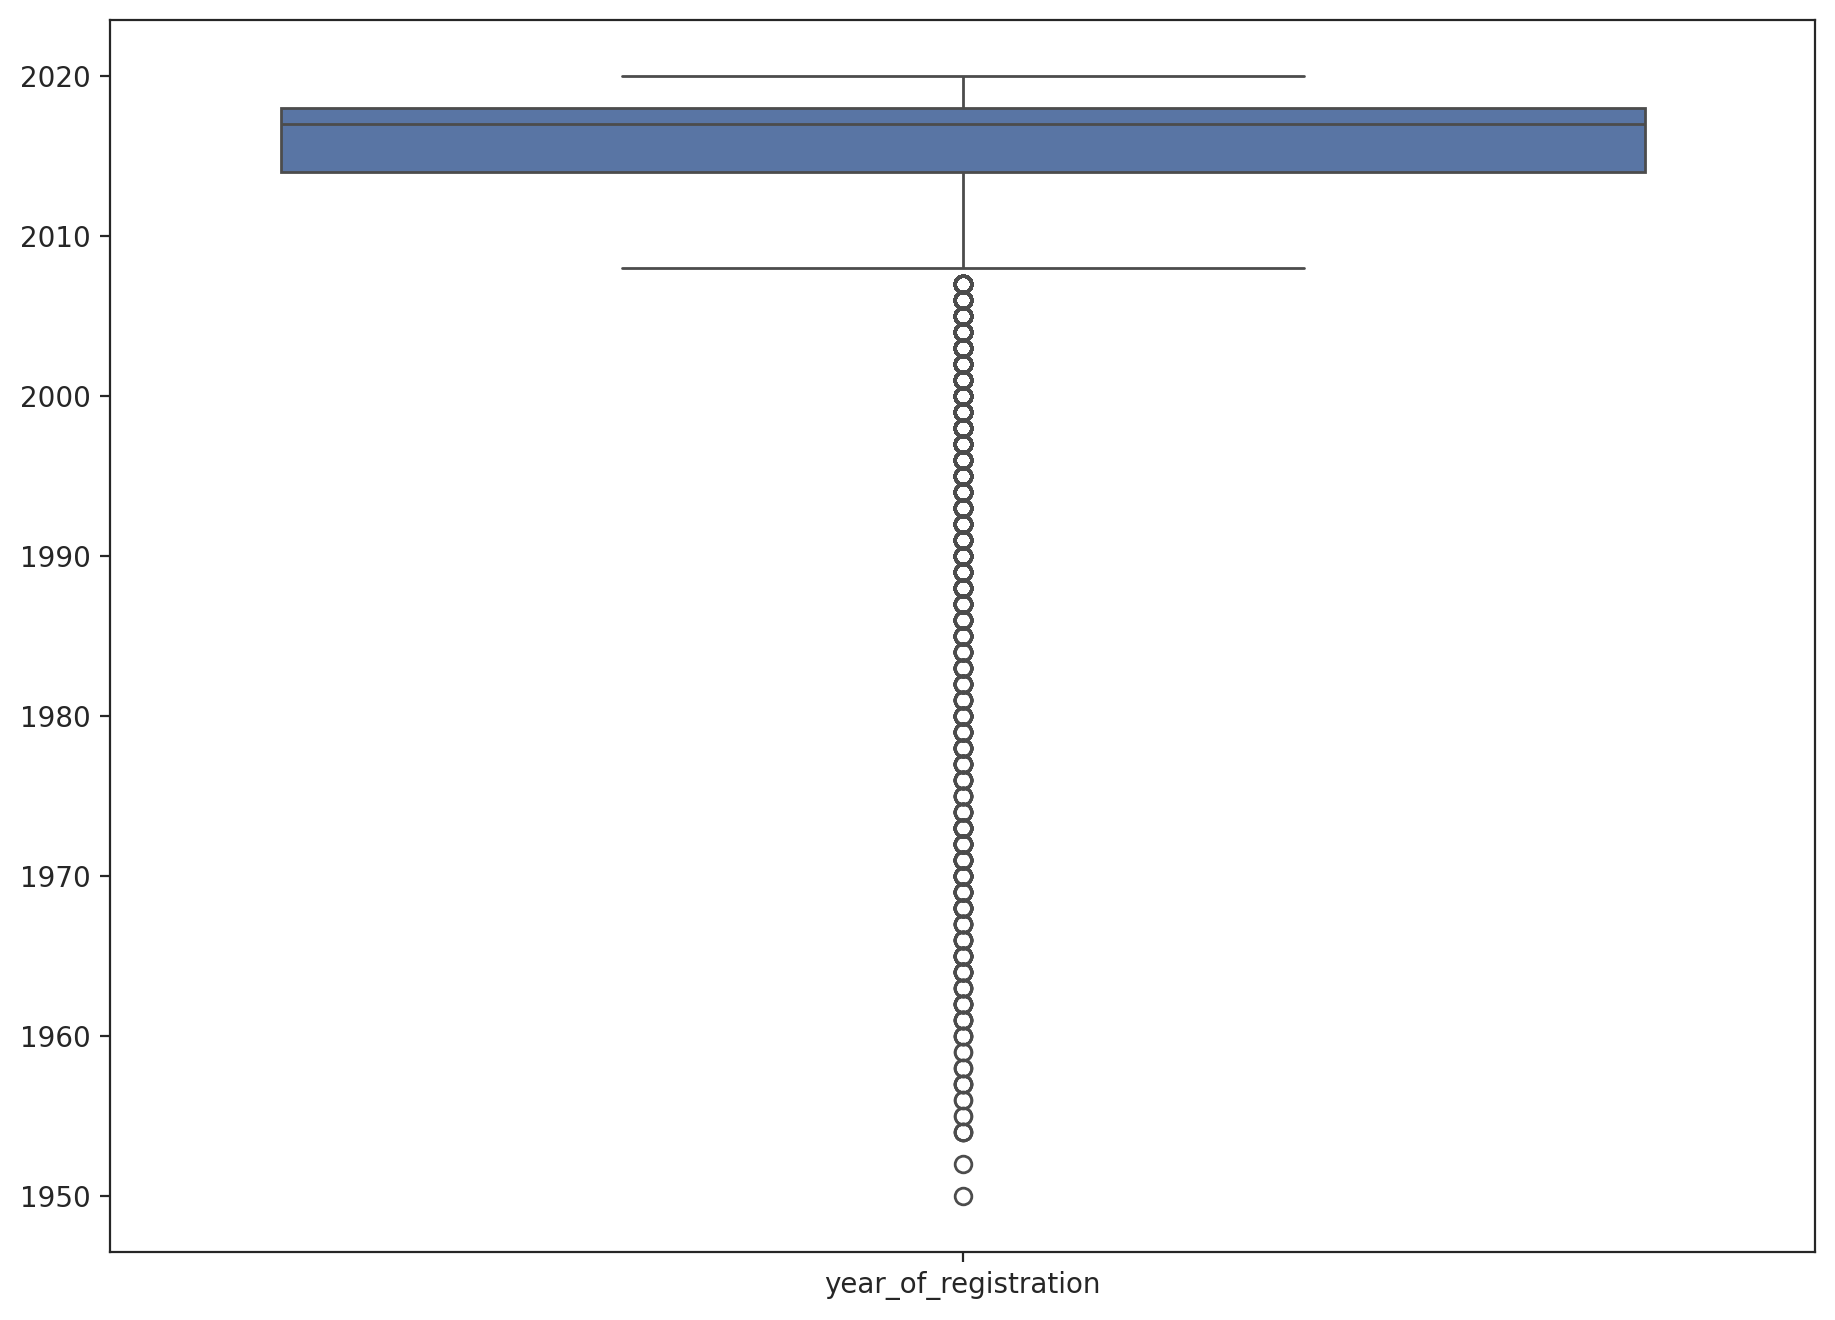

In [176]:
plt.figure(figsize=(11,8))
sns.boxplot(data=d1[['year_of_registration']])

<Axes: >

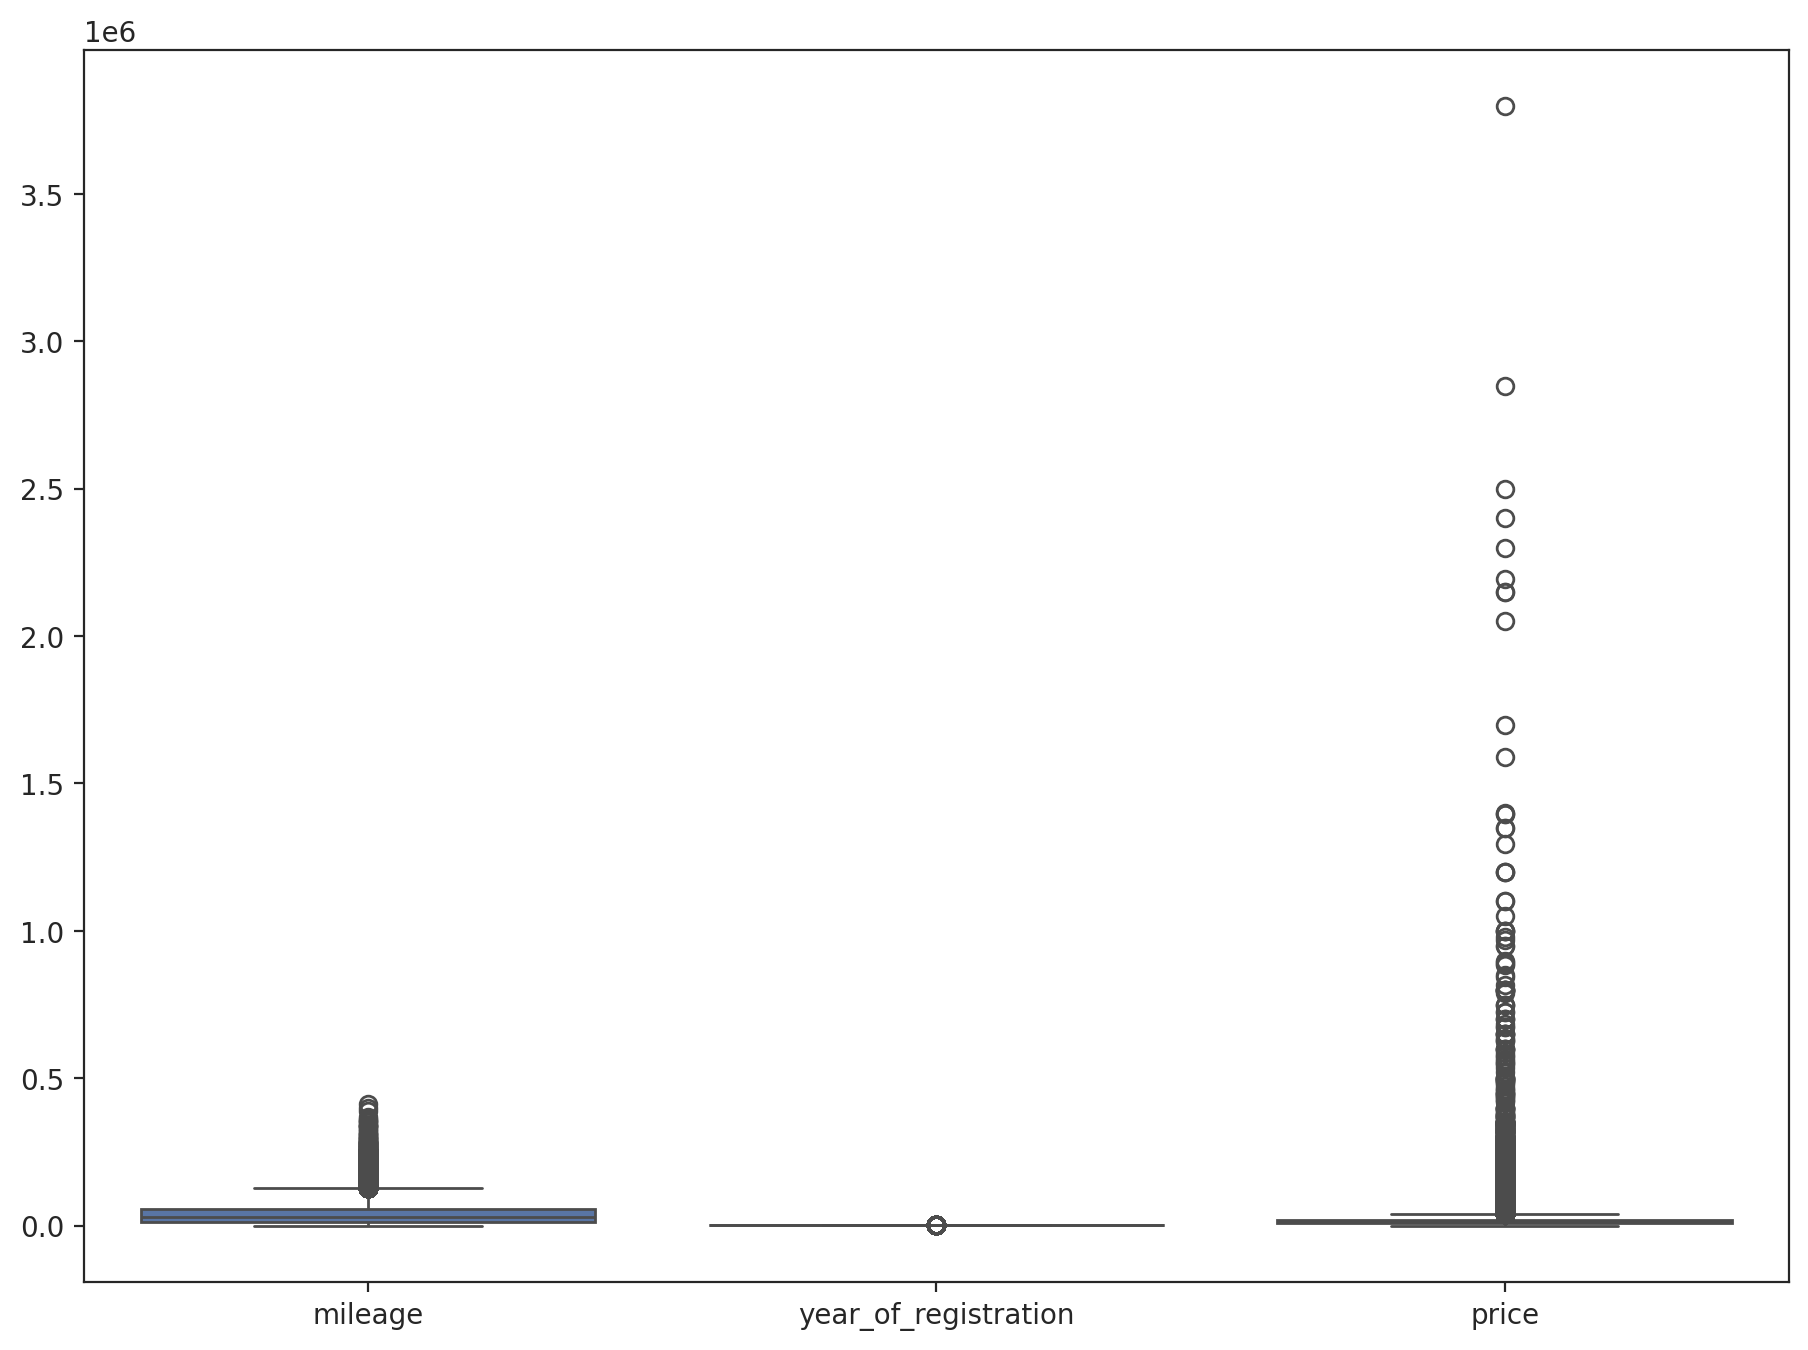

In [177]:
plt.figure(figsize=(11,8))
sns.boxplot(data=d1[['mileage', 'year_of_registration','price']])

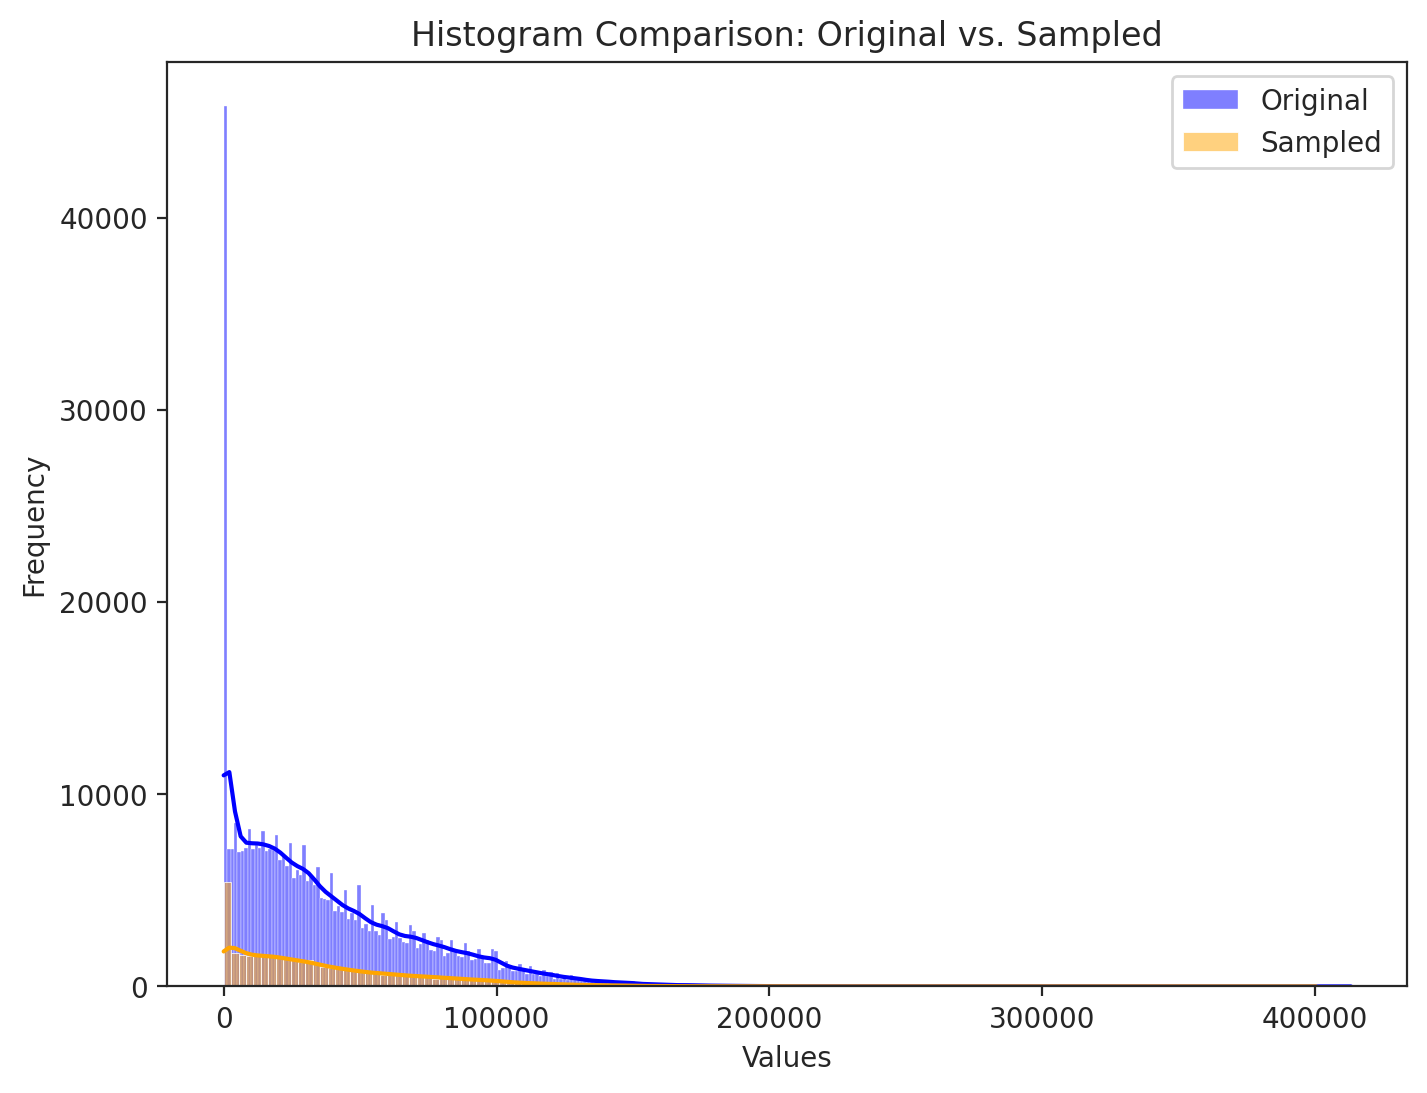

In [178]:
fig, ax = plt.subplots()
sns.histplot(d1['mileage'], kde=True, color='blue', label='Original', ax=ax)
sns.histplot(d2['mileage'], kde=True, color='orange', label='Sampled', ax=ax)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram Comparison: Original vs. Sampled')
ax.legend()


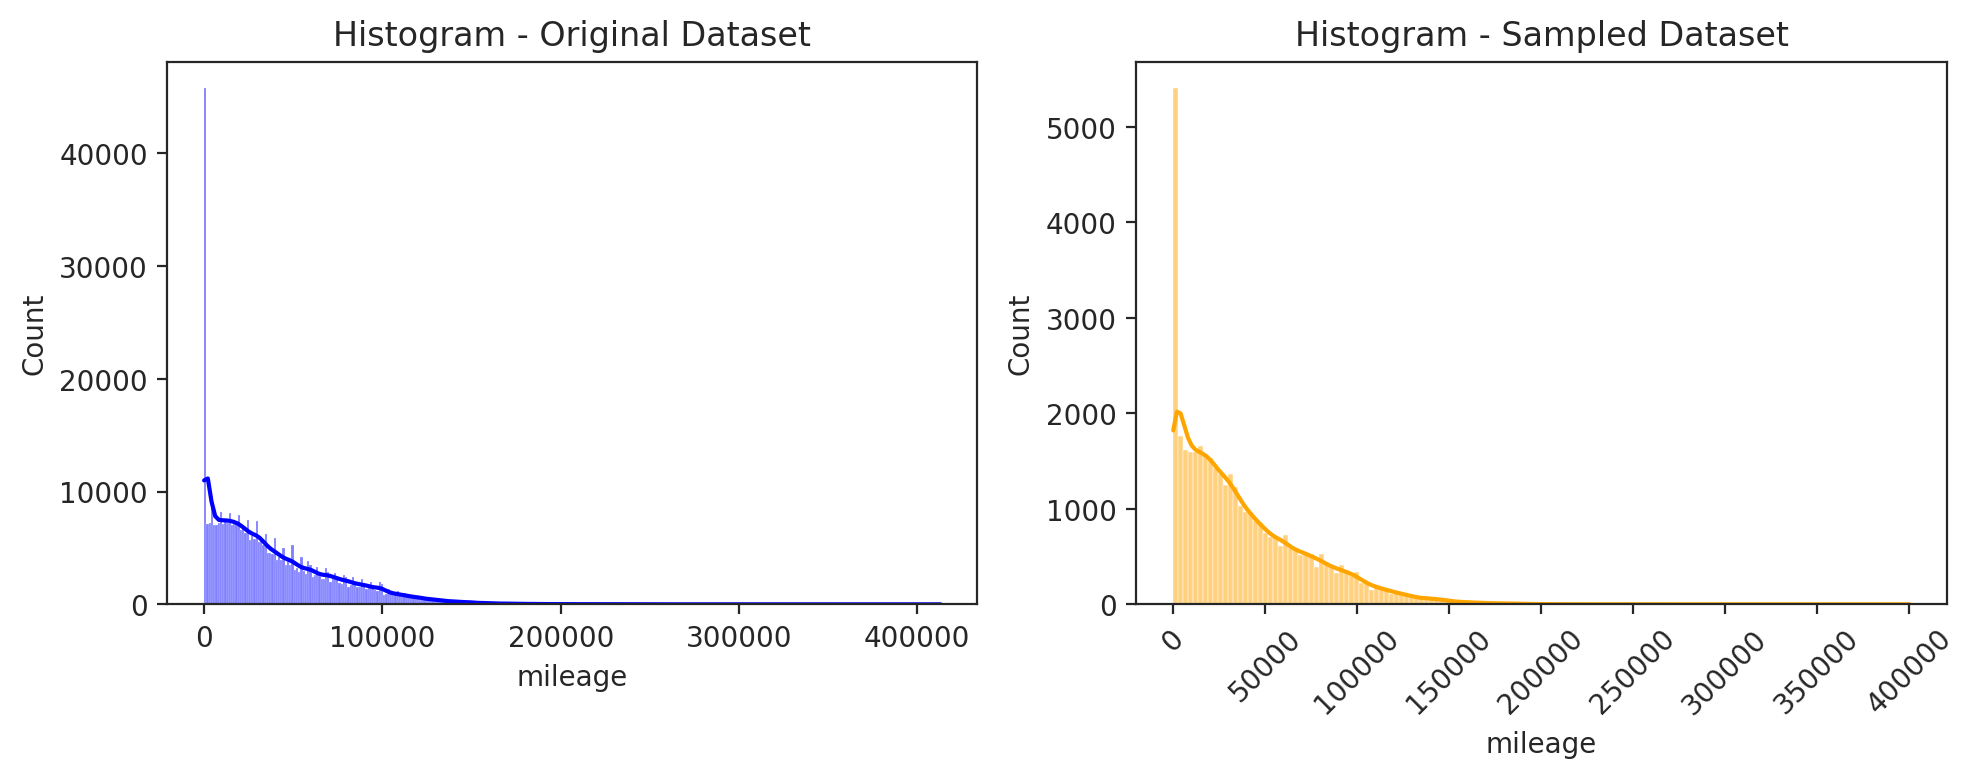

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


sns.histplot(d1['mileage'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram - Original Dataset')

sns.histplot(d2['mileage'], kde=True, color='orange', ax=axes[1])
axes[1].set_title('Histogram - Sampled Dataset')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()

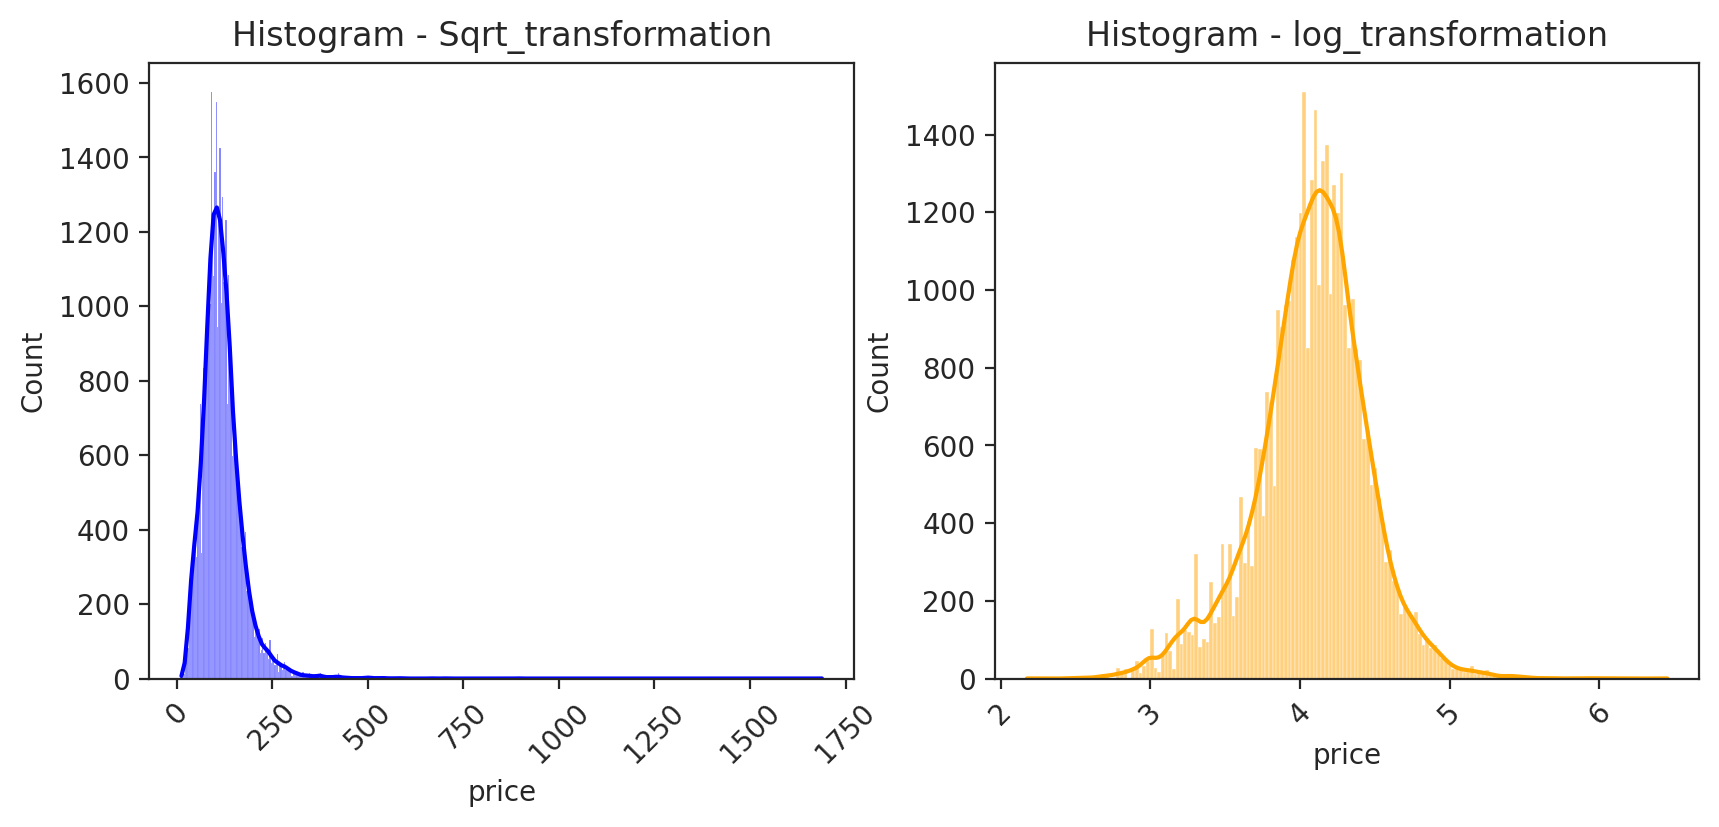

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(sqrt_transformed_data['price'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram - Sqrt_transformation')
axes[0].tick_params(axis='x', rotation=45)

sns.histplot(log_transformed_data['price'], kde=True, color='orange', ax=axes[1])
axes[1].set_title('Histogram - log_transformation')
axes[1].tick_params(axis='x', rotation=45)

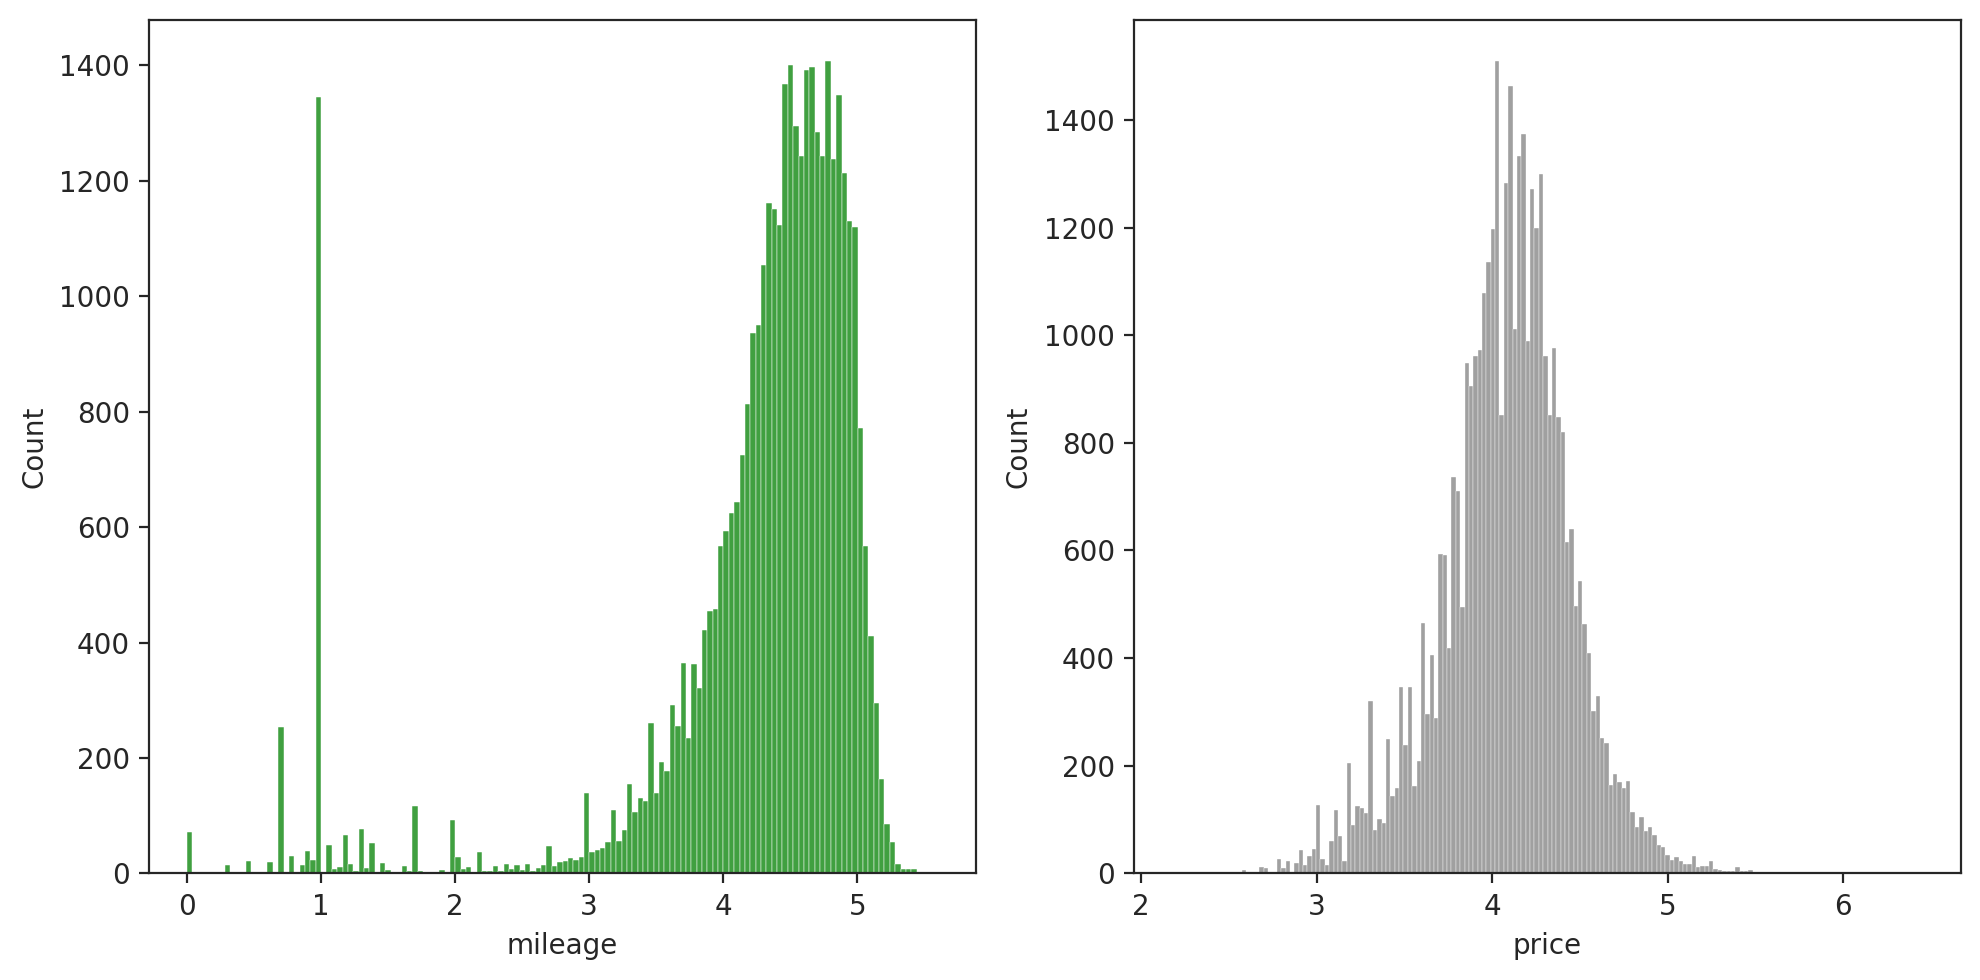

In [181]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=log_transformed_data,x='mileage',color='green')

plt.subplot(1,2,2)
sns.histplot(data=log_transformed_data,x='price',color='grey')

plt.tight_layout()

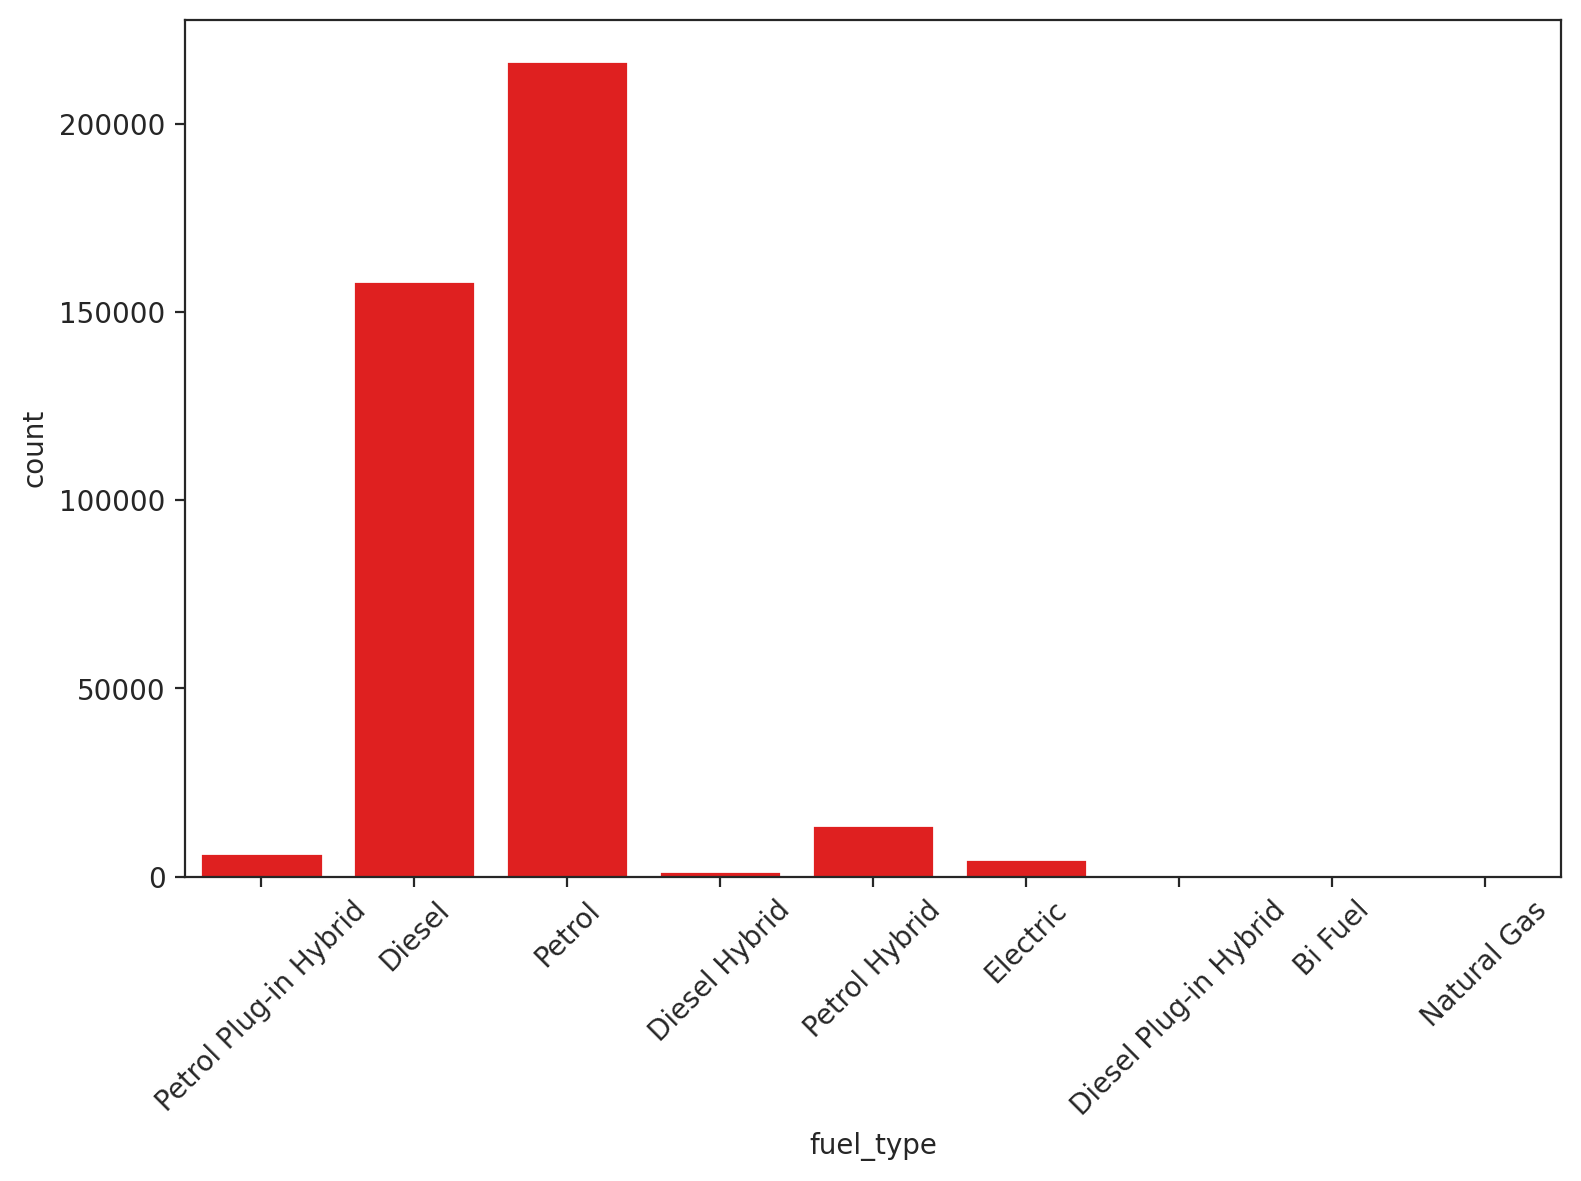

In [182]:
sns.countplot(data=d1,x='fuel_type', color='red')
plt.xticks(rotation=45)
plt.tight_layout()

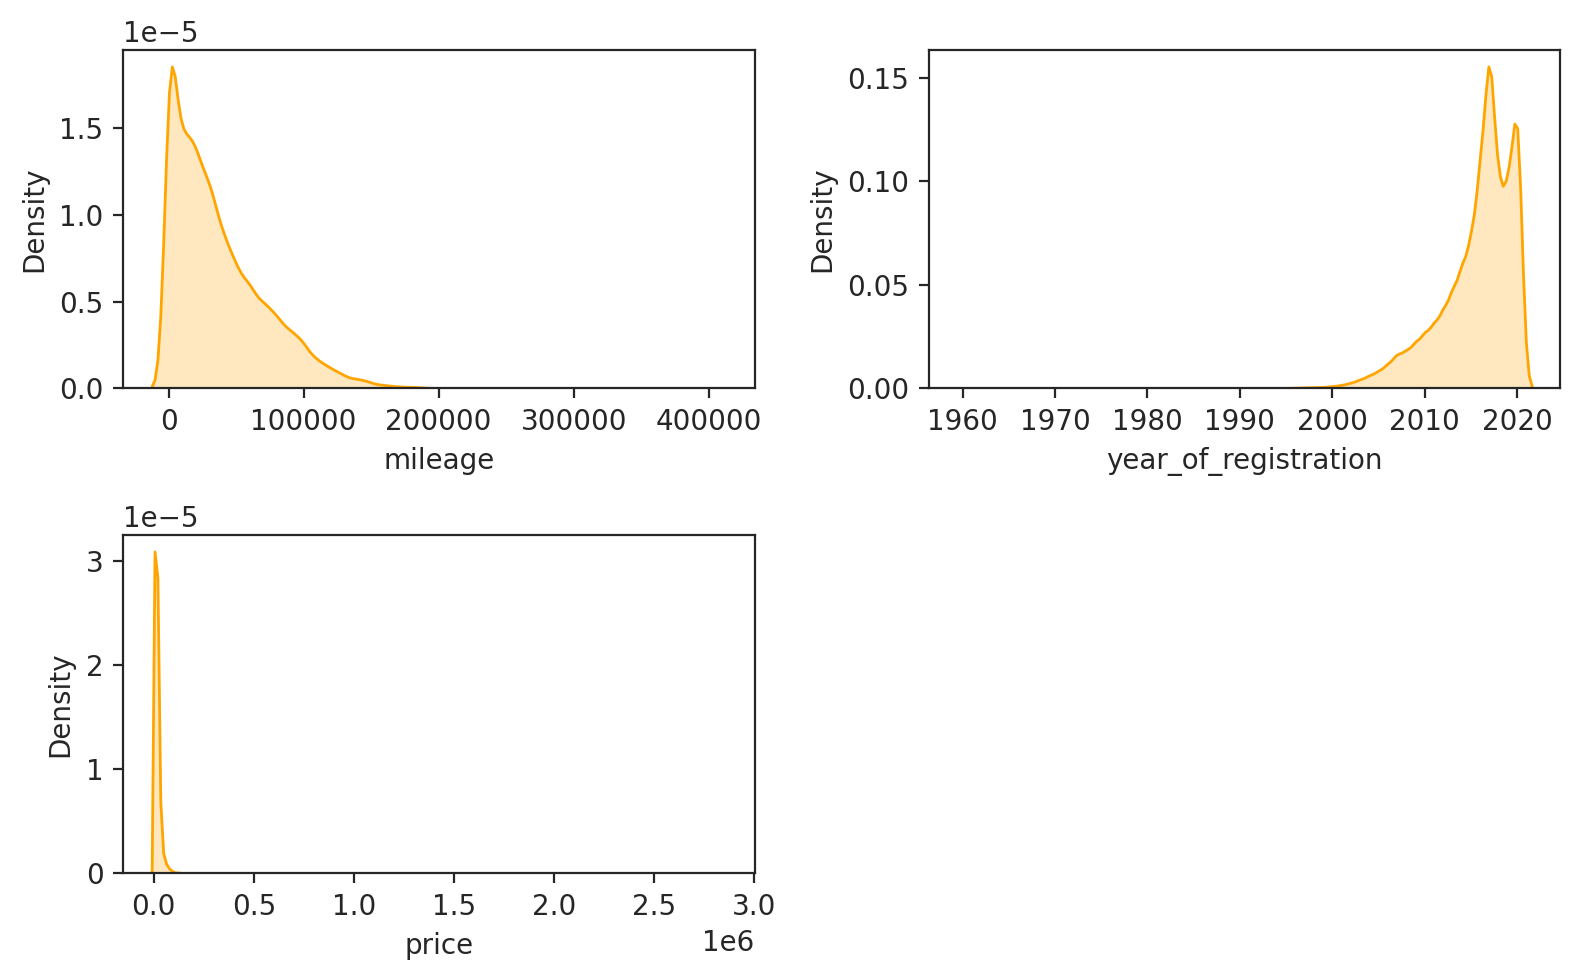

In [183]:
plt.figure(figsize=(8,5))
for i in range(0,len(sample_numerical)):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x=sample_d1[sample_numerical[i]],shade=True,color='orange')
  plt.xlabel(sample_numerical[i])
  plt.tight_layout()

  **Observations**

1 from above it is clear that the  sampled_graphs shows skewness

2 mileage can be seen positively skwed representing that most of the data and its distribution falls in the range(0-0.2e6)

3 similarly the 'price' graph shows a sharp peak and positive skewnes represting that most of the values falls in range (0-0.02e7)--(0-200000)

** Note: inorder get a better visiualization 'Transformation' can be done using (log,sqrt)


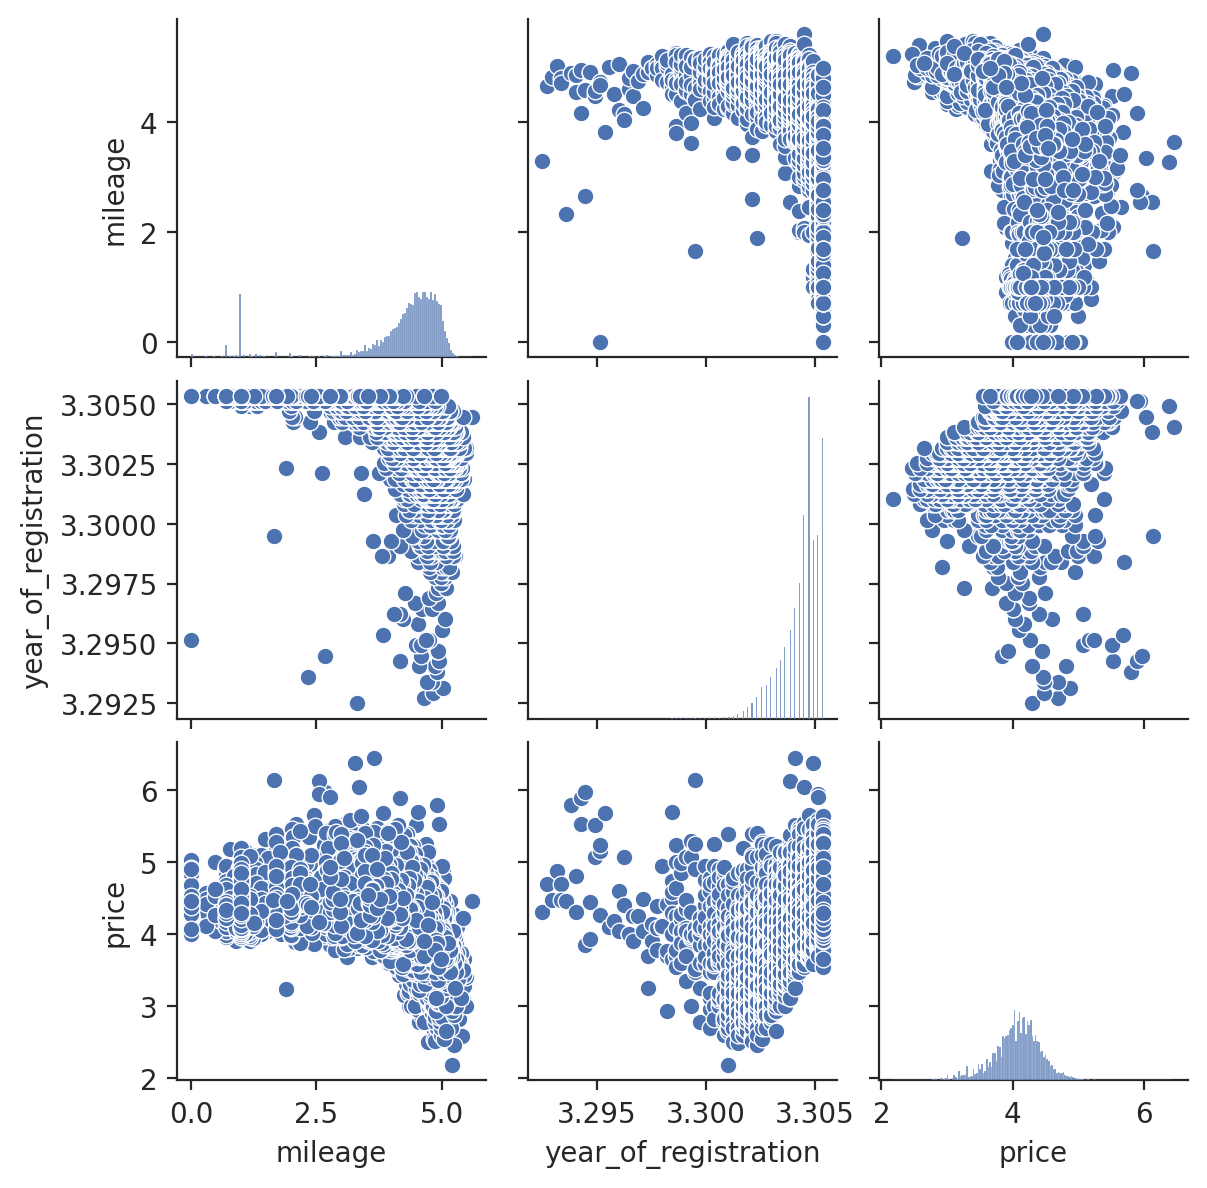

In [184]:
sns.pairplot(data=log_transformed_data, height=2)

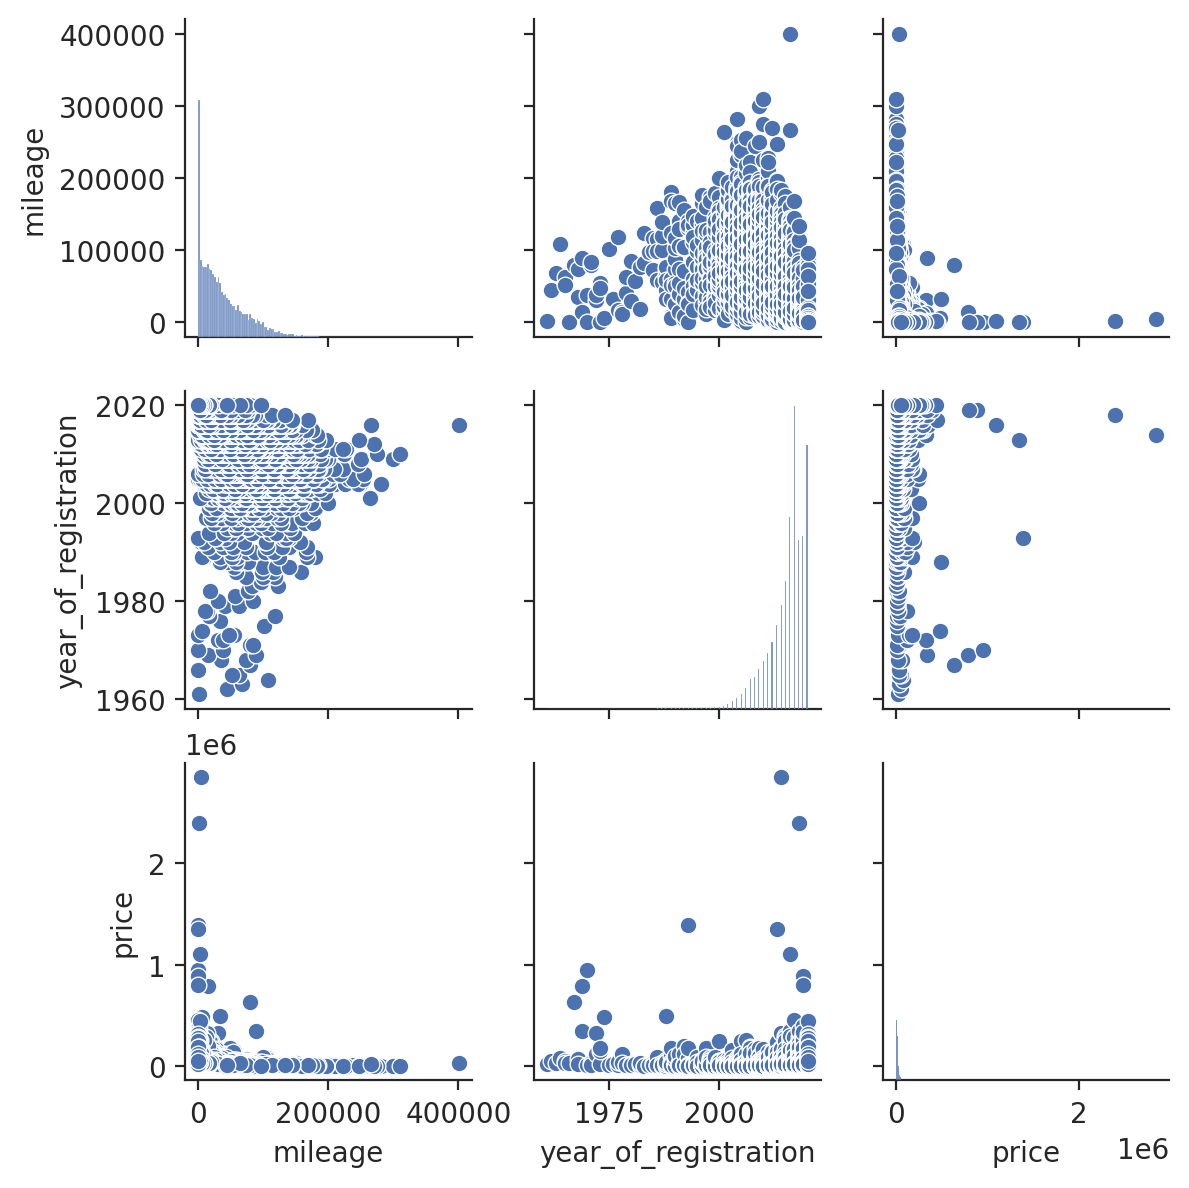

In [185]:
sns.pairplot(data=d2[sample_numerical], height=2)

<Axes: xlabel='mileage', ylabel='price'>

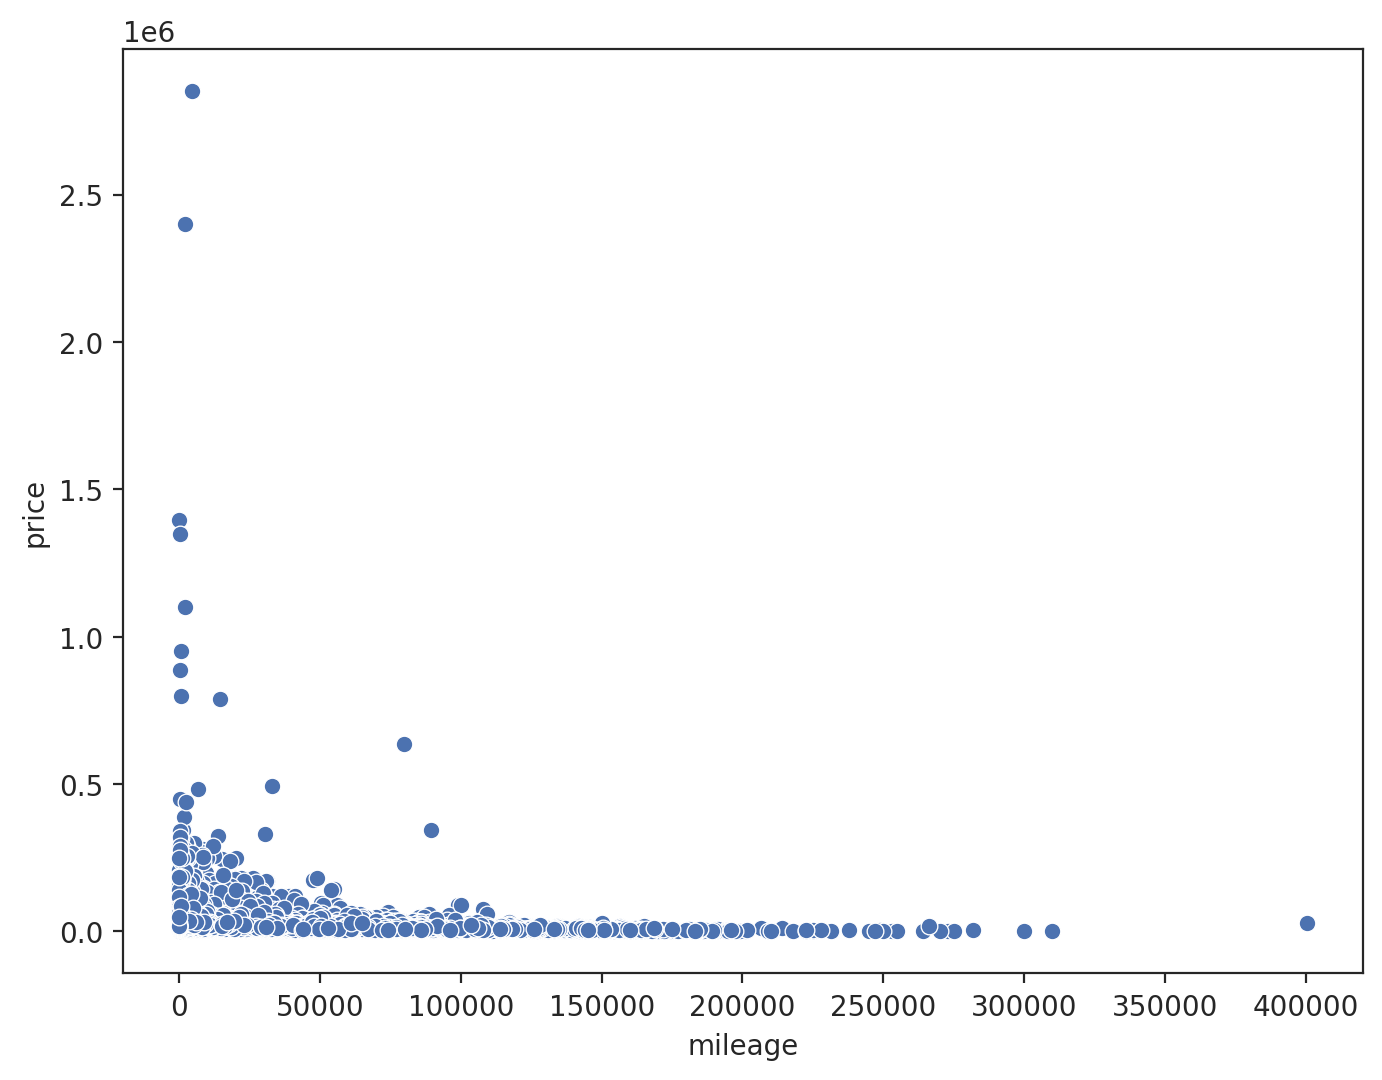

In [186]:
#sns.scatterplot(x=log_transformed_data['mileage'],y=log_transformed_data['price'])
sns.scatterplot(x=d2['mileage'],y=d2['price'])

<Axes: xlabel='year_of_registration', ylabel='price'>

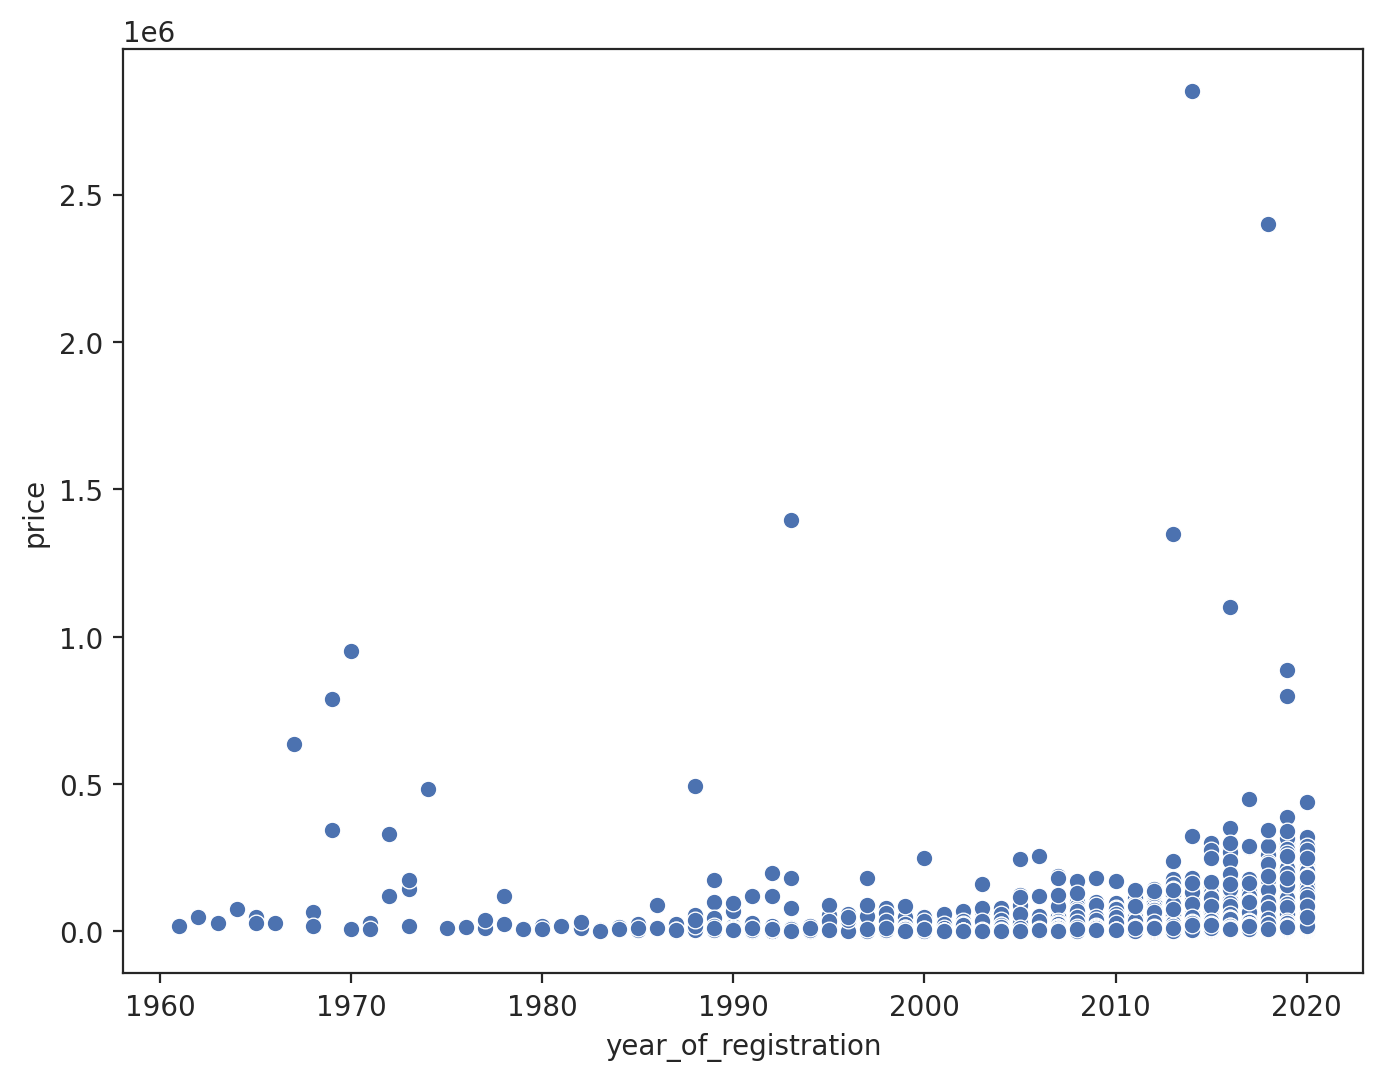

In [187]:
sns.scatterplot(data=sample_d1, y=sample_d1['price'],x=sample_d1['year_of_registration'])

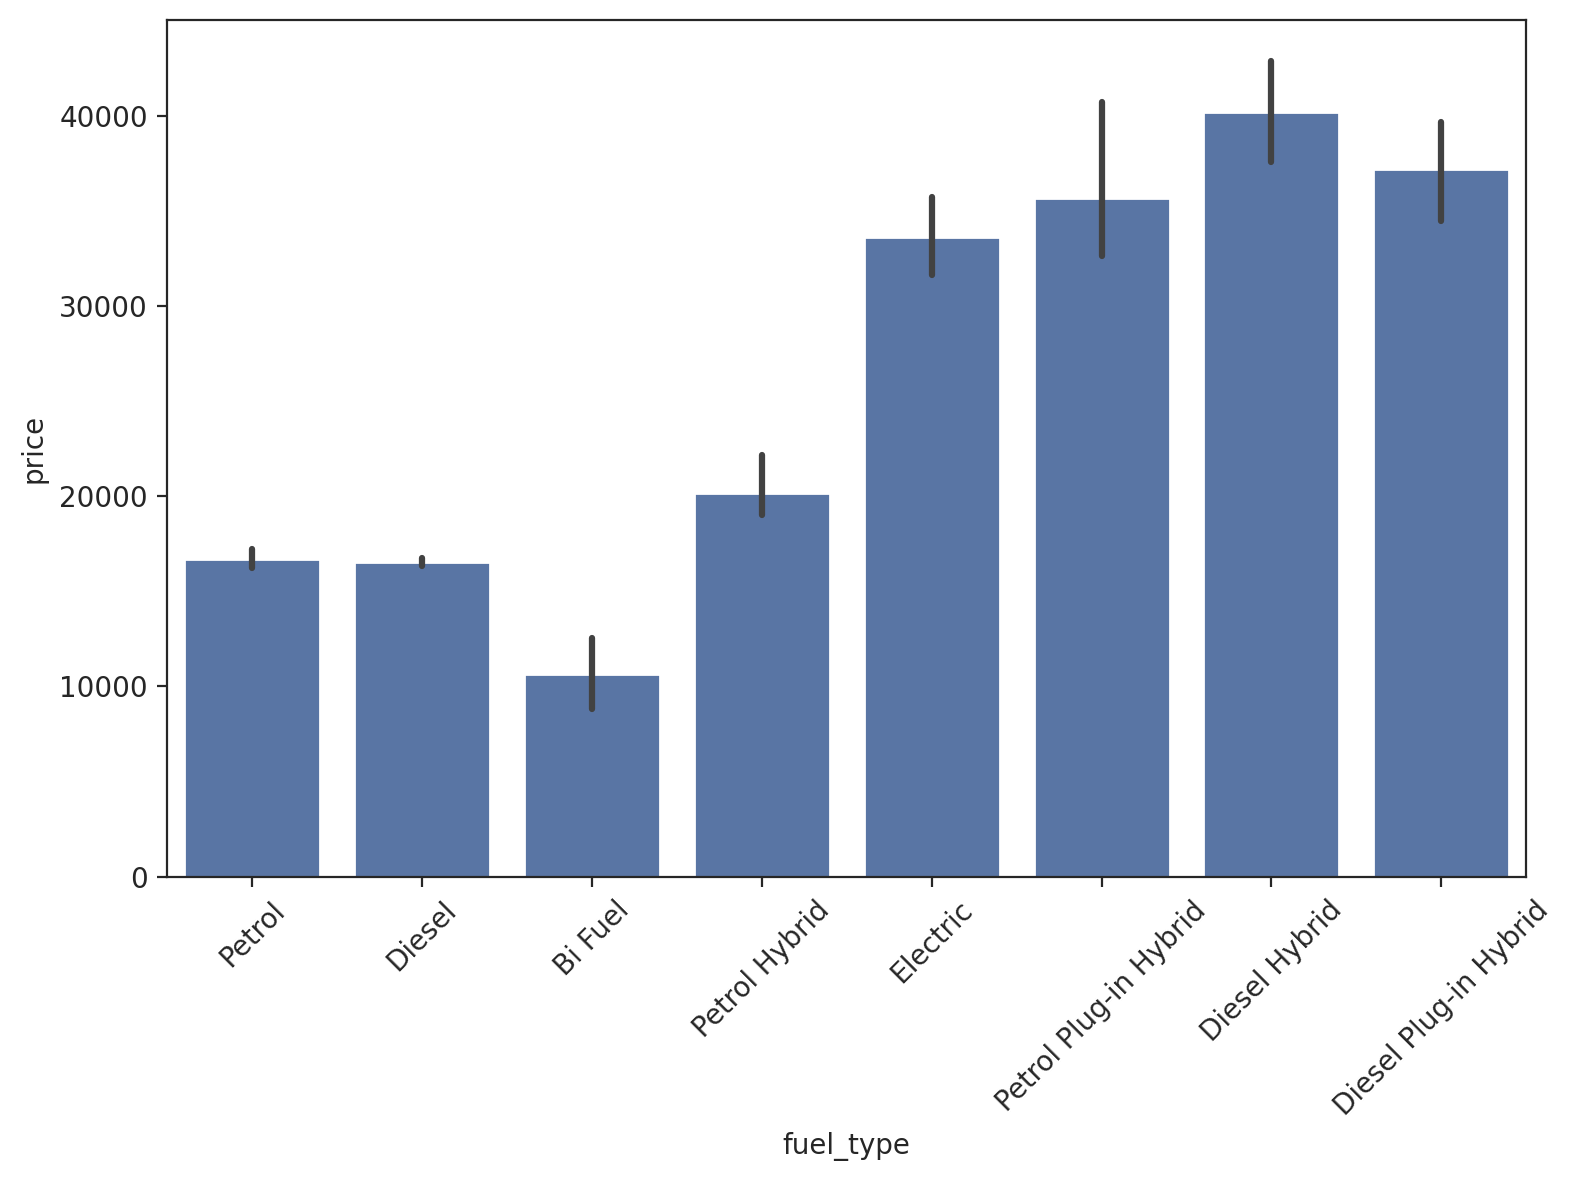

In [188]:
sns.barplot(sample_d1,x=sample_d1['fuel_type'],y=sample_d1['price'])
plt.xticks(rotation=45)
plt.tight_layout()

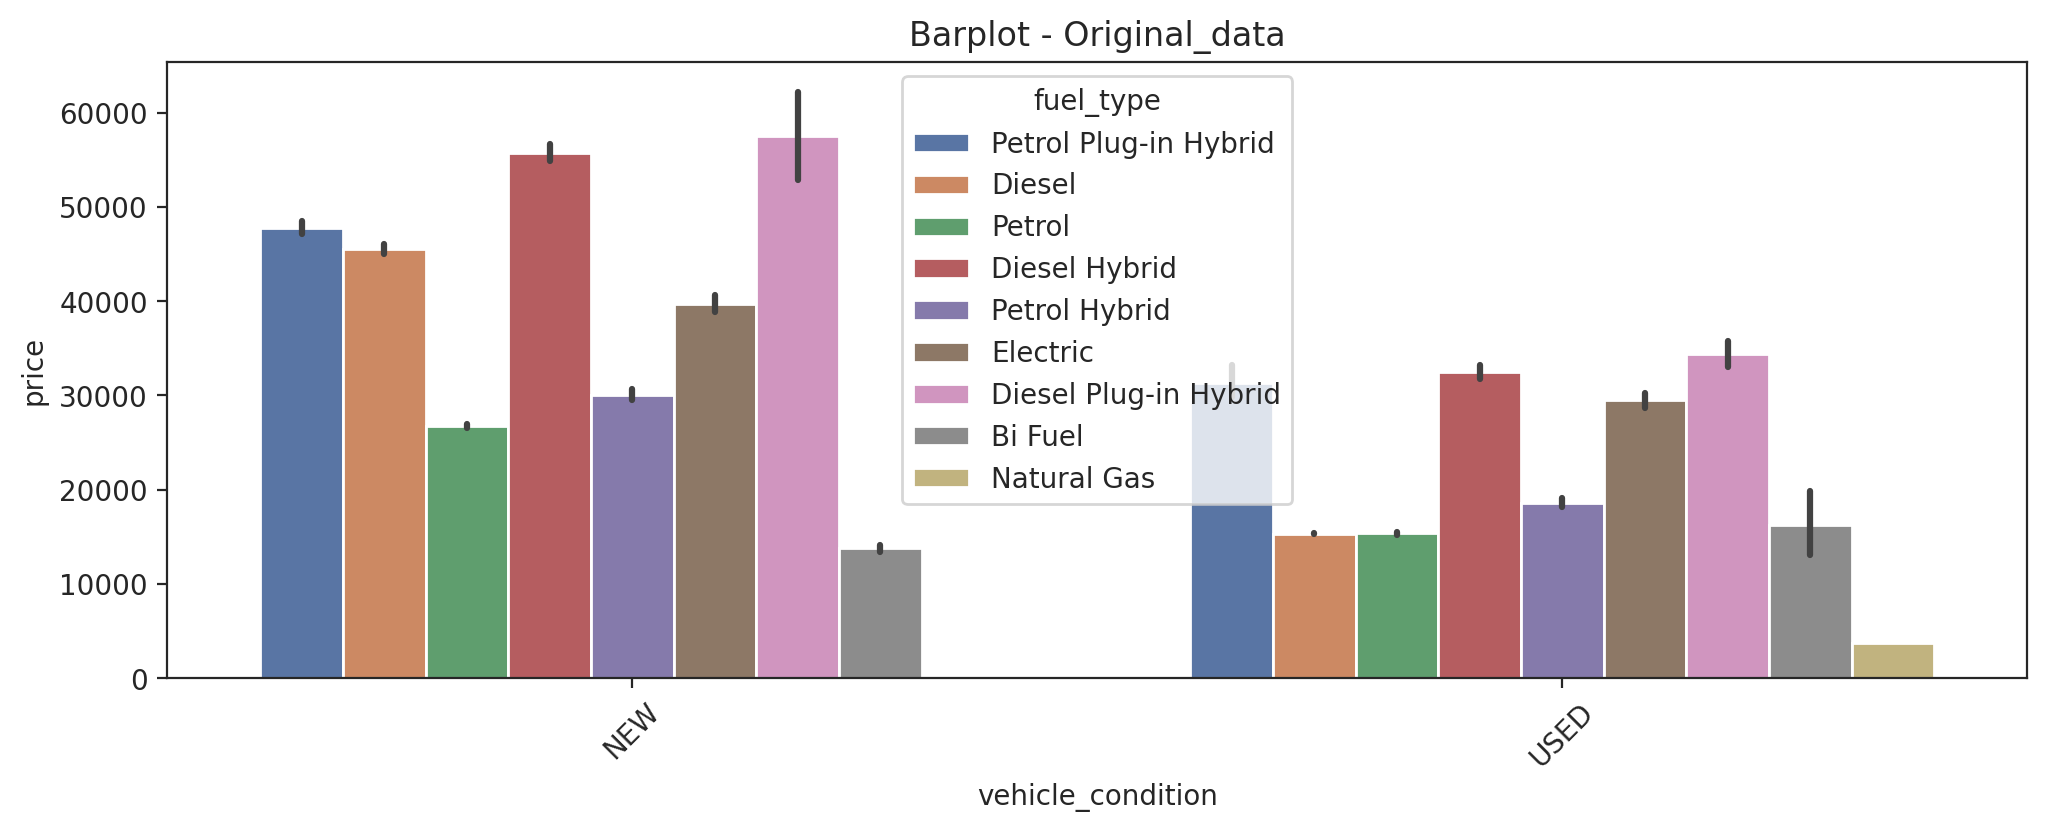

In [189]:
 plt.figure( figsize=(12, 4))
sns.barplot(d1,x=d1['vehicle_condition'],y=d1['price'], hue=d1['fuel_type'])
plt.title('Barplot - Original_data')
plt.tick_params(axis='x', rotation=45)



In [190]:
# from graph it can be noted that new cars uses almost no  'Natural Gas' as fuel_type
# when it comes to used cars the resell value of cars with fuel_type['petrol plug_in hybrid,diesel plugin_hybrid, desiel_hybrid,electric] is higher respectively
# price of used cars with [petrol, diesel, petrol hybride] as fuel_type is comparetively less and  remains almost at same  level as one_another,

# on the other hand unlike to used cars , the new car has higher price vale for [ petrol,petrol_hybrid] and diesel at the highest among them
# similar to used cars the price worth of hybrid_fuel cars and electrics cars is higher

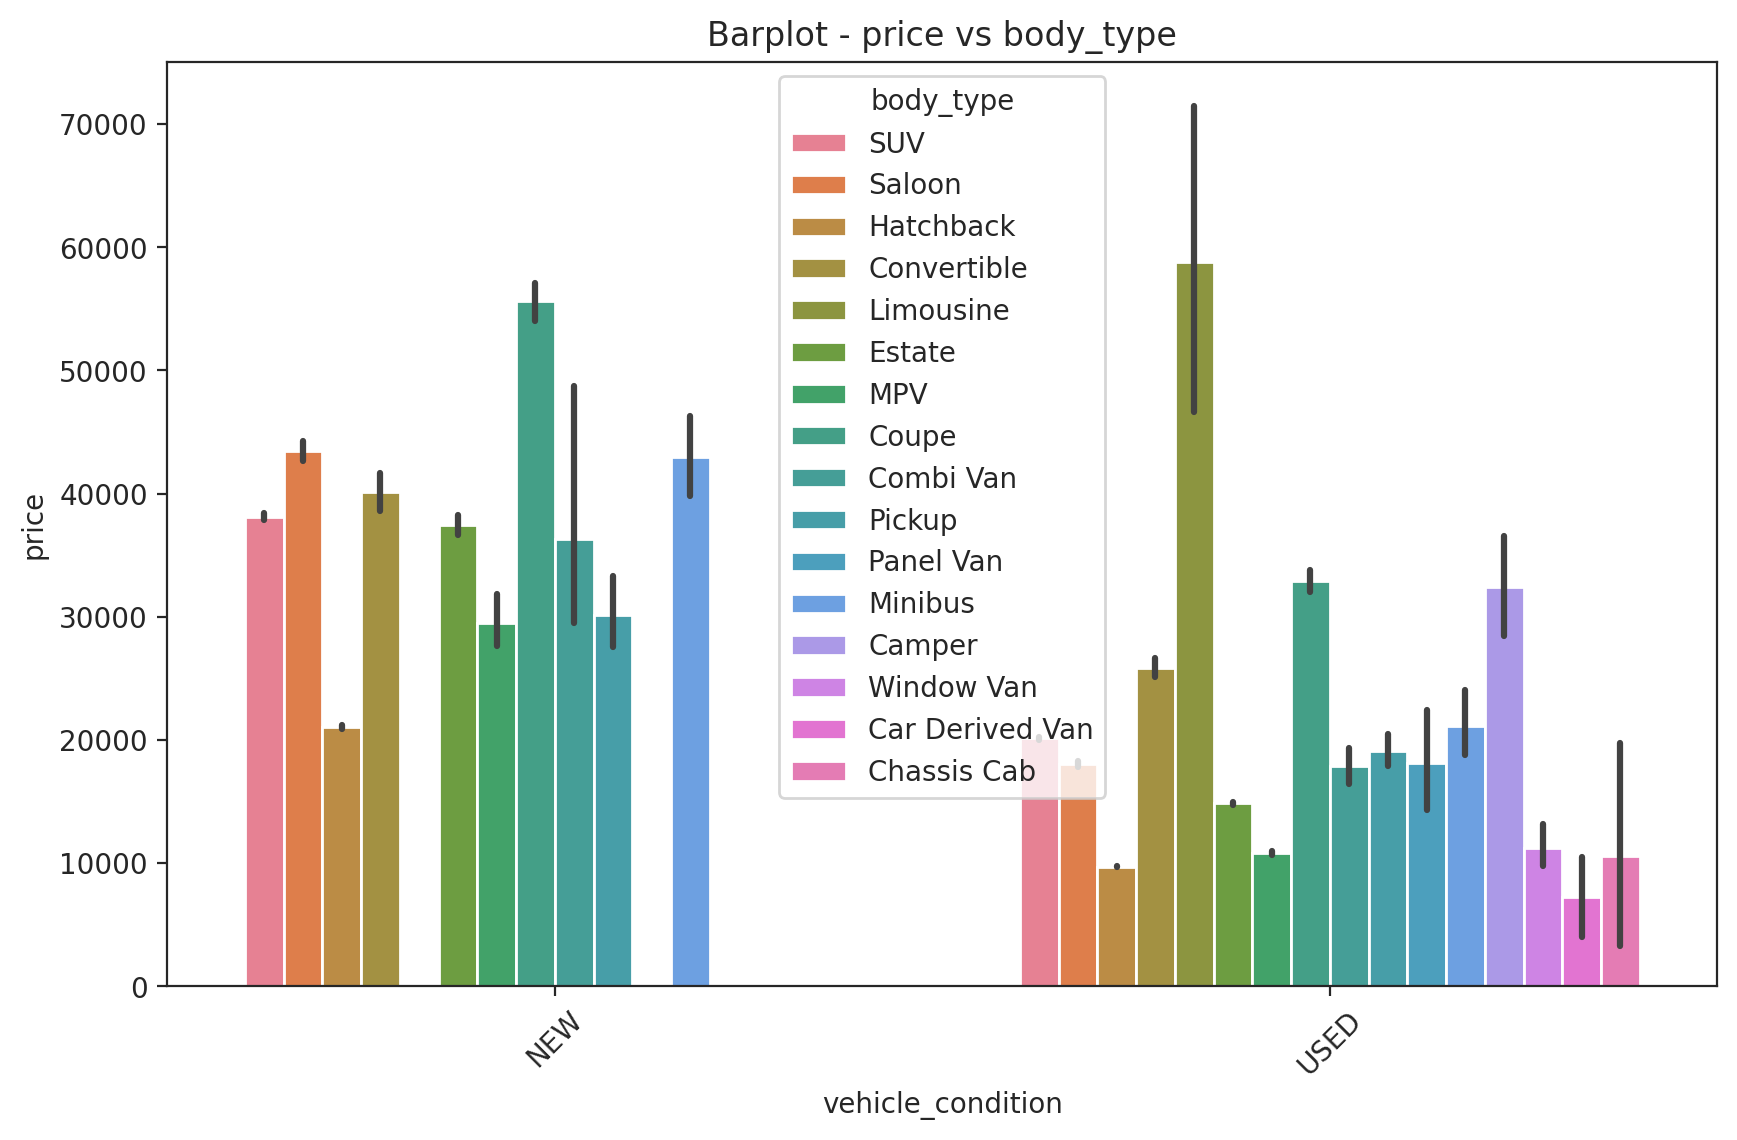

In [191]:
plt.figure(figsize=(10, 6))
sns.barplot(d1,x=d1['vehicle_condition'],y=d1['price'], hue=d1['body_type'])
plt.title('Barplot - price vs body_type')
plt.tick_params(axis='x', rotation=45)
#plt.legend(loc='upper right')



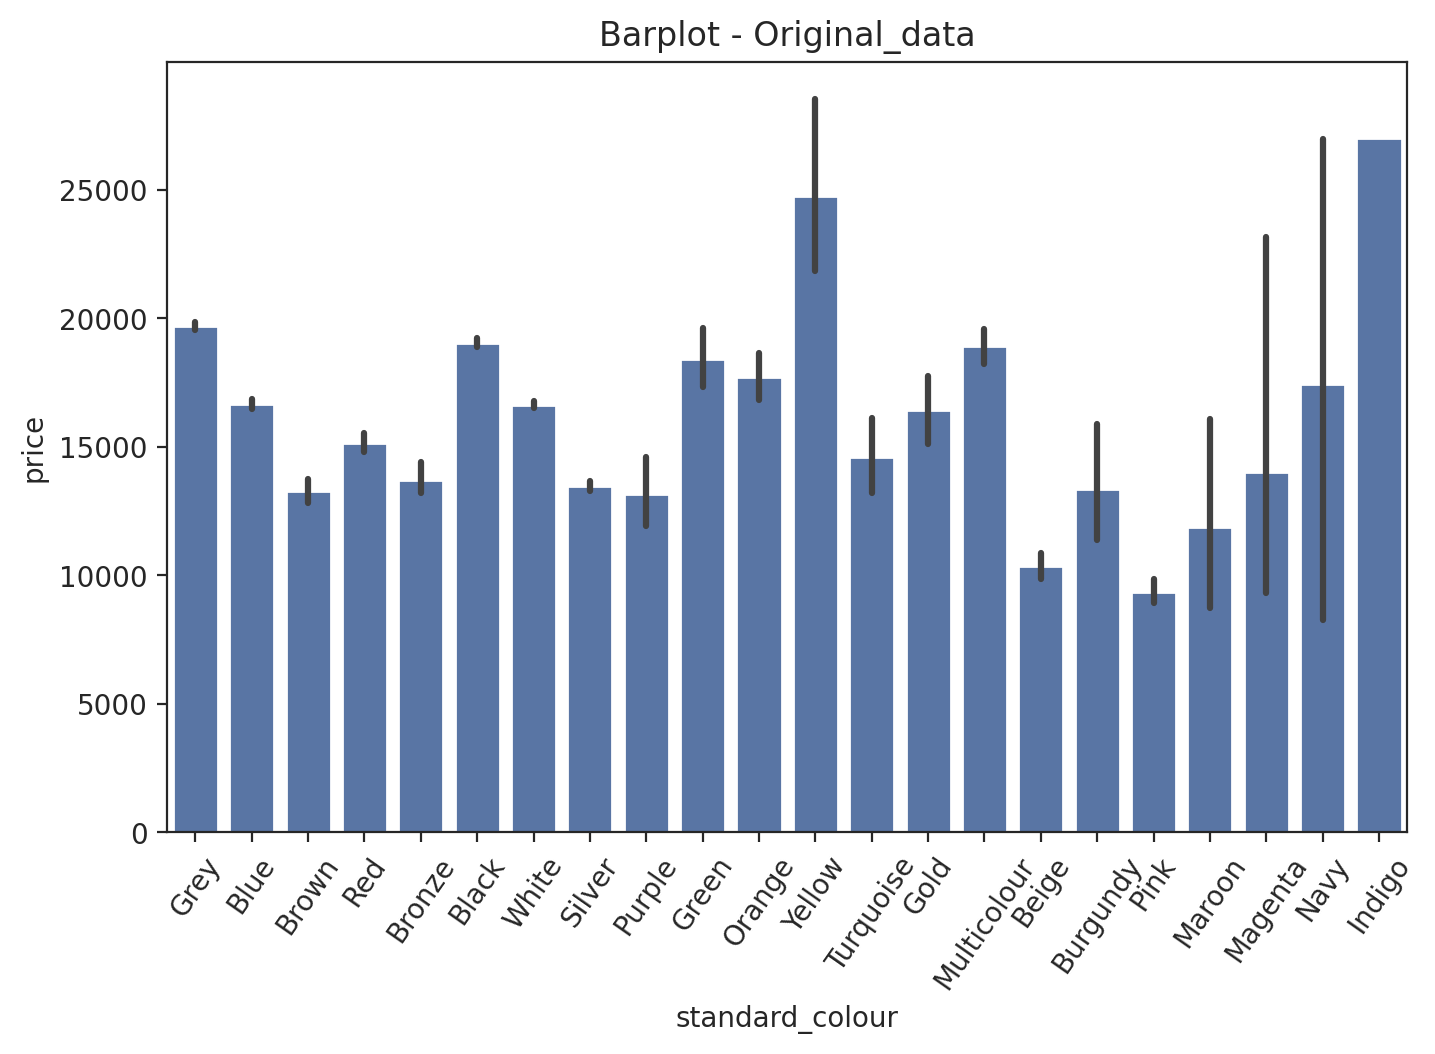

In [192]:
plt.figure(figsize=(8,5))


sns.barplot(d1,x=d1['standard_colour'],y=d1['price']) #hue=d1['fuel_type'],)
plt.title('Barplot - Original_data')
plt.tick_params(axis='x', rotation=55)



In [193]:
# check this after grouping by standard_make

In [194]:
d1.reset_index(drop=True,inplace=True)

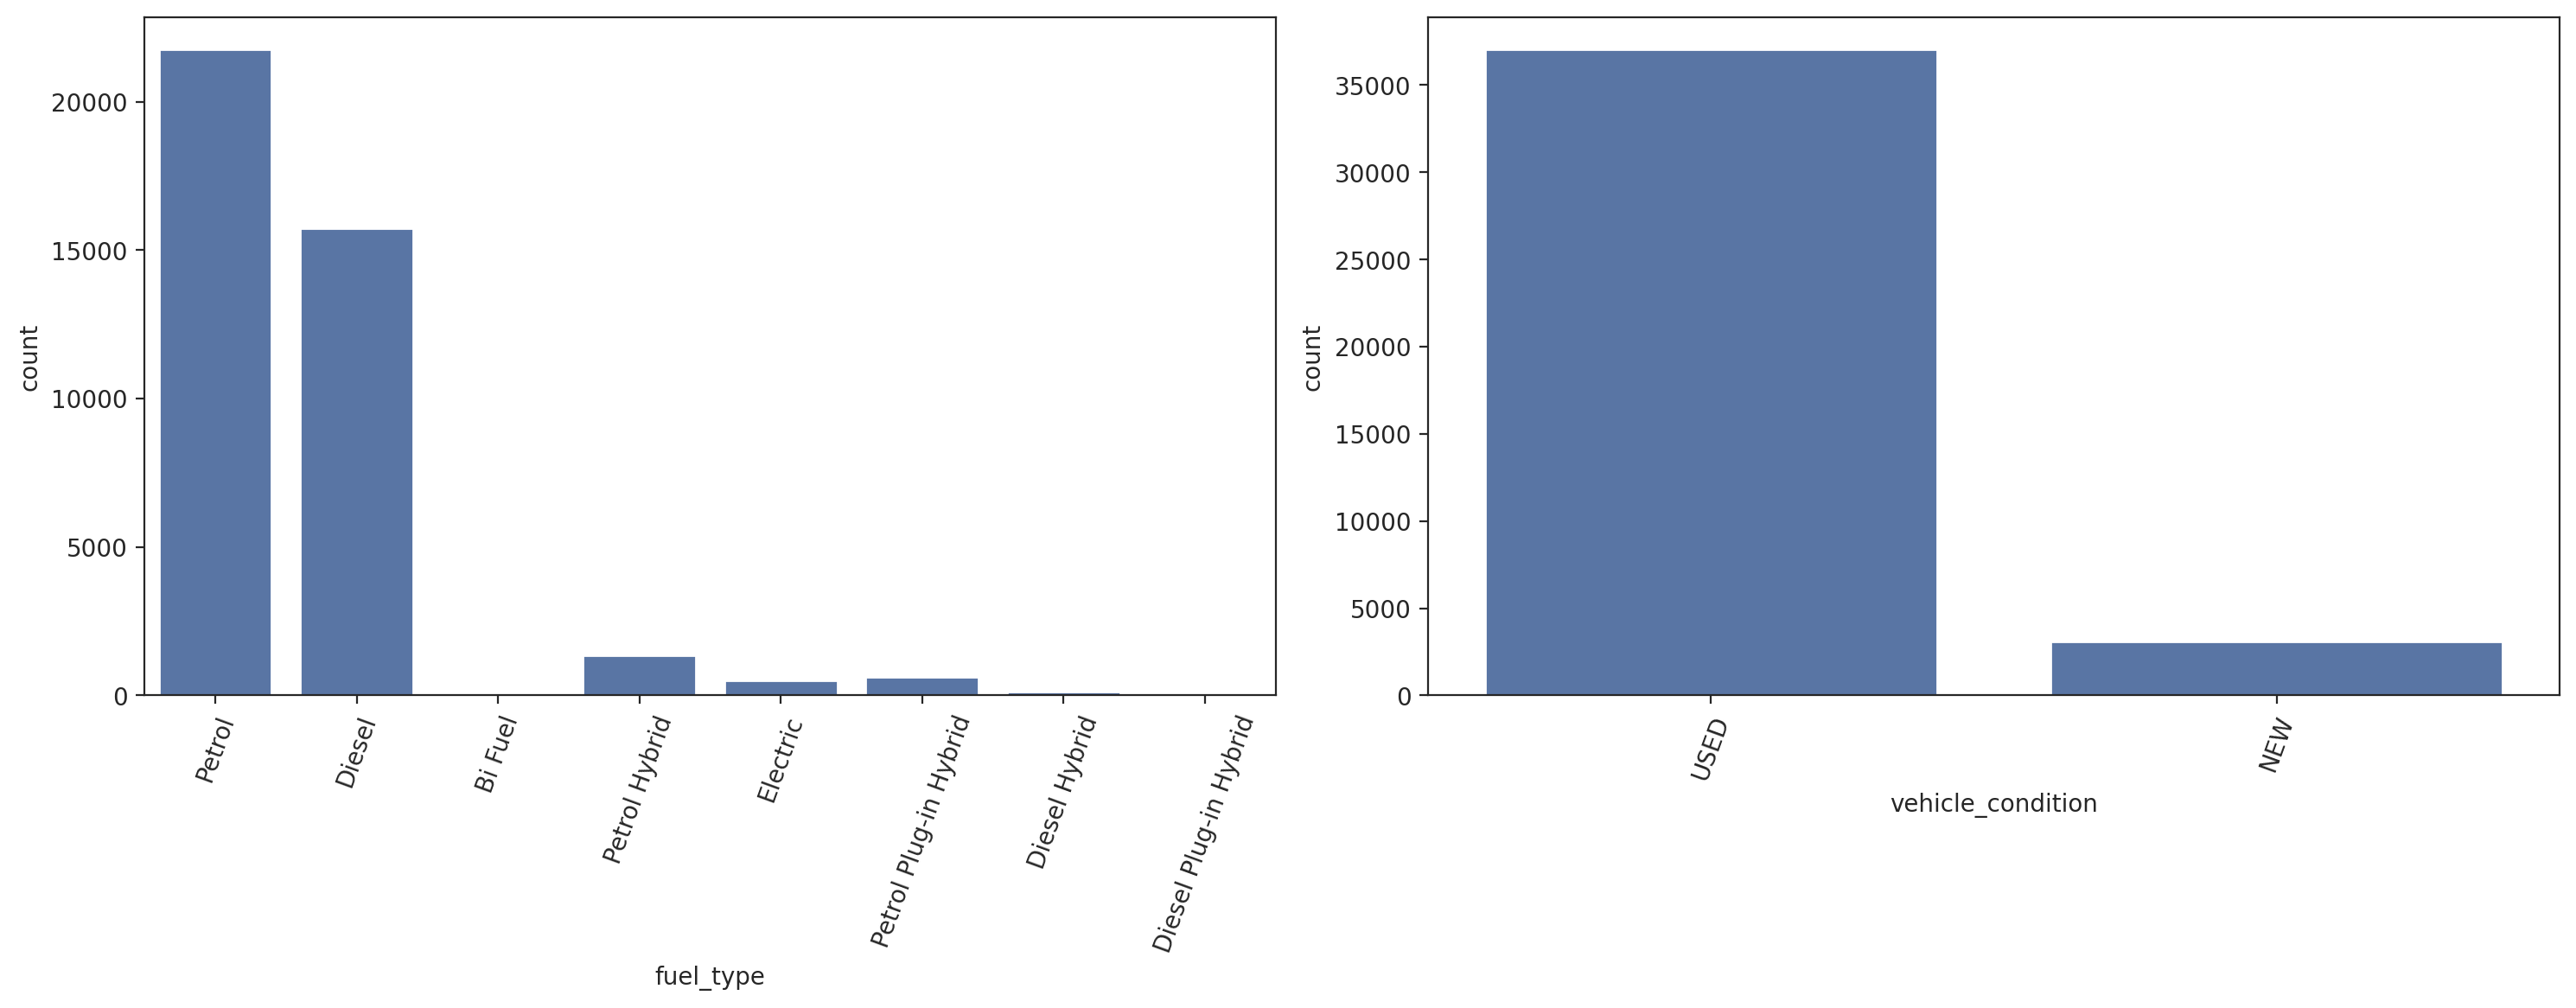

In [195]:
plt.figure(figsize=(15,10))
cat1=['fuel_type','vehicle_condition']
for i in range(0,len(cat1)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=d2[cat1[i]])
  plt.xlabel(cat1[i])
  plt.xticks(rotation=70)
  plt.tight_layout()

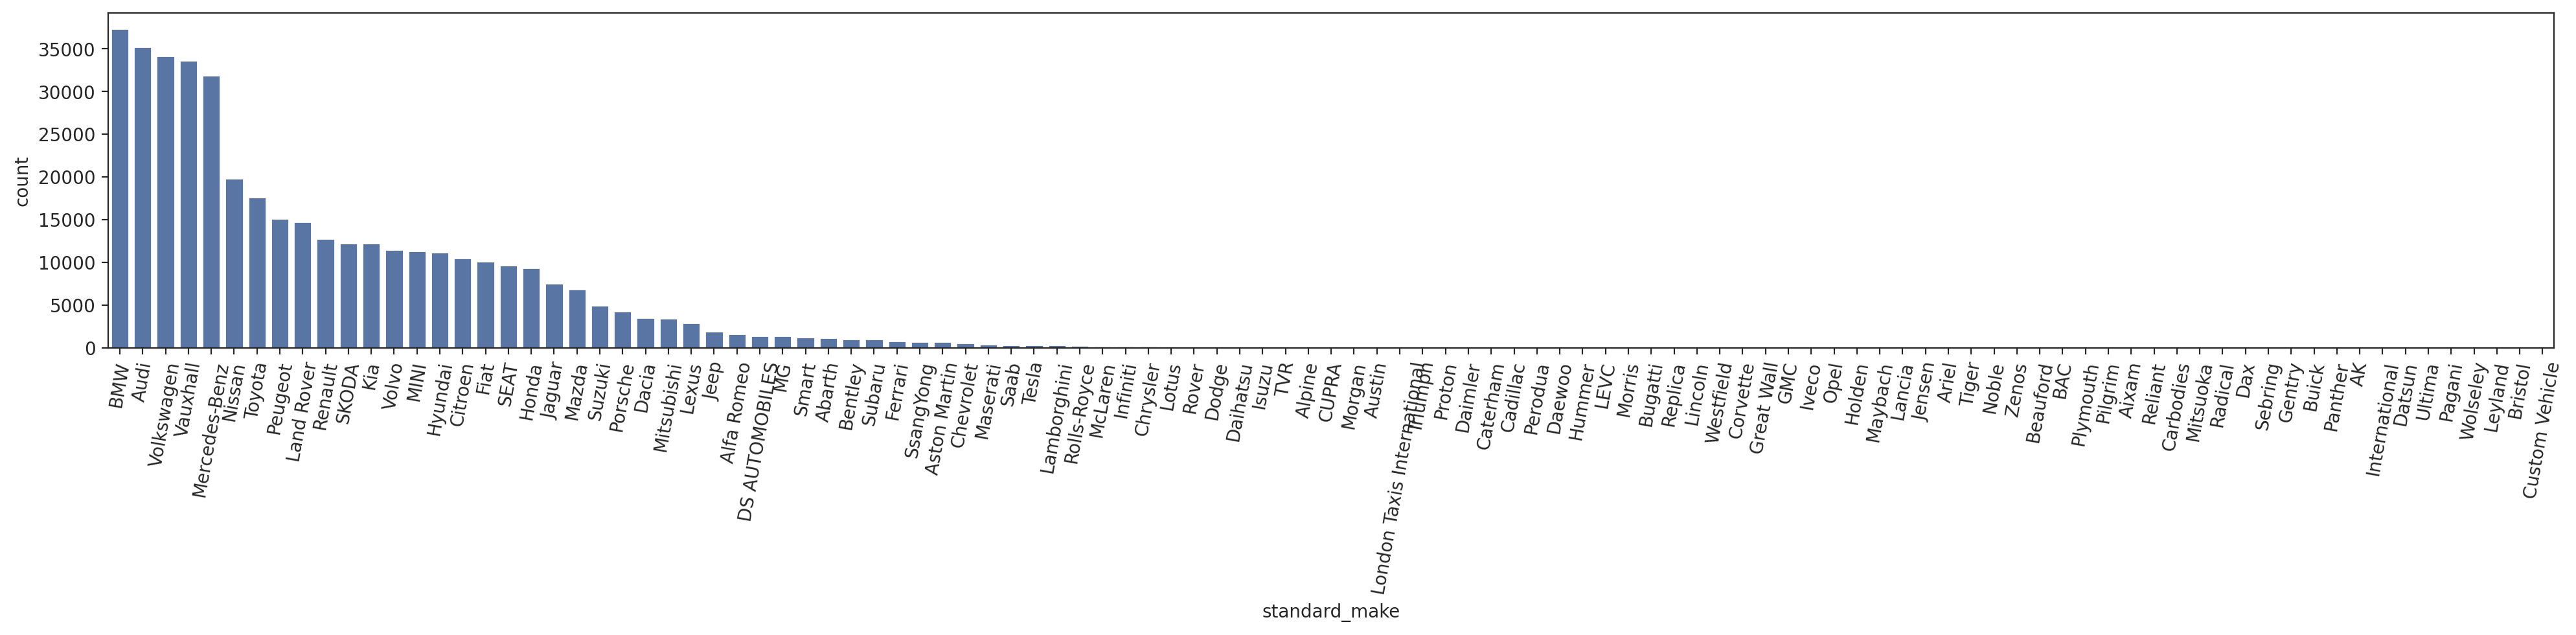

In [196]:
plt.figure(figsize=(20,5))
sns.countplot(data=d1,x='standard_make',order=d1['standard_make'].value_counts().index)
plt.xticks(rotation=80)
plt.tight_layout()

In [197]:
#from the above graph it can be stated that 'standard_makers' such as "Mercedes-Benz , BMW, Volkswagen,Audi, Vauxhall, Toyota,Peugeot, Land Rover" have more number
# cars that were advertized with 'BMW' as the top most brand in the list of count.



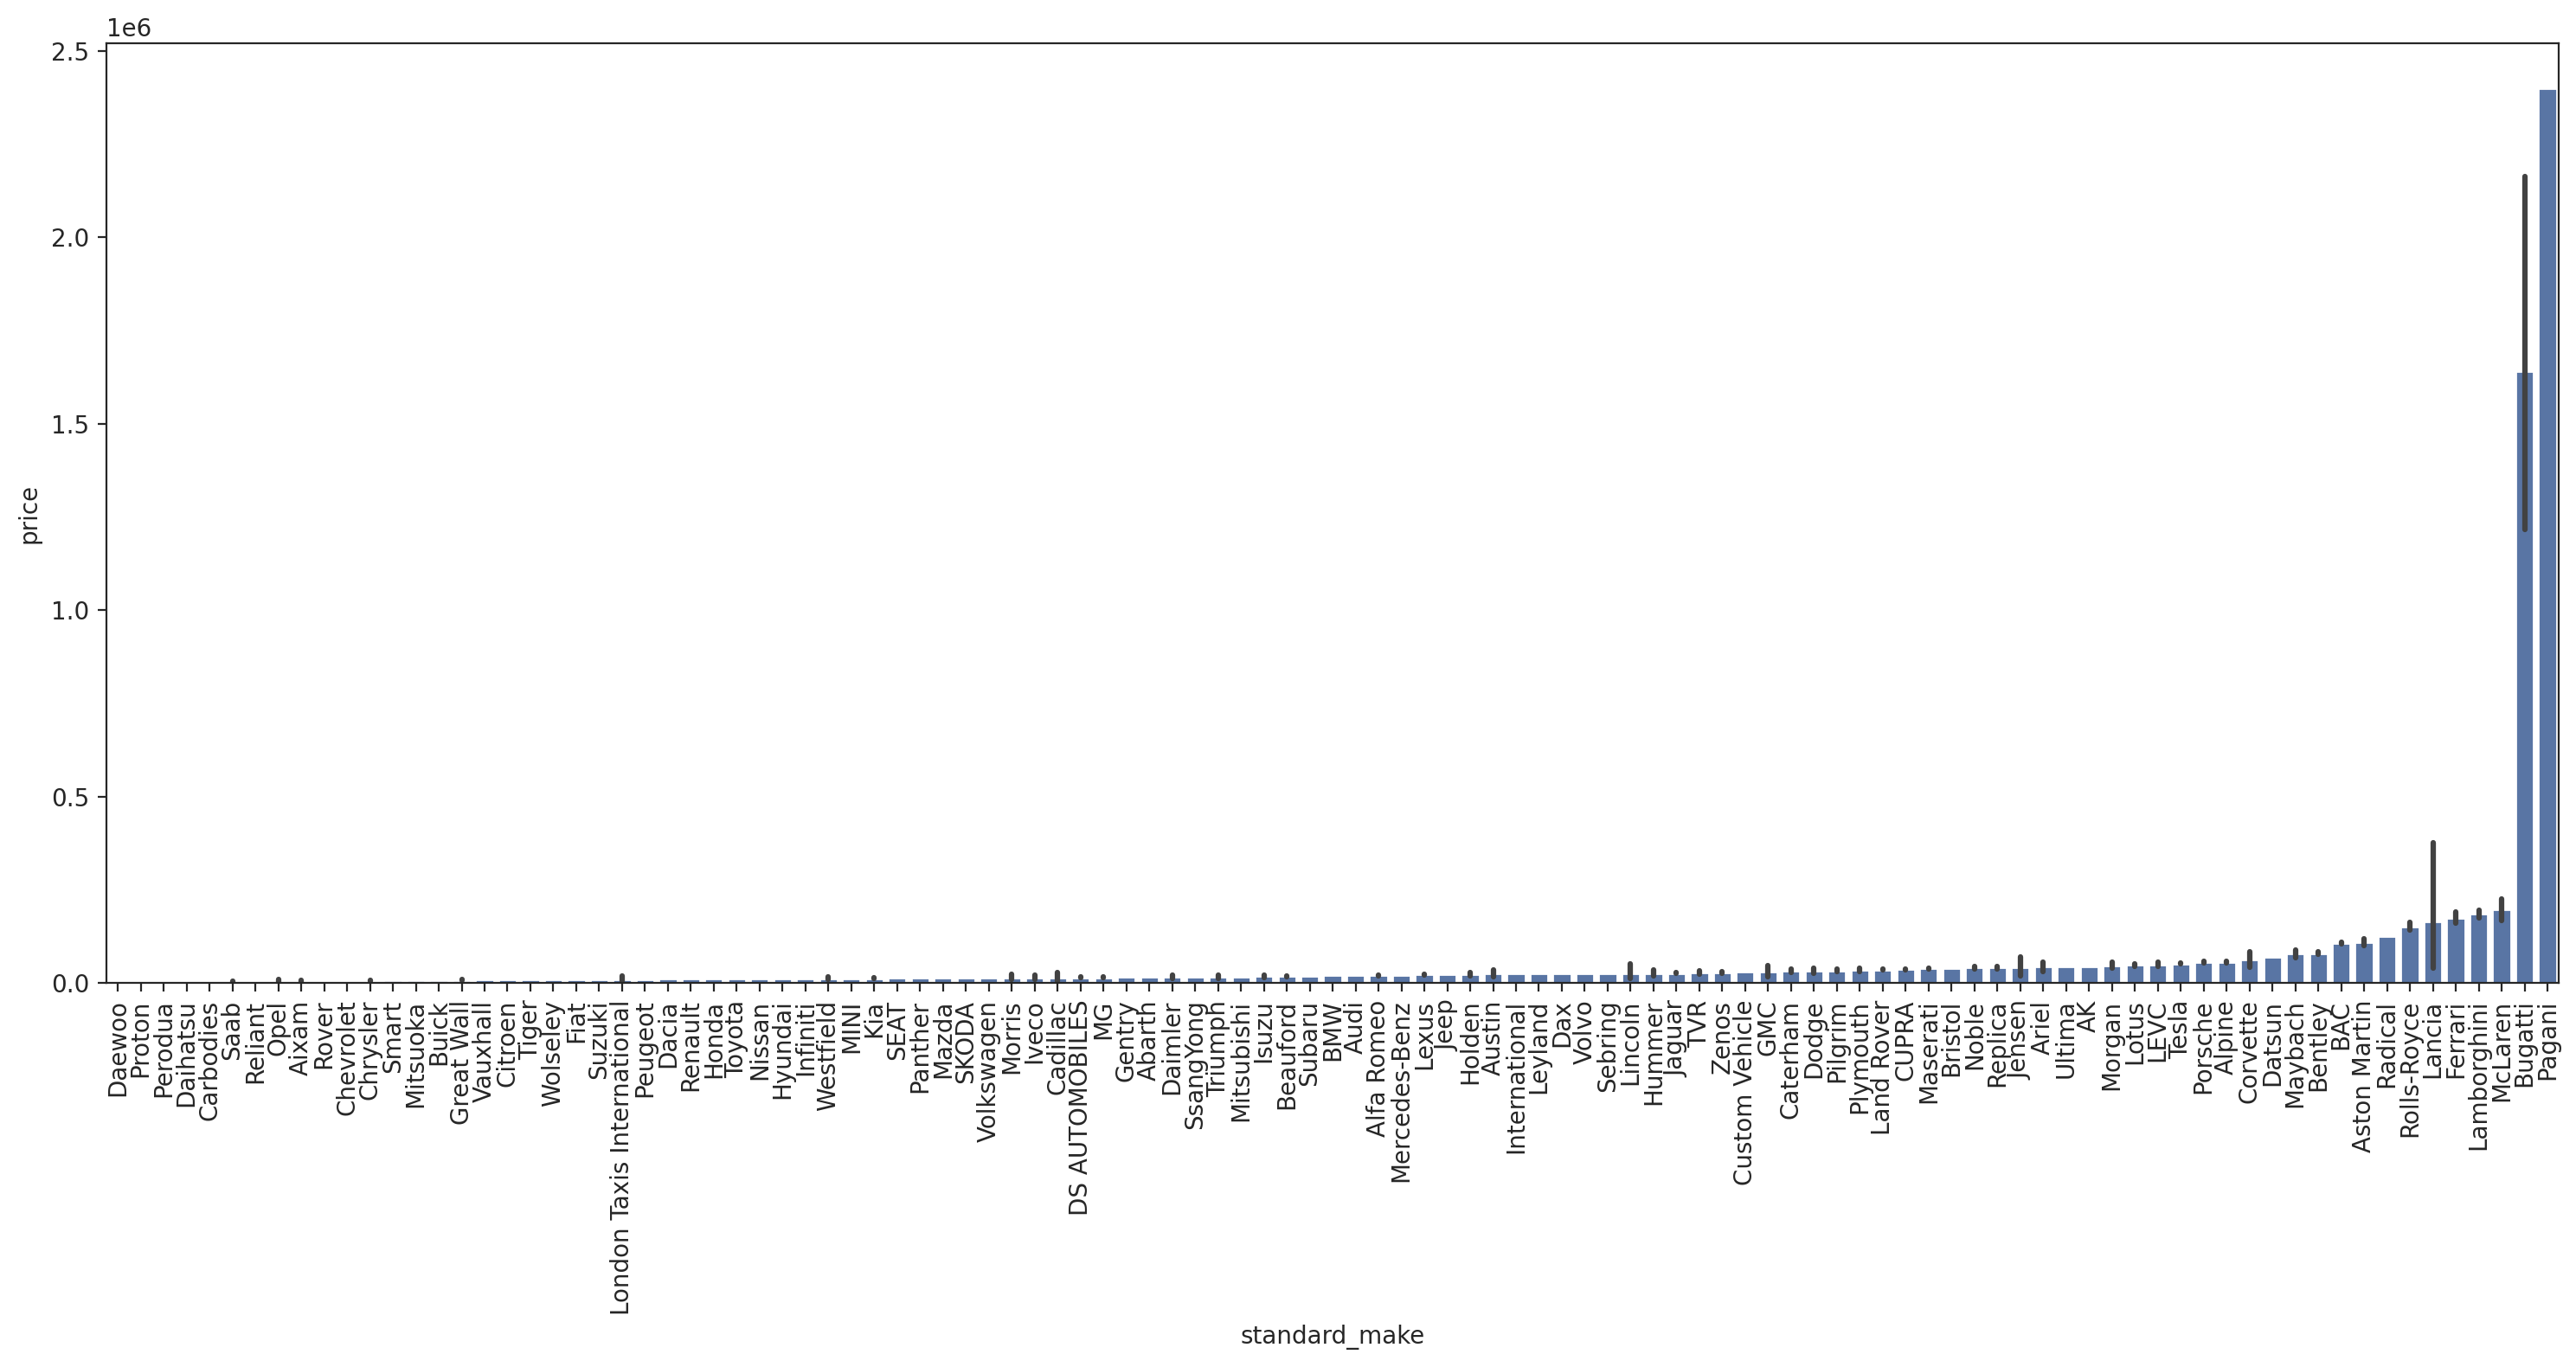

In [198]:
plt.figure(figsize=(15,8))
sns.barplot(data=d1, x='standard_make',y='price',order=d1.groupby('standard_make')['price'].mean().sort_values().index)
plt.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [199]:
d1.query('standard_make==["Bugatti","Pagani"]')

mileage standard_colour standard_make standard_model  \
21981    2180.0            Blue       Bugatti         Veyron   
51694    4400.0           Black       Bugatti         Veyron   
93953    1900.0           White        Pagani         Huayra   
103888  10895.0            Blue       Bugatti         Veyron   
196114  25000.0           Black       Bugatti         Veyron   
201239    828.0           Black       Bugatti         Veyron   
223643   1000.0            Blue       Bugatti         Chiron   
264143    600.0           Black       Bugatti         Veyron   
370004  19900.0           Black       Bugatti         Veyron   

       vehicle_condition  year_of_registration    price    body_type fuel_type  
21981               USED                2010.0  1590000  Convertible    Petrol  
51694               USED                2014.0  2850000        Coupe    Petrol  
93953               USED                2018.0  2400000  Convertible    Petrol  
103888              USED                2016.0  1699995        Coupe    Petrol  
196114              USED                2007.0   980000        Coupe    Petrol  
201239              USED                2007.0  1295000        Coupe    Petrol  
223643              USED                2018.0  2500000        Coupe    Petrol  
264143              USED                2020.0  1400000        Coupe    Petrol  
370004              USED                2012.0   815000        Coupe    Petrol

In [200]:
cars_with=d1.loc[[21981, 51694, 93953, 103888, 196114, 201239, 223643, 264143,370004]]

In [201]:
cars_pag=d1.drop([21981, 51694, 93953, 103888, 196114, 201239, 223643, 264143,370004])

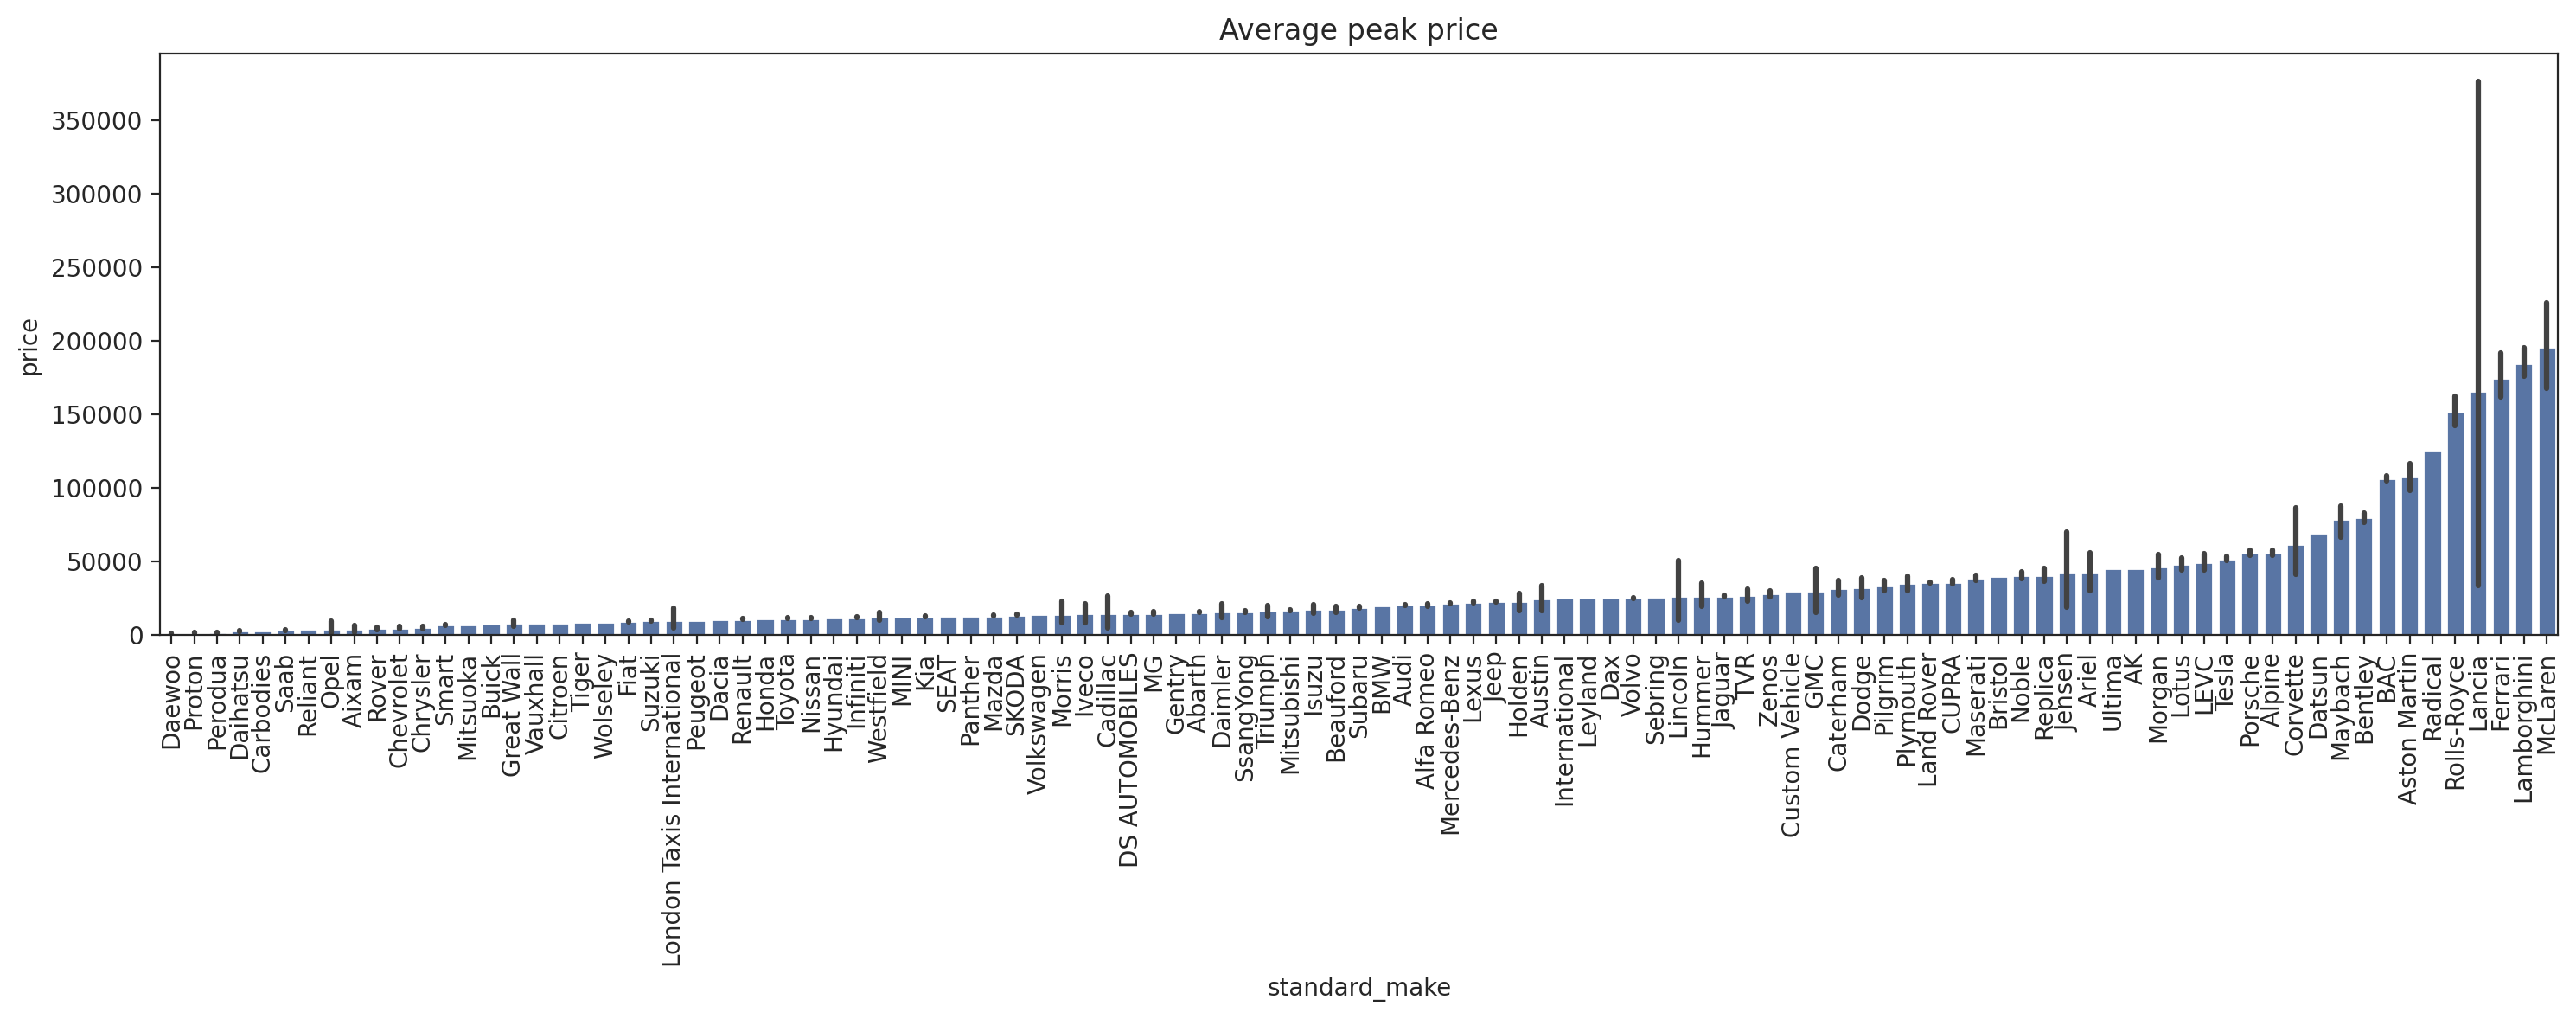

In [202]:
plt.figure(figsize=(15,6))
sns.barplot(data=cars_pag, x='standard_make',y='price',order=cars_pag.groupby('standard_make')['price'].mean().sort_values().index)
plt.title('Average peak price')
plt.tick_params(axis='x', rotation=90)
plt.tight_layout()

In [203]:
# The barplot above indicates that the car_brands such as  ['pagani','Bugatti',Lamborgini',Mc larens, Aston Martin,Ferrari, Rolls_Royce] has the mean peak  price value among all Car_brands
# asper individual car_model "Ferrari"-'LaFerrari" has the highest price among all car_models.

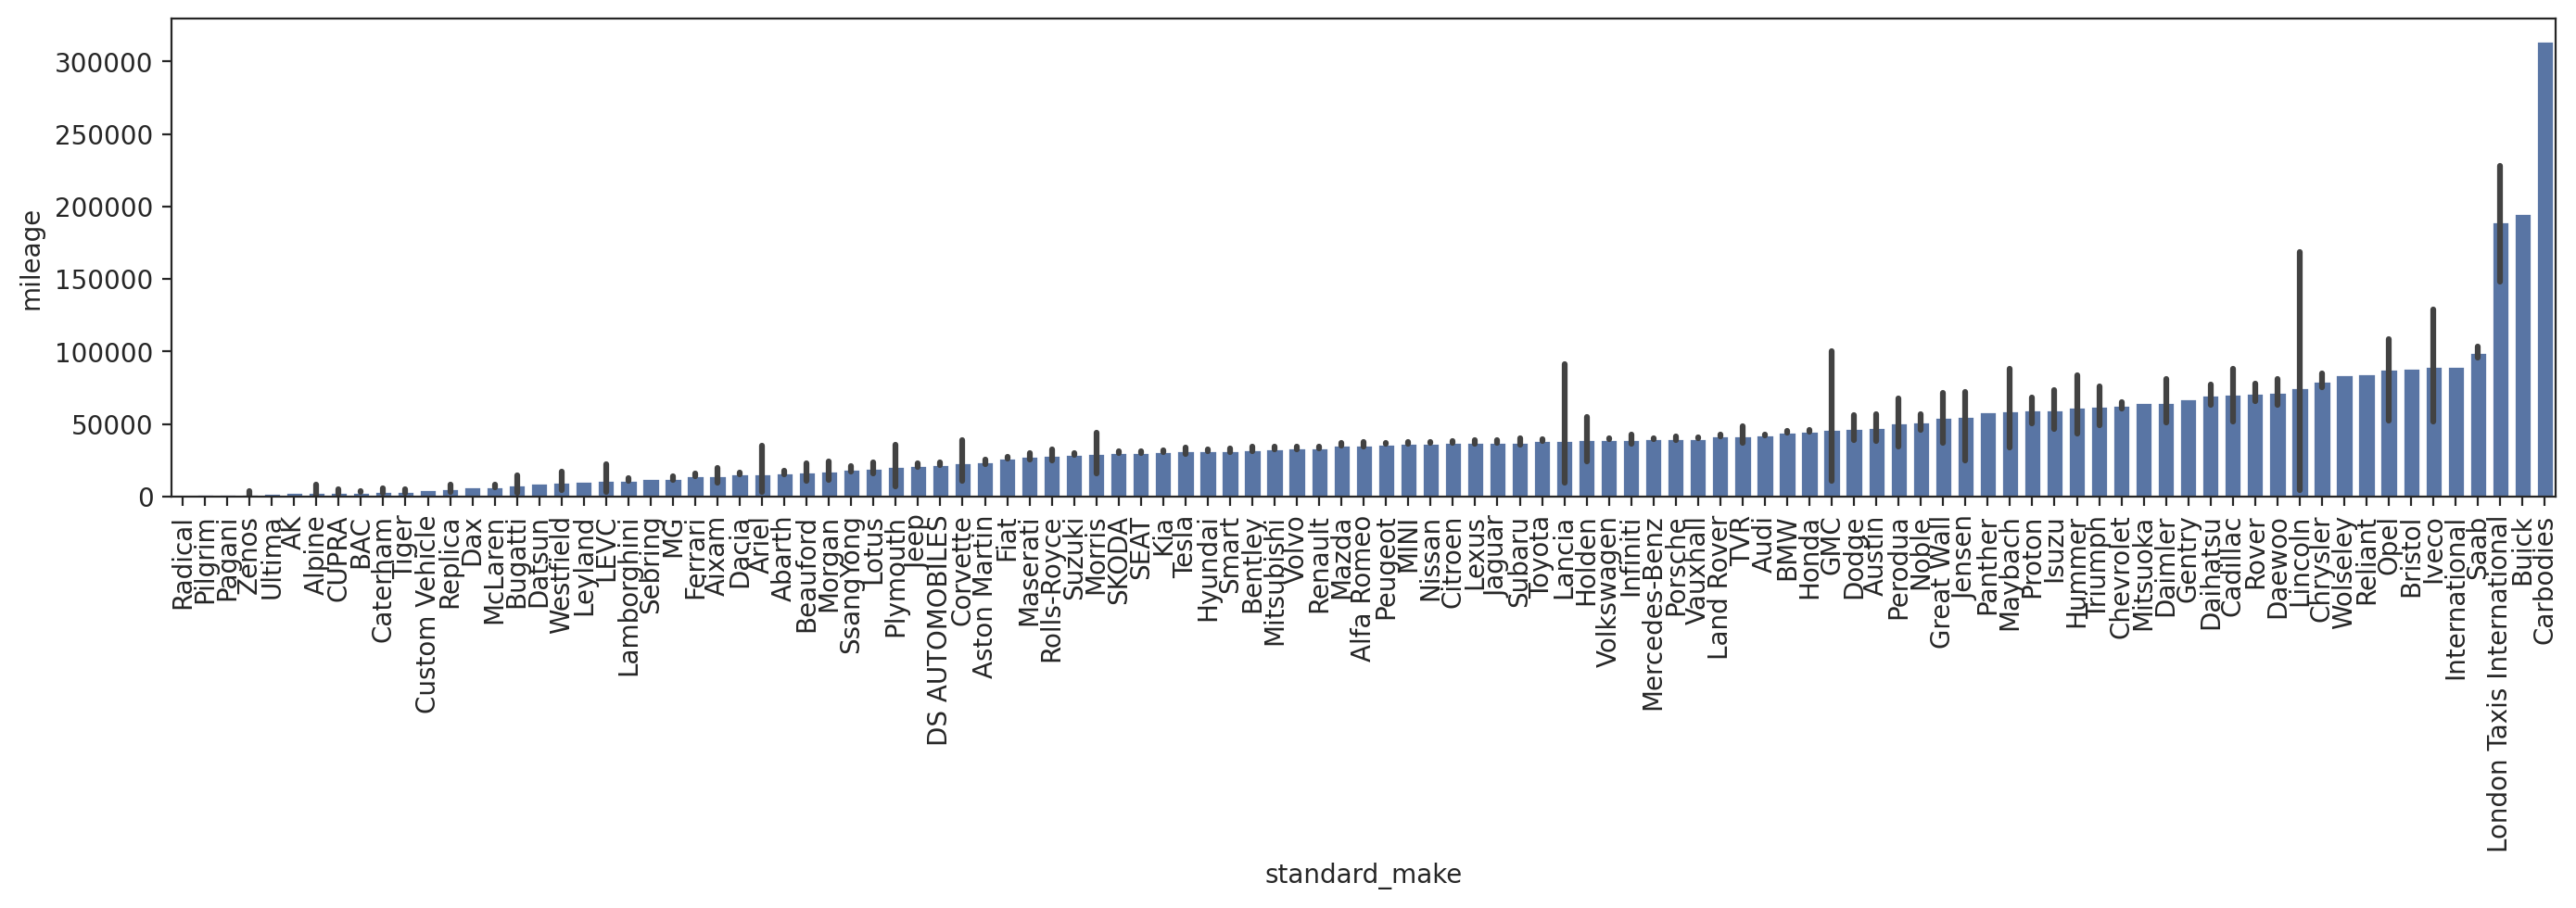

In [204]:
plt.figure(figsize=(14,5))
sns.barplot(data=d1, x=d1['standard_make'],y=d1['mileage'],order=d1.groupby('standard_make')['mileage'].mean().sort_values().index)
plt.xticks(rotation=90)# gives highest mean value for car_brands
plt.tight_layout()

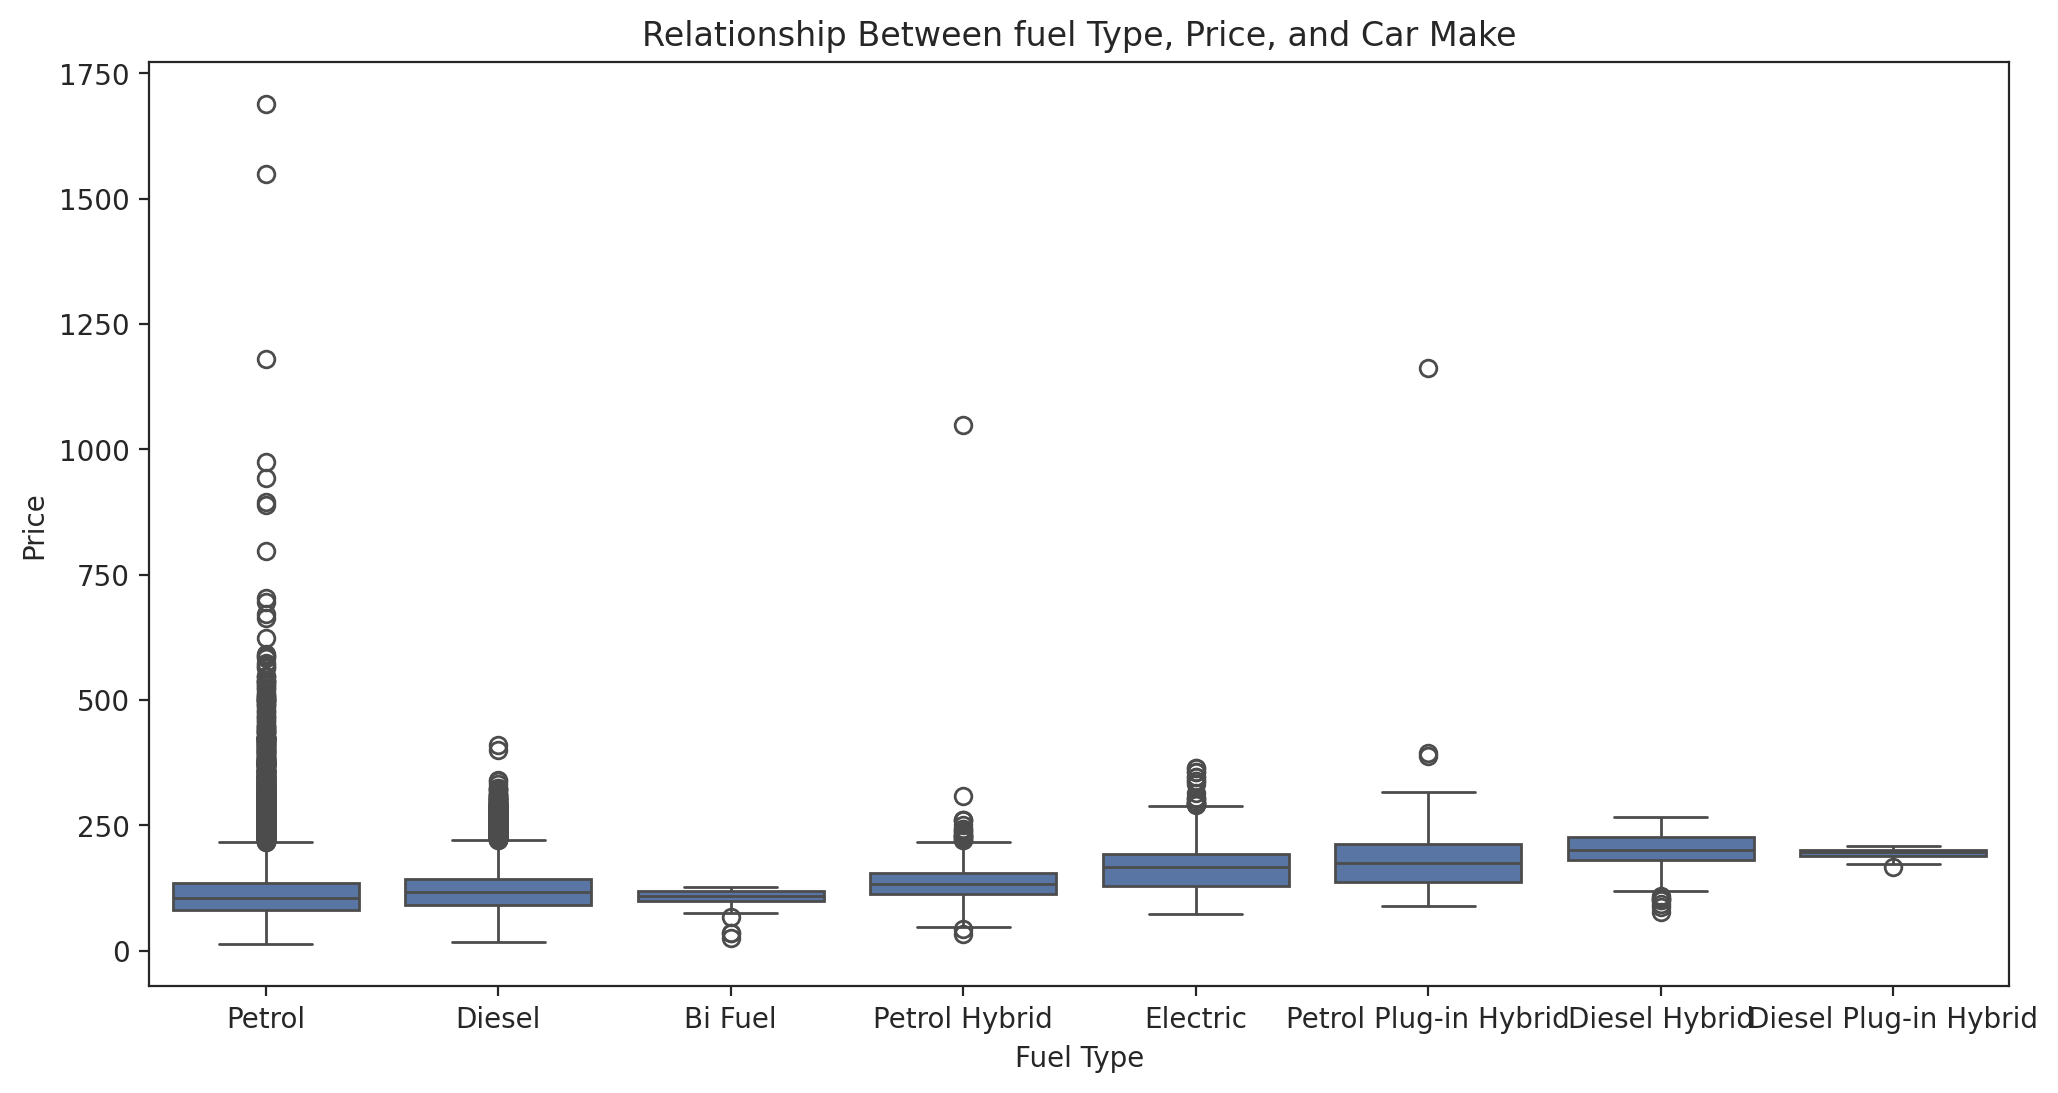

In [205]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel_type', y=sqrt_transformed_data['price'], data=d2, whis=1.5)
plt.title('Relationship Between fuel Type, Price, and Car Make')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

In [206]:
max_mil_driv=d1.groupby(['standard_make','standard_model','year_of_registration']).max().sort_values(by='mileage',ascending=False) # gives the max mileage driven by the standard_make car and Skoda has the highest driven value
max_mil_driv

mileage standard_colour  \
standard_make standard_model year_of_registration                             
SKODA         Octavia        2010.0                413079.0           White   
BMW           X5             2016.0                400321.0           White   
SKODA         Superb         2013.0                388000.0           White   
Mitsubishi    Delica         2004.0                368199.0           Green   
Peugeot       Partner        2010.0                360000.0           White   
...                                                     ...             ...   
Jaguar        XK150          1959.0                     1.0             Red   
Mazda         MX-30          2020.0                     0.0          Silver   
Mitsubishi    Shogun         2020.0                     0.0           White   
Suzuki        Across         2020.0                     0.0           White   
Renault       Twizy          2020.0                     0.0           White   

                                                  vehicle_condition   price  \
standard_make standard_model year_of_registration                             
SKODA         Octavia        2010.0                            USED    7866   
BMW           X5             2016.0                            USED   38995   
SKODA         Superb         2013.0                            USED   11995   
Mitsubishi    Delica         2004.0                            USED    1995   
Peugeot       Partner        2010.0                            USED    3695   
...                                                             ...     ...   
Jaguar        XK150          1959.0                            USED  109995   
Mazda         MX-30          2020.0                             NEW   27495   
Mitsubishi    Shogun         2020.0                             NEW   37080   
Suzuki        Across         2020.0                             NEW   45599   
Renault       Twizy          2020.0                             NEW   13135   

                                                     body_type  \
standard_make standard_model year_of_registration                
SKODA         Octavia        2010.0                  Hatchback   
BMW           X5             2016.0                        SUV   
SKODA         Superb         2013.0                  Hatchback   
Mitsubishi    Delica         2004.0                        MPV   
Peugeot       Partner        2010.0                        MPV   
...                                                        ...   
Jaguar        XK150          1959.0                Convertible   
Mazda         MX-30          2020.0                        SUV   
Mitsubishi    Shogun         2020.0                     Estate   
Suzuki        Across         2020.0                        SUV   
Renault       Twizy          2020.0                      Coupe   

                                                               fuel_type  
standard_make standard_model year_of_registration                         
SKODA         Octavia        2010.0                               Petrol  
BMW           X5             2016.0                Petrol Plug-in Hybrid  
SKODA         Superb         2013.0                               Petrol  
Mitsubishi    Delica         2004.0                               Diesel  
Peugeot       Partner        2010.0                               Petrol  
...                                                                  ...  
Jaguar        XK150          1959.0                               Petrol  
Mazda         MX-30          2020.0                             Electric  
Mitsubishi    Shogun         2020.0                               Diesel  
Suzuki        Across         2020.0                Petrol Plug-in Hybrid  
Renault       Twizy          2020.0                             Electric  

[8069 rows x 6 columns]

In [207]:
peak_avg_mil=d1.groupby(['standard_make', 'standard_model'])['mileage'].mean().sort_values(ascending=False)# highest average mileage
peak_avg_mil

standard_make               standard_model
London Taxis International  TXI               339372.0
Carbodies                   Black Cab         314135.0
Mercedes-Benz               310               221000.0
London Taxis International  TXII              215445.4
Buick                       Riviera           195668.0
                                                ...   
CUPRA                       Formentor              5.0
Jaguar                      XK150                  1.0
Audi                        100                    1.0
Mazda                       MX-30                  0.0
Suzuki                      Across                 0.0
Name: mileage, Length: 1185, dtype: float64

In [208]:
vintage_cars=d1.loc[(d1['vehicle_condition']=='USED') & (d1['year_of_registration']<=1990)&(d1['price']>100000)]
vintage_cars.sort_values(by='price',ascending=False)


mileage standard_colour standard_make standard_model  \
186395  57000.0           Black  Aston Martin            DB5   
3397      461.0           Green  Aston Martin            DB6   
364387  31015.0          Silver  Aston Martin            DB5   
353089  14536.0            Grey       Ferrari            365   
137293  82000.0           Black  Aston Martin            DB5   
...         ...             ...           ...            ...   
236870  21450.0          Silver        Jaguar         E-Type   
304566  12000.0          Yellow       Ferrari     Testarossa   
382406  21778.0             Red       Porsche            911   
235165      1.0             Red        Jaguar          XK150   
322894  76500.0             Red       Porsche            911   

       vehicle_condition  year_of_registration    price    body_type fuel_type  
186395              USED                1964.0  1200000       Saloon    Petrol  
3397                USED                1970.0   950000  Convertible    Petrol  
364387              USED                1964.0   795000       Saloon    Petrol  
353089              USED                1969.0   790000        Coupe    Petrol  
137293              USED                1964.0   649995        Coupe    Petrol  
...                  ...                   ...      ...          ...       ...  
236870              USED                1968.0   114995  Convertible    Petrol  
304566              USED                1988.0   114950        Coupe    Petrol  
382406              USED                1989.0   112900        Coupe    Petrol  
235165              USED                1959.0   109995  Convertible    Petrol  
322894              USED                1965.0   109000       Saloon    Petrol  

[92 rows x 9 columns]

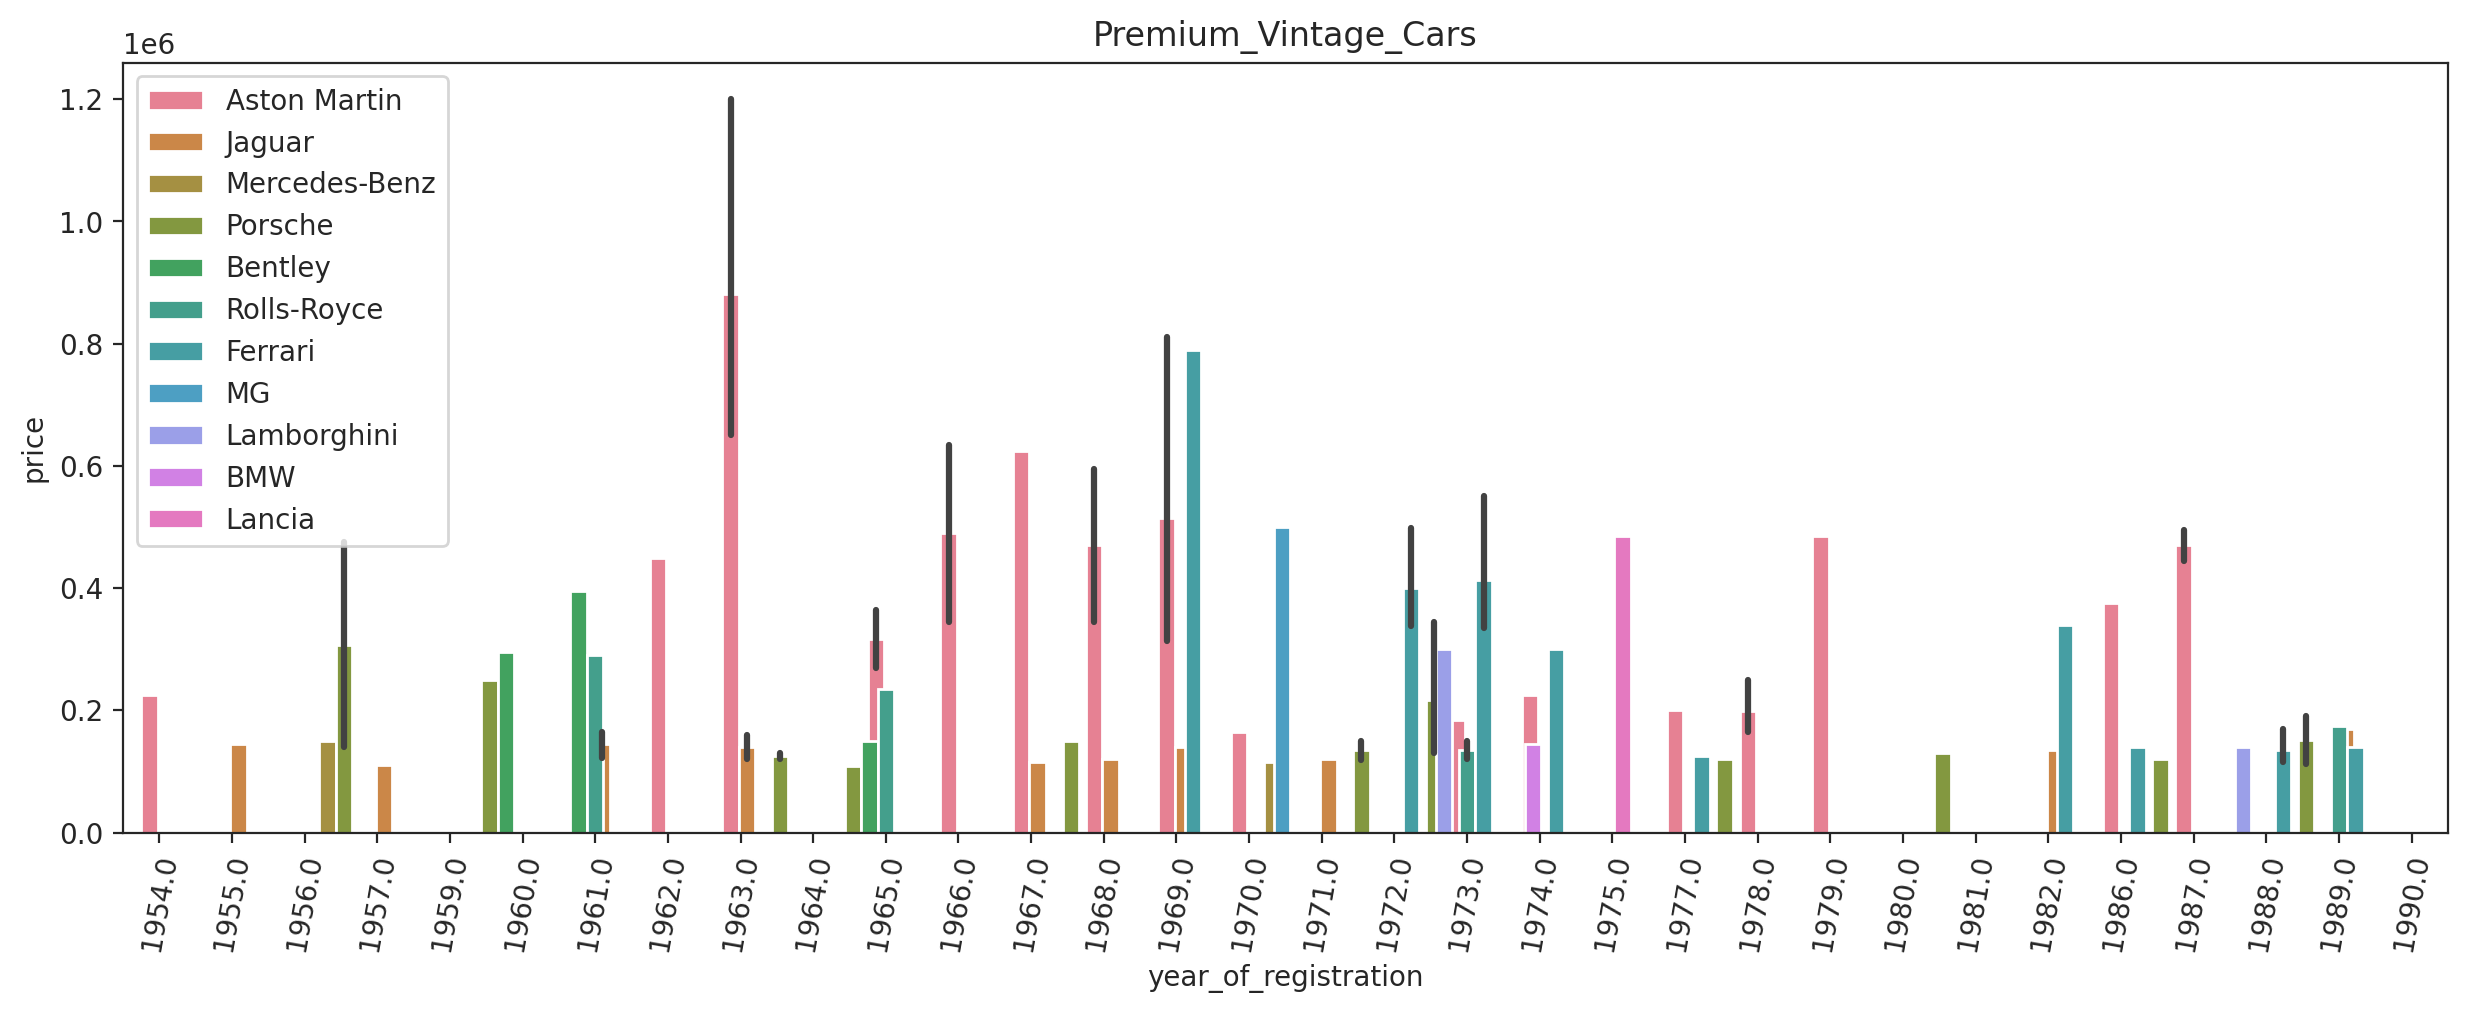

In [209]:
plt.figure(figsize=(15, 5))

sns.barplot(data=vintage_cars,x='year_of_registration',y= 'price',hue='standard_make', width=2.5)
plt.title('Premium_Vintage_Cars')
plt.xticks(rotation=80)
plt.legend(loc='upper left')

In [210]:
luxury_cars=d1.loc[(d1['price']>=100000)&(d1['year_of_registration']>2000)]
luxury_cars.sort_values(by='price',ascending=False).head()

mileage standard_colour standard_make standard_model  \
197887    300.0             Red       Ferrari      LaFerrari   
51694    4400.0           Black       Bugatti         Veyron   
223643   1000.0            Blue       Bugatti         Chiron   
93953    1900.0           White        Pagani         Huayra   
72615     475.0          Yellow       Ferrari      LaFerrari   

       vehicle_condition  year_of_registration    price    body_type fuel_type  
197887              USED                2017.0  3799995        Coupe    Petrol  
51694               USED                2014.0  2850000        Coupe    Petrol  
223643              USED                2018.0  2500000        Coupe    Petrol  
93953               USED                2018.0  2400000  Convertible    Petrol  
72615               USED                2015.0  2299950        Coupe    Petrol

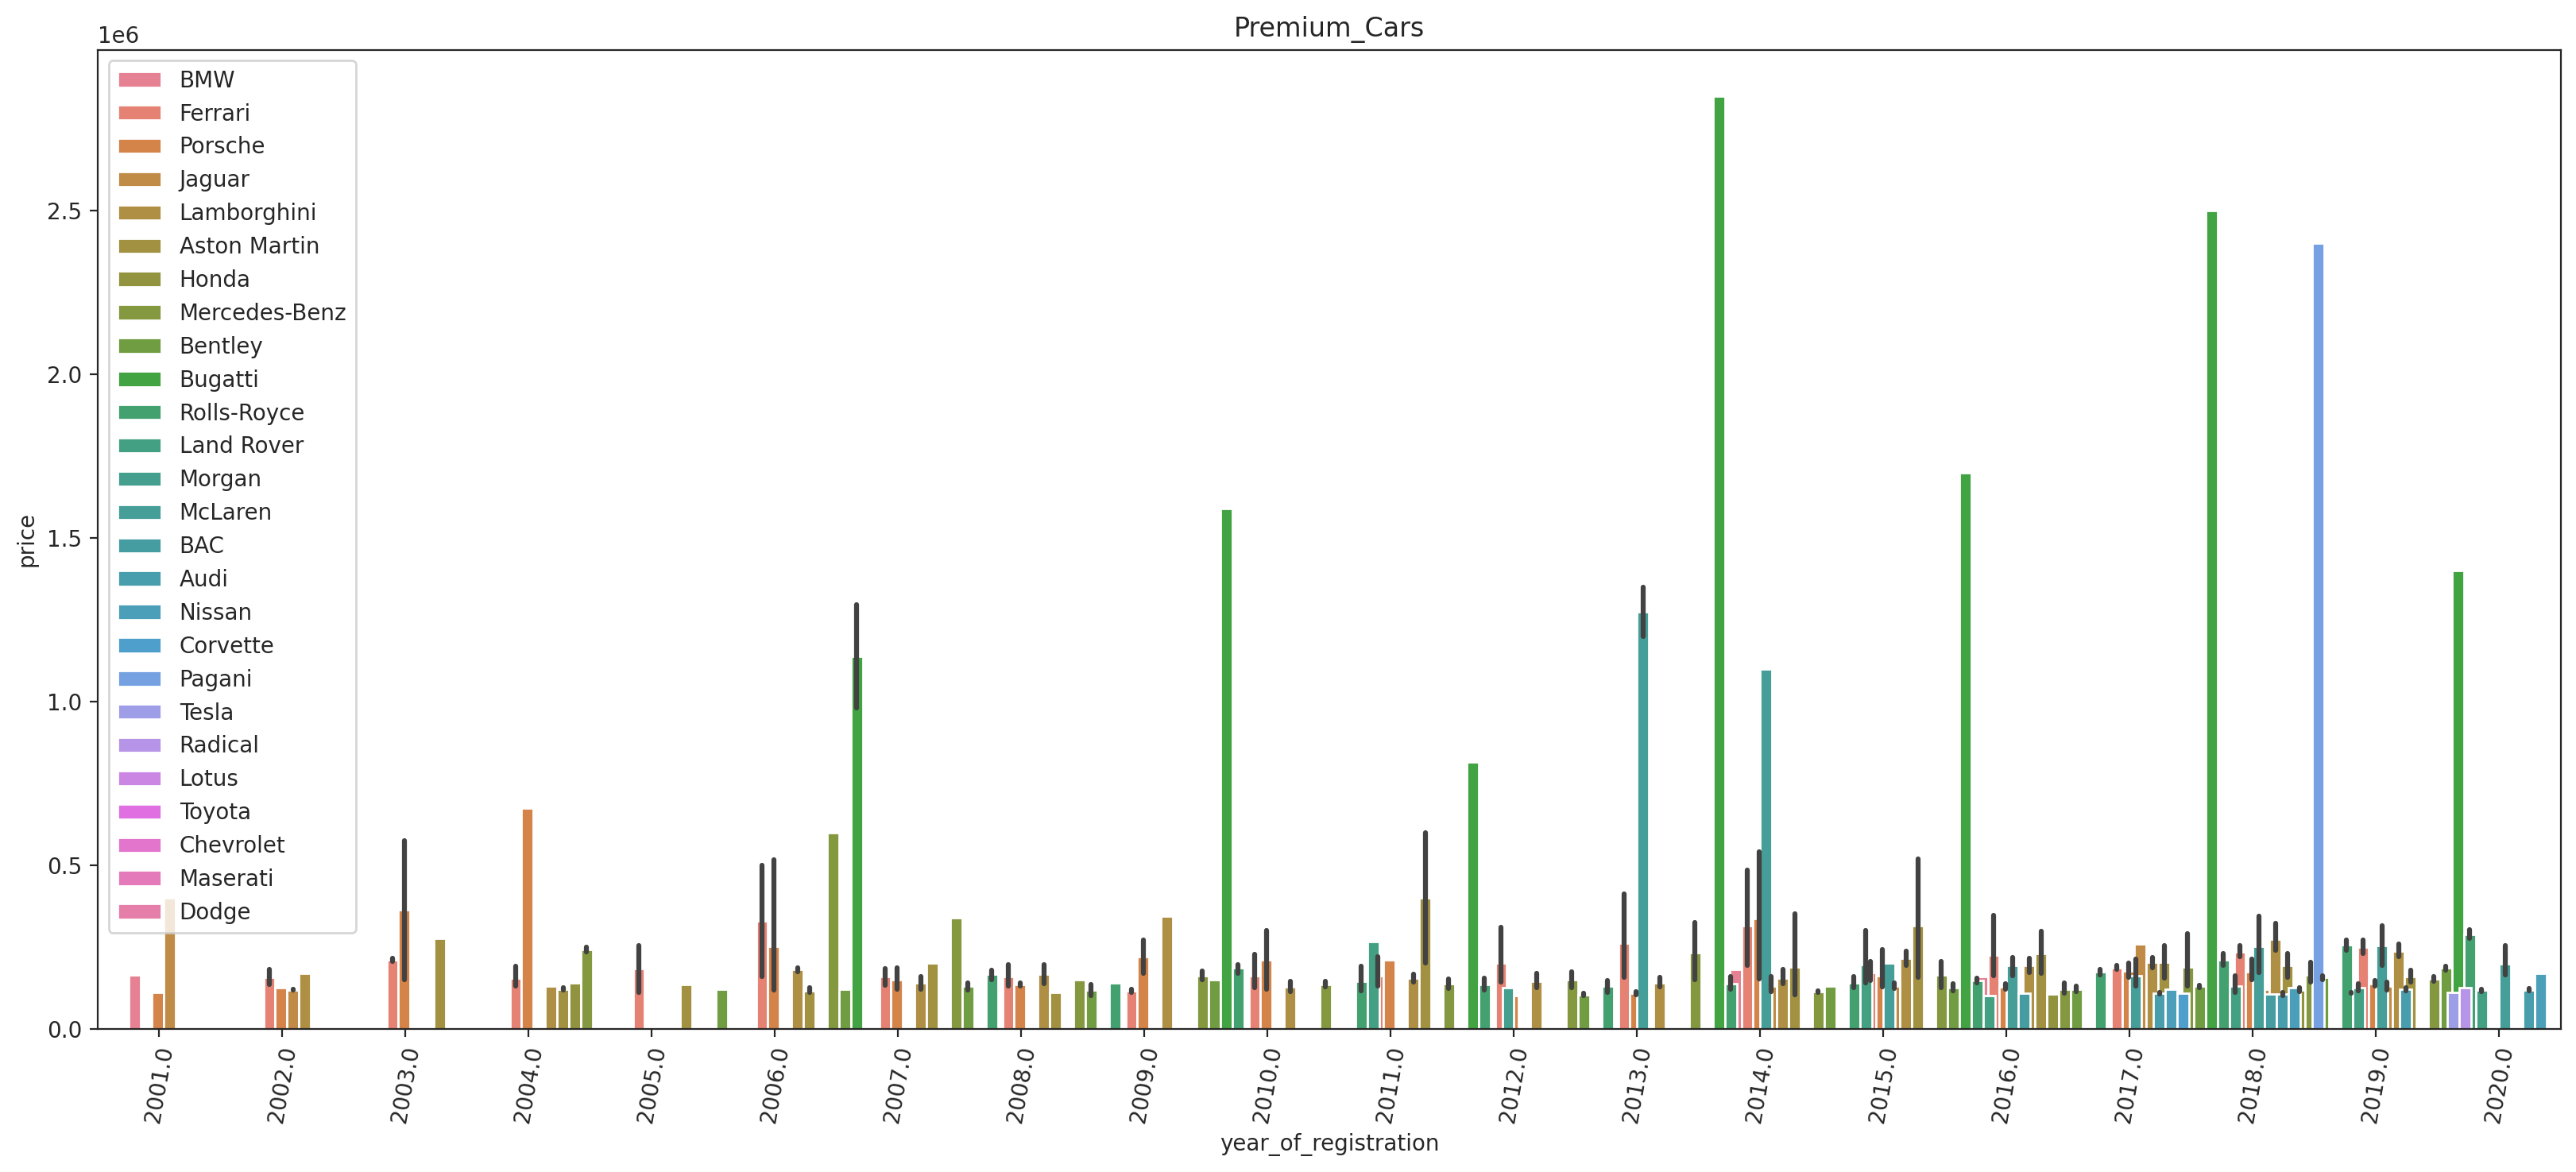

In [211]:
plt.figure(figsize=(20, 8))

sns.barplot(x=luxury_cars['year_of_registration'],y= luxury_cars['price'],hue=luxury_cars['standard_make'], width=2.5)
plt.title('Premium_Cars')
plt.xticks(rotation=80)
plt.legend(loc='upper left')



In [212]:
commercial_cars=d1.loc[(d1['mileage']>=150000)&(d1['year_of_registration']>2005.0)][['standard_make','standard_model','body_type','mileage','price']]
commercial_cars#.sort_values(by='standard_make', ascending=False)

standard_make standard_model  body_type   mileage  price
32              SKODA        Octavia  Hatchback  180000.0   3989
187              Audi             TT      Coupe  151580.0   3490
215              Audi             A4     Saloon  150000.0   1100
256            Toyota        Avensis     Estate  196000.0   4989
675        Volkswagen           Golf  Hatchback  154000.0   3550
...               ...            ...        ...       ...    ...
400791          Volvo            V70     Estate  156000.0   1999
400960          Volvo            V50     Estate  155000.0   1990
400970     Volkswagen         Passat     Estate  186000.0   9989
401311         Nissan        Qashqai  Hatchback  180000.0    750
401351  Mercedes-Benz        C Class     Estate  160000.0   9391

[1984 rows x 5 columns]

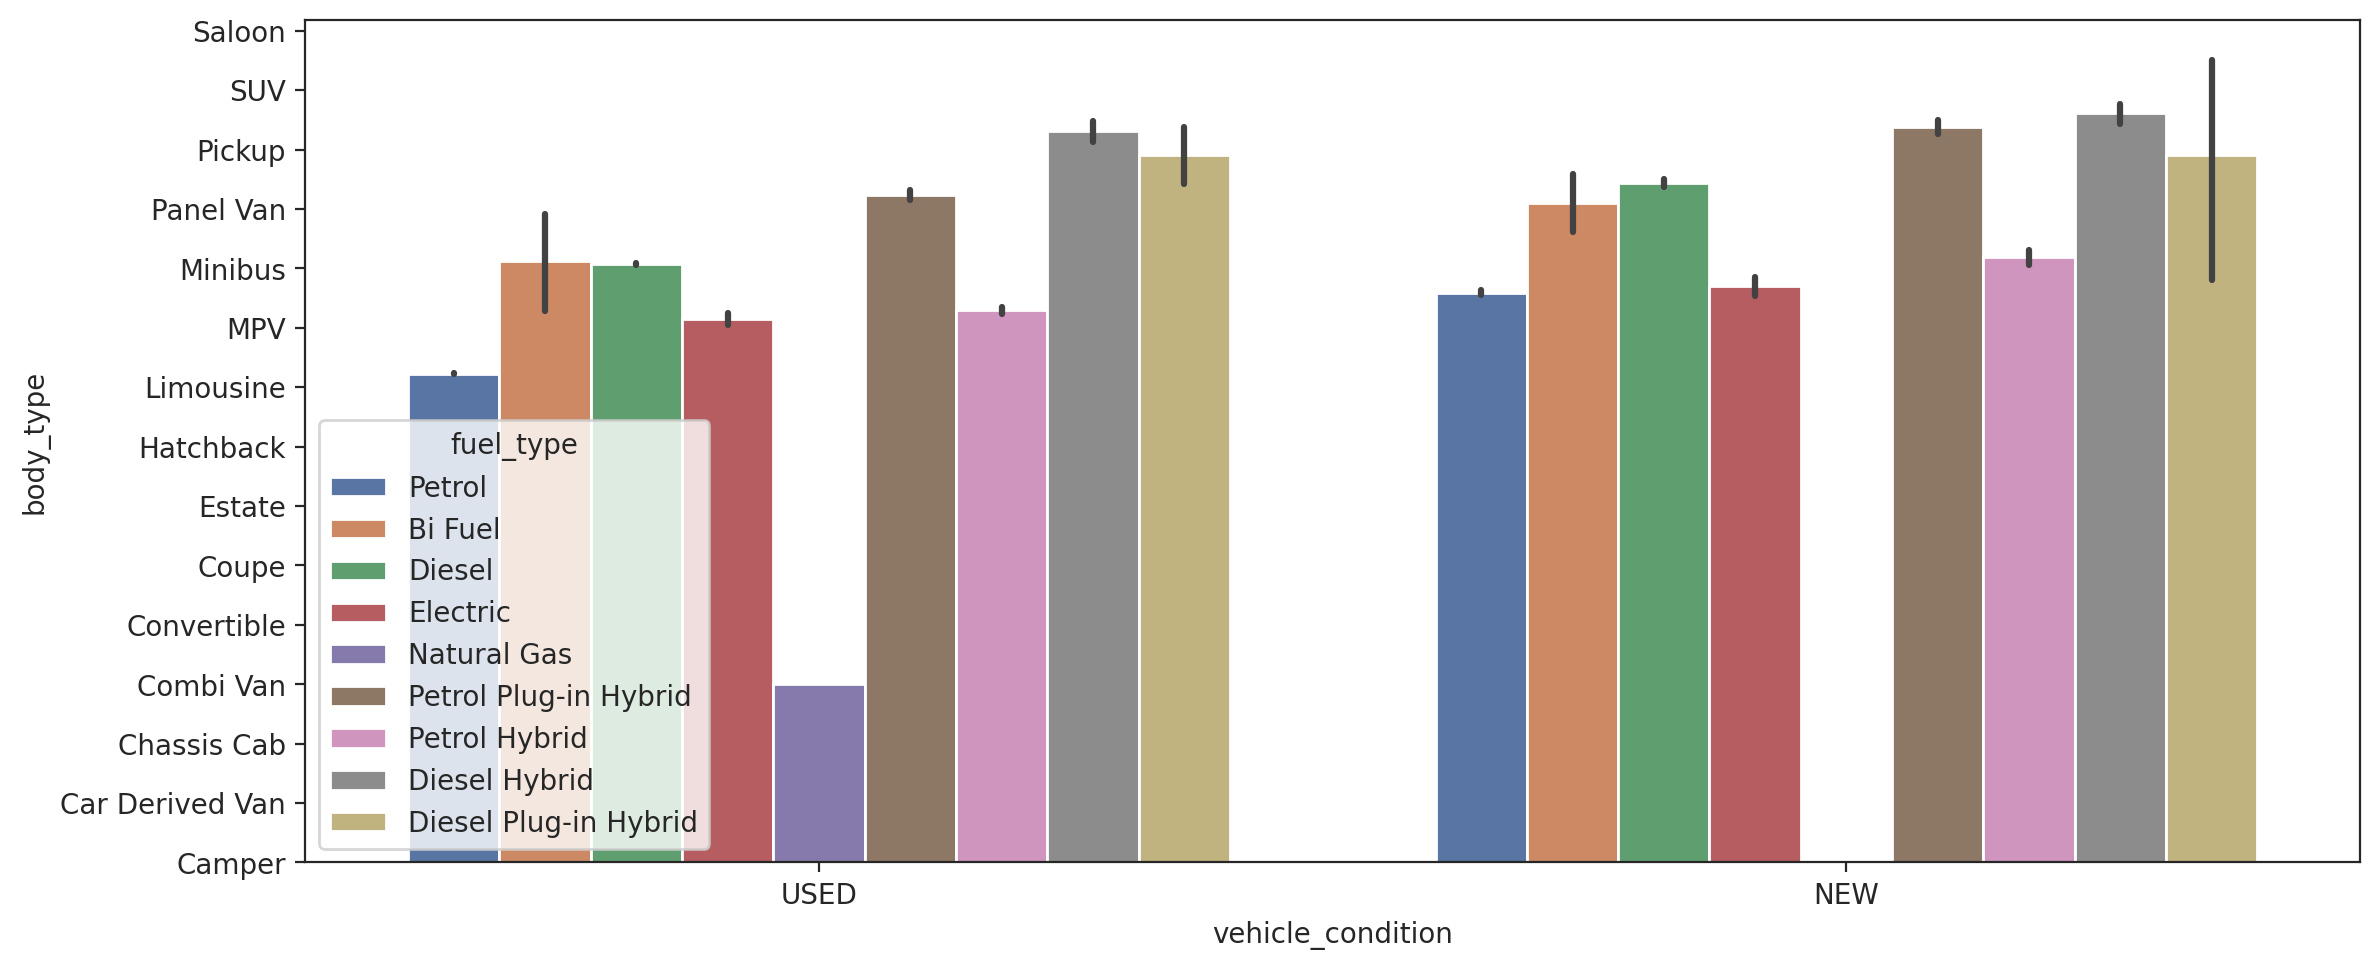

In [213]:
plt.figure(figsize=(12,5))
sns.barplot(data=d1.sort_values(by='body_type'),x='vehicle_condition',y='body_type',hue='fuel_type')
plt.tight_layout()
plt.gca().invert_yaxis()

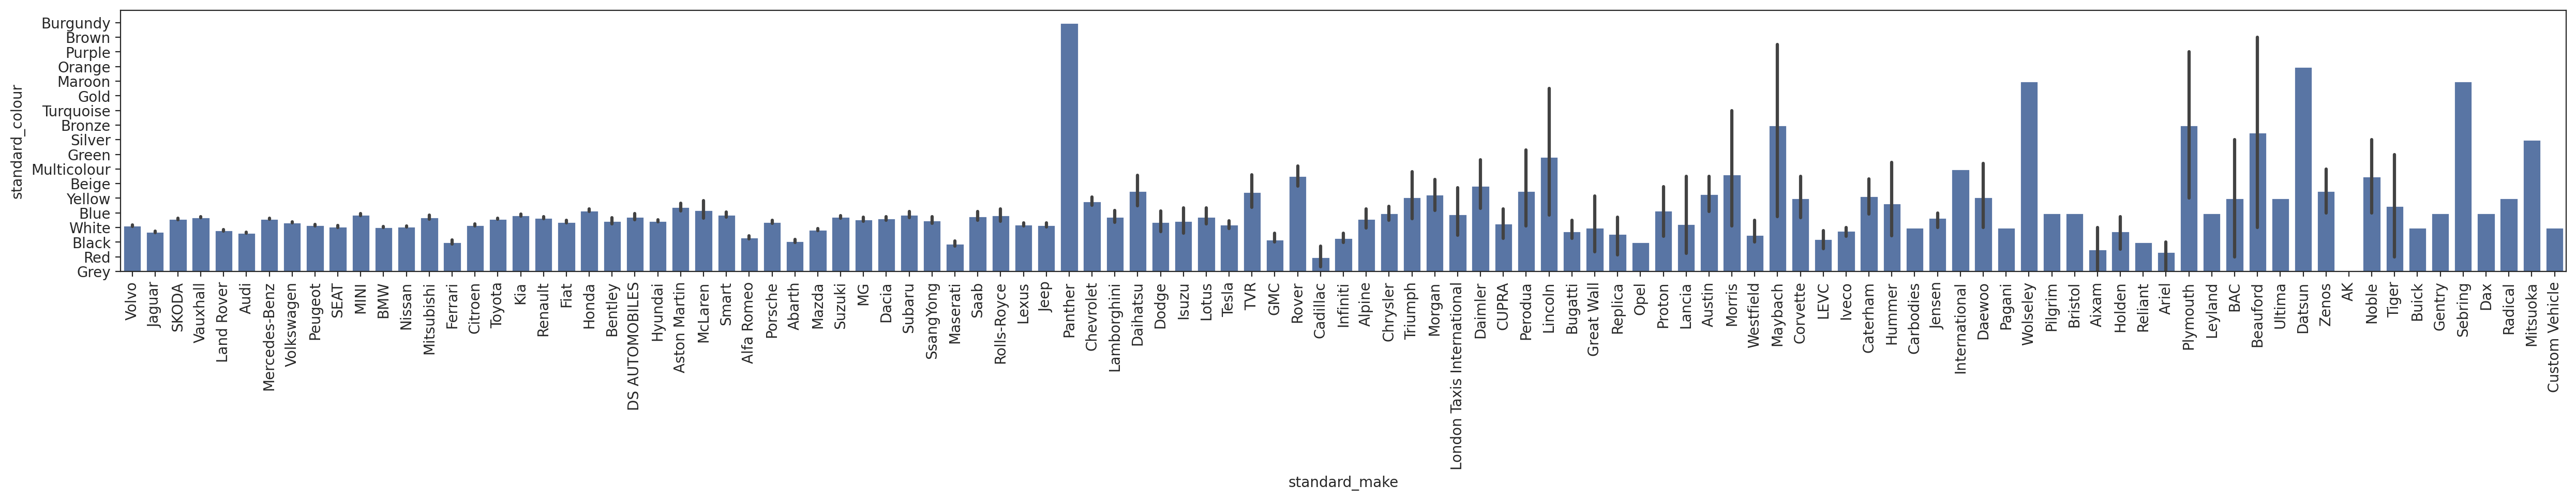

In [214]:
plt.figure(figsize=(25,5))
sns.barplot(data=d1.sort_values(by='standard_make'),y='standard_colour',x='standard_make',order=d1['standard_make'].unique(), orient='v')
plt.xticks(rotation=90)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

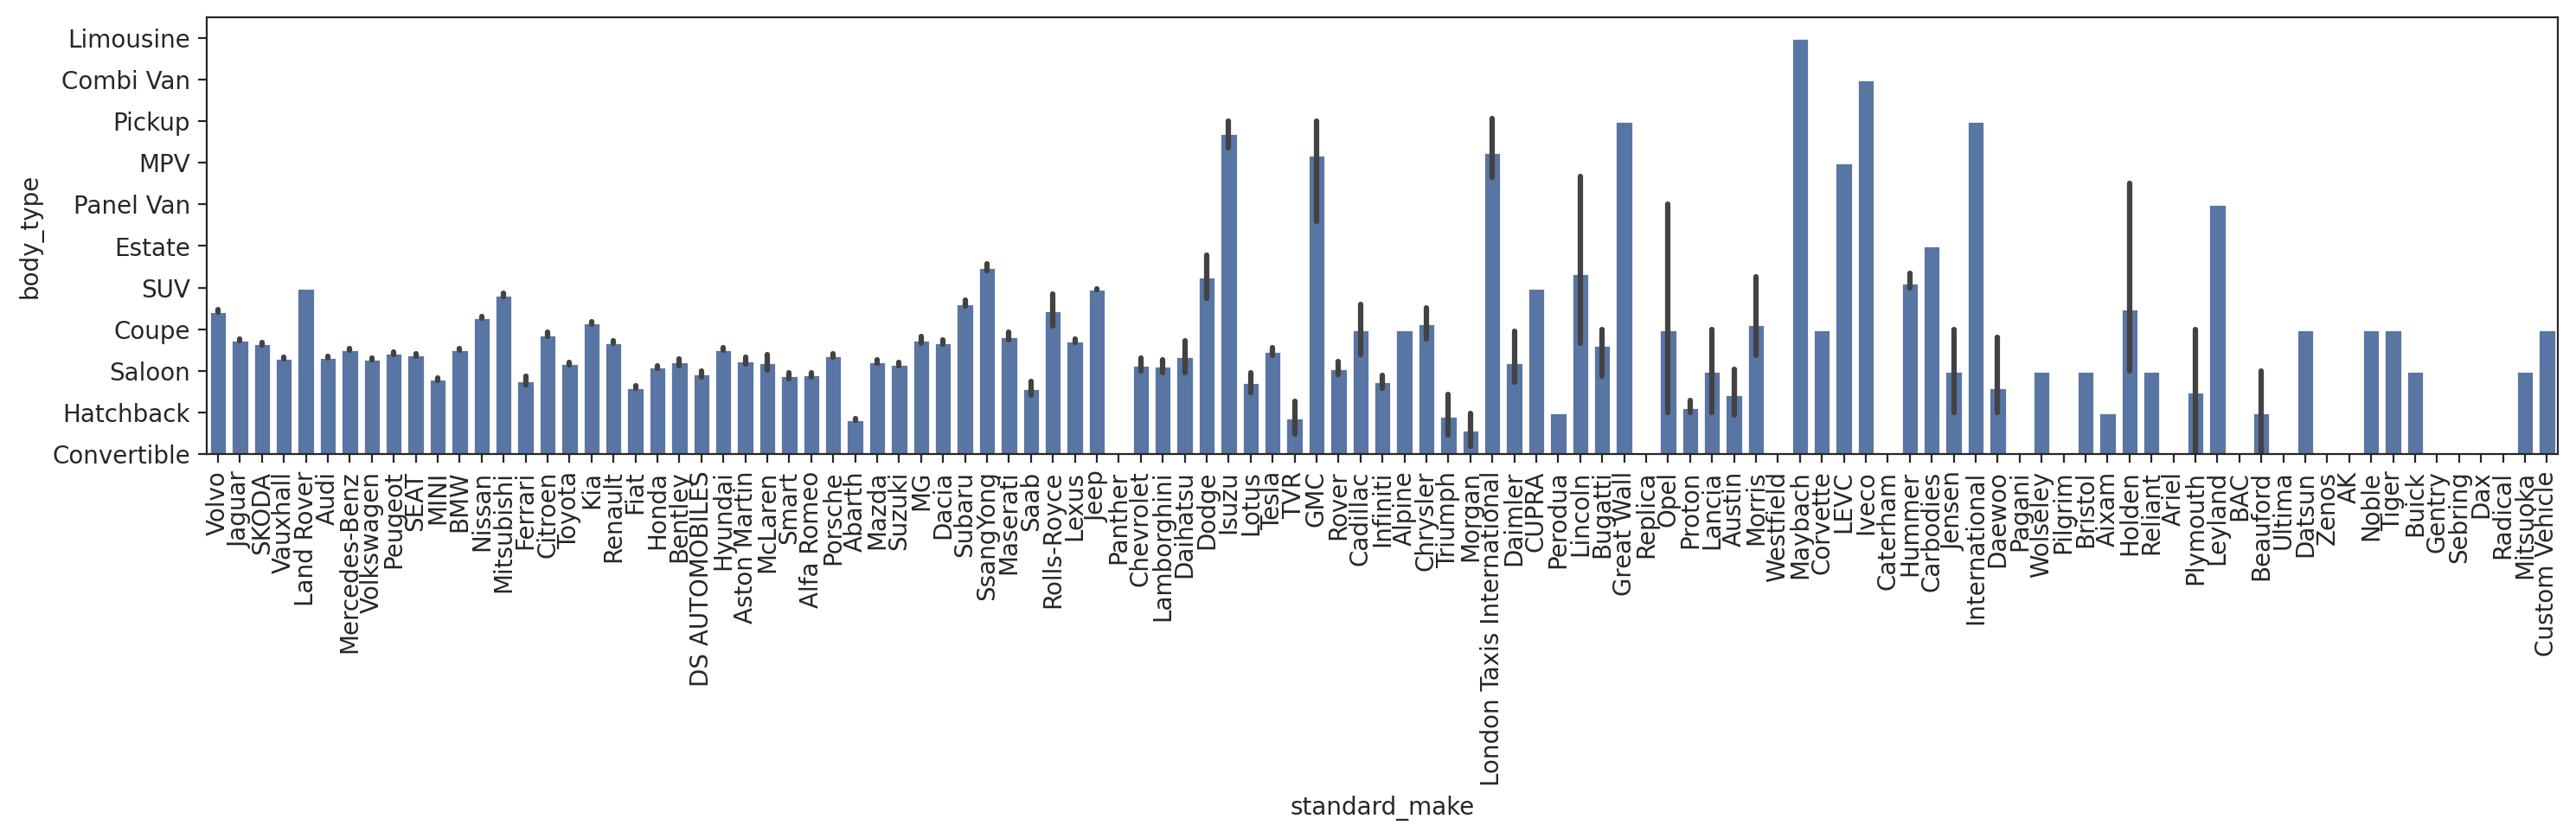

In [215]:
plt.figure(figsize=(15,5))
sns.barplot(data=d1.sort_values(by='standard_make'),x='standard_make',y='body_type',order=d1['standard_make'].unique(),orient='v')
plt.xticks(rotation=90)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [216]:
d1.corr()

mileage  year_of_registration     price
mileage               1.000000             -0.717841 -0.294084
year_of_registration -0.717841              1.000000  0.222044
price                -0.294084              0.222044  1.000000

<Axes: >

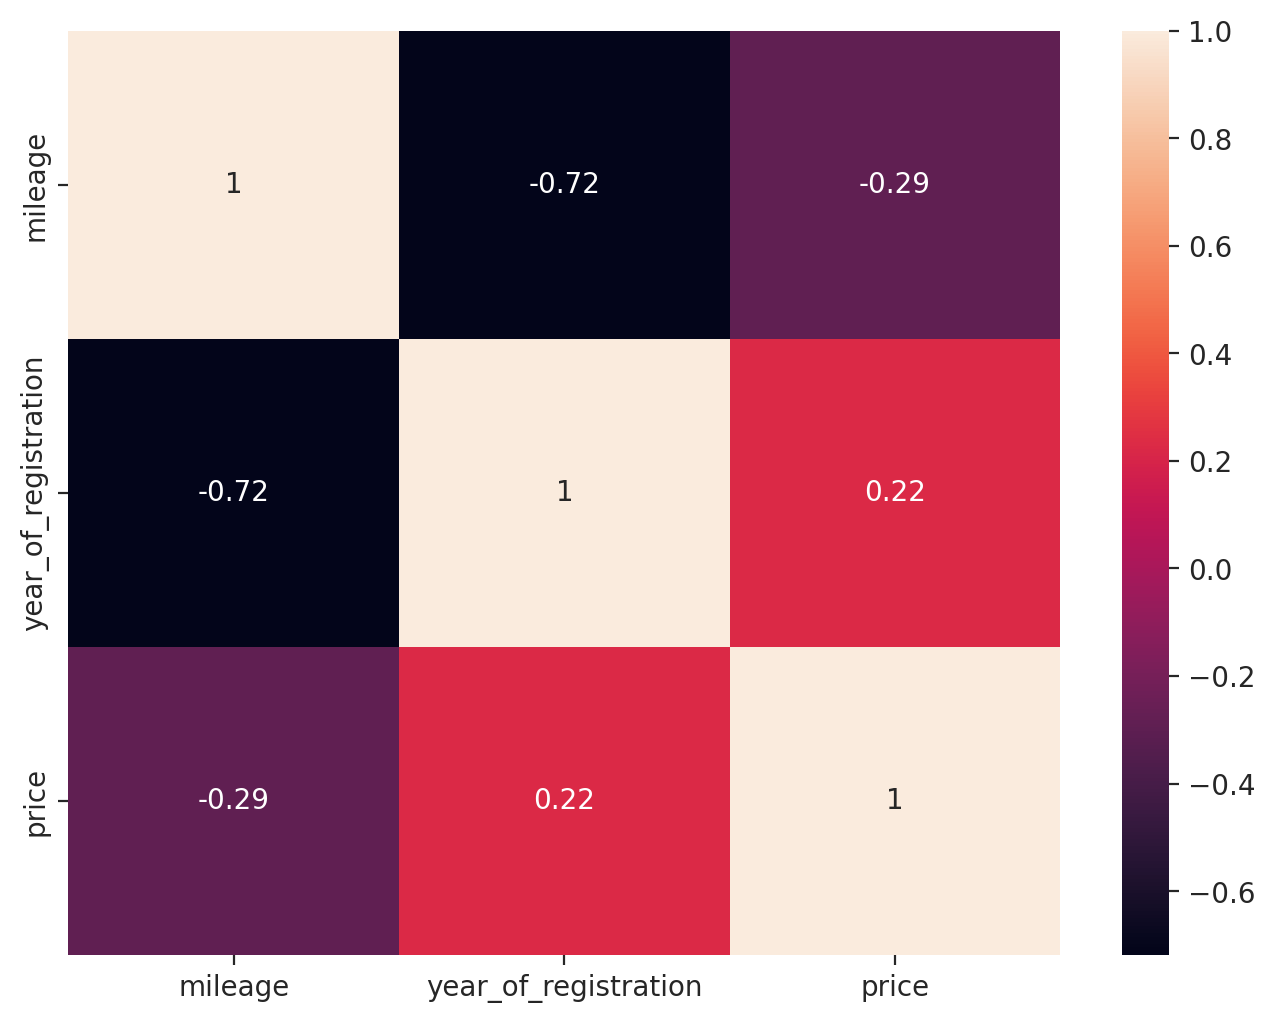

In [217]:
sns.heatmap(data=d1.corr(), annot=True)

In [218]:
# need to add hue into above few barplots
# once again check for the category- quantitative graps
# align thing in pattern
# have a double check in barplots where features are grouped
# have a pleasure of using catplot and few other plots from calss collab

In [219]:
d3=d1.copy()

In [221]:
d3['Age']=2021-d1['year_of_registration'].head()

In [229]:
d3.head()

mileage standard_colour standard_make     standard_model  \
0       0.0            Grey         Volvo               XC90   
1  108230.0            Blue        Jaguar                 XF   
2    7800.0            Grey         SKODA               Yeti   
3   45000.0           Brown      Vauxhall              Mokka   
4   64000.0            Grey    Land Rover  Range Rover Sport   

  vehicle_condition  year_of_registration  price  body_type  \
0               NEW                2020.0  73970        SUV   
1              USED                2011.0   7000     Saloon   
2              USED                2017.0  14000        SUV   
3              USED                2016.0   7995  Hatchback   
4              USED                2015.0  26995        SUV   

               fuel_type   Age  Annual_milage  
0  Petrol Plug-in Hybrid   1.0       0.000000  
1                 Diesel  10.0   10823.000000  
2                 Petrol   4.0    1950.000000  
3                 Diesel   5.0    9000.000000  
4                 Diesel   6.0   10666.666667

In [225]:
d3['Annual_milage']=d3['mileage']/d3['Age']


In [230]:
d3.head()

mileage standard_colour standard_make     standard_model  \
0       0.0            Grey         Volvo               XC90   
1  108230.0            Blue        Jaguar                 XF   
2    7800.0            Grey         SKODA               Yeti   
3   45000.0           Brown      Vauxhall              Mokka   
4   64000.0            Grey    Land Rover  Range Rover Sport   

  vehicle_condition  year_of_registration  price  body_type  \
0               NEW                2020.0  73970        SUV   
1              USED                2011.0   7000     Saloon   
2              USED                2017.0  14000        SUV   
3              USED                2016.0   7995  Hatchback   
4              USED                2015.0  26995        SUV   

               fuel_type   Age  Annual_milage  
0  Petrol Plug-in Hybrid   1.0       0.000000  
1                 Diesel  10.0   10823.000000  
2                 Petrol   4.0    1950.000000  
3                 Diesel   5.0    9000.000000  
4                 Diesel   6.0   10666.666667

In [227]:
feature_engineer=d3

In [233]:
feature_engineer=feature_engineer[['standard_make','standard_model','Age','mileage','price']]
feature_engineer.head(15)

standard_make     standard_model   Age   mileage  price
0           Volvo               XC90   1.0       0.0  73970
1          Jaguar                 XF  10.0  108230.0   7000
2           SKODA               Yeti   4.0    7800.0  14000
3        Vauxhall              Mokka   5.0   45000.0   7995
4      Land Rover  Range Rover Sport   6.0   64000.0  26995
5            Audi                 S5   4.0   16000.0  29000
6        Vauxhall               Viva   4.0   24075.0   5861
7      Land Rover        Range Rover   8.0   99000.0  24475
8   Mercedes-Benz            S Class  13.0  111236.0   6995
9      Land Rover        Range Rover   2.0    9500.0  79995
10     Volkswagen             Passat  11.0   77000.0   4499
11        Peugeot                208   4.0   24487.0   8795
12          SKODA            Octavia   2.0    4765.0  16990
13           SEAT               Leon   2.0   18214.0  14290
14           MINI              Hatch   4.0   31534.0  19000